### The libraries needed to carry out the project are imported.

In [1]:
# tkinter: A library for creating graphical user interfaces.
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from tkinter import simpledialog
from tkinter import colorchooser
import tkinter.messagebox as tkmessagebox
from tkinter import *

# pyvista: Library for 3D visualisation and analysis of scientific data in Python.
import pyvista as pv

# numpy: The fundamental library for scientific computing in Python, we will use it for data manipulation.
import numpy as np

# matplotlib: A library for creating static, animated and interactive graphics in Python.
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

# pyvistaqt: A pyvista extension for integration with Qt
from pyvistaqt import BackgroundPlotter

# os:This library provides a way to use OS-dependent functionality, such as reading or writing to files.
import os

# PIL: Library for opening, manipulating and saving many images of different formats.
from PIL import Image

# IPython.display y ipywidgets: Used to create interactive widgets in Jupyter and display them.
from IPython.display import display
from ipywidgets import widgets

# webbrowser: Provides a high-level interface to allow users to view web documents.
import webbrowser

### This code block requests the user to enter the name of two new folders and then creates these folders in the current directory if the user provides the names.

In [2]:
# Nombres predeterminados para las carpetas
nombre_carpeta_vti = "carpeta_vti"
nombre_carpeta_vtk = "carpeta_vtk"

# Crear las carpetas si no existen
ruta_carpeta_vti = os.path.join(os.getcwd(), nombre_carpeta_vti)
ruta_carpeta_vtk = os.path.join(os.getcwd(), nombre_carpeta_vtk)

os.makedirs(ruta_carpeta_vti, exist_ok=True)
os.makedirs(ruta_carpeta_vtk, exist_ok=True)

### In this cell you can display the colour map you want to choose and store it in a variable to use it for colouring the graphics.

In [3]:
#Se inicia definiendo un diccionario para almacenar las configuración como el mapa de color
# y su orientación
darg = dict(cmap='gist_ncar_r', color_orientation='vertical')


def show_colorbar(*args):
    
    #window.winfo_children : Obtiene una lista de todos los widgets (componentes de la interfaz) que son hijos de la ventana principal (window)
    
    for widget in window.winfo_children(): #Itera sobre cada widget en la ventana principal.
        if isinstance(widget, Canvas): #Verifica si el widget actual es una instancia de Canvas (un área donde se pueden dibujar gráficos y otros elementos).
            widget.destroy() #Si el widget es un Canvas, lo destruye. Esto se hace para eliminar la barra de colores anterior antes de dibujar una nueva.

            
            
            
    # cmap_var: Es una variable de tipo StringVar, una clase especial de Tkinter utilizada para almacenar el valor de una cadena y rastrear automáticamente su estado.        
    # get() : Obtiene el valor actual almacenado en cmap_var, que es el nombre del mapa de colores seleccionado por el usuario.
    # Get the name of the selected colourmap
    selected_cmap = cmap_var.get()
    
    
    
    #np.linspace(0, 1, 256): Utiliza NumPy para crear un arreglo de 256 valores distribuidos uniformemente entre 0 y 1. Estos valores representan la escala de colores.
    #np.vstack((gradient, gradient)):  Duplica el arreglo de gradientes en dos filas. Esto se hace para que la barra de colores tenga un poco de altura cuando se visualice.
    # Generate an image of the colour scale
    gradient = np.linspace(0, 1, 256)  # values 0 a 1
    gradient = np.vstack((gradient, gradient))  # duplicate these values in two rows

    
    
    
    
    #  Creates a new figure and an axis object
    fig = Figure(figsize=(6, 2))#Crea una nueva figura de Matplotlib con un tamaño específico (6x2 pulgadas).
    ax = fig.subplots()#Añade un conjunto de ejes a la figura. Los ejes son donde se dibujará la barra de colores.
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)#Ajusta los márgenes de la subtrama dentro de la figura.
    
    # Make the background of the figure and axes patches transparent
    fig.patch.set_alpha(0)#Hace que el fondo de la figura sea completamente transparente
    ax.patch.set_alpha(0)#Hace que el fondo de los ejes sea completamente transparente.
    
    #ax.imshow(...): Muestra la imagen (en este caso, el gradiente) en los ejes.
    #cmap=selected_cmap aplica el mapa de colores seleccionado.
    ax.imshow(gradient, aspect='auto', cmap=selected_cmap)
    ax.axis('off')#Desactiva los ejes alrededor de la imagen para que no se muestren líneas, marcas o etiquetas.
    
    
    darg['color_orientation'] = 'horizontal' if orientation_var.get() == 'H' else 'vertical'#Actualiza el diccionario darg con la orientación actual de la barra de colores basada en la selección del usuario.

    # Displays the image in the user interface
    colorbar = FigureCanvasTkAgg(fig, master=window)#FigureCanvasTkAgg(fig, master=window): Crea un lienzo de Tkinter que puede mostrar una figura de Matplotlib.
    colorbar_canvas = colorbar.get_tk_widget()#Obtiene el widget de Tkinter real para que pueda ser configurado y añadido a la ventana principal.
    colorbar_canvas.config(bg='#F0F0F0', highlightthickness=0)  # Configura el fondo y el grosor del borde del lienzo.
    colorbar_canvas.grid(row=4, column=2, columnspan=3)#oloca el lienzo en la ventana principal en una posición específica usando el administrador de geometría grid.
    
def store_color():
    # Gets the name of the selected colourmap and updates dargg
    selected_cmap = cmap_var.get()
    darg['cmap'] = selected_cmap
    
    # Updates the text box to show the stored colourmap # Updates the text box to show the stored colourmap
    stored_cmap.set("Colormap almacenado: " + selected_cmap)

    
def update_color_orientation():
    selected_orientation = orientation_var.get()
    darg['color_orientation'] = 'horizontal' if selected_orientation == 'H' else 'vertical'
    show_colorbar()  # Actualiza la barra de color con la nueva orientación
    


def update_colorbar_settings(*args):
    global min_color_range, max_color_range, labels

    # Intenta obtener los valores, si falla usa un valor por defecto o no hagas nada
    try:
        min_color_range = min_color_range_var.get()
    except TclError:
        min_color_range = -40  # Puedes poner aquí tu valor por defecto

    try:
        max_color_range = max_color_range_var.get()
    except TclError:
        max_color_range = 10  # Valor por defecto

    try:
        labels = labels_var.get()
    except TclError:
        labels = 12  # Valor por defecto
        
def save_and_close():
    # Recoger los valores actuales
    current_settings = {
        'selected_cmap': cmap_var.get(),
        'color_orientation': orientation_var.get(),
        'min_color_range': min_color_range_var.get(),
        'max_color_range': max_color_range_var.get(),
        'labels': labels_var.get()
    }

    # Guardar los valores en un archivo de texto
    with open('color_settings.txt', 'w') as file:
        for key, value in current_settings.items():
            file.write(f'{key}: {value}\n')

    # Cerrar la ventana
    window.destroy()
    
# Create the tkinter window
window = Tk()


# Configura las etiquetas para que tengan el mismo estilo que 'Color deseado'
style_labels = {'font': ("Arial", 13), 'relief': 'sunken', 'bd': 3, 'highlightthickness': 4}

window.geometry('800x600')  # Sets the window size in pixels

# Set the title of the window
window.title('Configuración del Filtro para Visualización Molecular')

# Configura el peso de las columnas para que el centrado sea efectivo
for i in range(10):
    window.grid_columnconfigure(i, weight=1)

# Variable to save the selected color orientation
orientation_var = StringVar(window)
orientation_var.set('V')  # Valor por defecto para la orientación vertical

# List the names of the available colourmaps
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'RdBu', 'gist_ncar_r']

#  Variable to save the selected colourmap
cmap_var = StringVar(window)
cmap_var.set(cmaps[0])  # valor por defecto
cmap_var.trace("w", show_colorbar)  # Añadir trace aquí

# Variable to display the stored colormap
stored_cmap = StringVar(window)
darg = {'cmap': 'gist_ncar_r'}  # Assuming darg is defined somewhere
stored_cmap.set("Colormap almacenado: " + darg['cmap'])

# Variables globales para configurar la barra de color
min_color_range_var = IntVar(window, value=-40)  # Valor por defecto -40
max_color_range_var = IntVar(window, value=10)   # Valor por defecto 10
labels_var = IntVar(window, value=12)            # Valor por defecto 12

# Marco para la selección y visualización del color y el botón de almacenamiento
frame_color_selection = LabelFrame(window, text="Configuraciones de Color", padx=5, pady=5)
frame_color_selection.grid(row=1, column=0, columnspan=10, padx=10, pady=10, sticky='ew')

# Marco para la selección de orientación y la configuración de valores

frame_value_orientation = LabelFrame(window, text="Configuraciones de Orientación y Valores", padx=5, pady=5)
frame_value_orientation.grid(row=2, column=0, columnspan=10, padx=10, pady=10, sticky='ew')

# Crea el Combobox y lo configura con los valores de los mapas de color
cmap_combobox = ttk.Combobox(frame_color_selection, textvariable=cmap_var, values=cmaps, height=10)
cmap_combobox.grid(row=0, column=1, columnspan=2, sticky='ew')
cmap_combobox.config(font=('Arial', 11))
cmap_combobox.set(darg['cmap'])  # Establece el valor predeterminado del Combobox

color_label = Label(frame_color_selection, text="Color deseado:", font=("Arial", 13))
color_label.grid(row=0, column=0, sticky='ew')
color_label.config(relief='sunken', bd=3, highlightthickness=4)

# Crea etiquetas para la orientación de la barra de colores
label_orientation = Label(frame_value_orientation, text="Orientación de la barra de colores:", **style_labels)
label_orientation.grid(row=1, column=0, columnspan=3, sticky='ew')

# Crea botones de radio para la selección de la orientación
radio_horizontal = Radiobutton(frame_value_orientation, text='Horizontal', variable=orientation_var, value='H', font=("Arial", 11))
radio_vertical = Radiobutton(frame_value_orientation, text='Vertical', variable=orientation_var, value='V', font=("Arial", 11))

# Ubica los botones de radio en la interfaz
radio_horizontal.grid(row=3, column=1, sticky='w')
radio_vertical.grid(row=3, column=2, sticky='w')

# Create the button to store the colormap
btn_store = Button(frame_color_selection, text="Store colorbar", command=store_color)
btn_store.grid(row=1, column=1, columnspan=2, pady=(5,0))
btn_store.config(bg='MintCream', fg='black', font=('Arial', 11), bd=2, height=1)

# Creates the text box to display the stored colormap
label_stored_cmap = Label(frame_color_selection, textvariable=stored_cmap, font=("Arial", 13))
label_stored_cmap.grid(row=1, column=0, pady=(5,0))
label_stored_cmap.config(relief='sunken', bd=3, highlightthickness=4)




# Etiquetas y campos de entrada para configurar la barra de color
label_min = Label(frame_value_orientation, text="Valor mínimo:", **style_labels)
label_min.grid(row=5, column=1)
entry_min = Entry(frame_value_orientation, textvariable=min_color_range_var)
entry_min.grid(row=5, column=2)

label_max = Label(frame_value_orientation, text="Valor máximo:", **style_labels)
label_max.grid(row=7, column=1)
entry_max = Entry(frame_value_orientation, textvariable=max_color_range_var)
entry_max.grid(row=7, column=2)

label_labels = Label(frame_value_orientation, text="Número de etiquetas:", **style_labels)
label_labels.grid(row=8, column=1)
entry_labels = Entry(frame_value_orientation, textvariable=labels_var)
entry_labels.grid(row=8, column=2)

# Añadir trace para actualizar la configuración cuando los valores cambian
min_color_range_var.trace("w", update_colorbar_settings)
max_color_range_var.trace("w", update_colorbar_settings)
labels_var.trace("w", update_colorbar_settings)

# Crear el botón "Guardar y Cerrar"
btn_save_close = Button(window, text="Guardar y Cerrar", command=save_and_close)
btn_save_close.grid(row=9, column=3)  # Ajusta la fila y la columna según tus necesidades
btn_save_close.config(bg='MintCream', fg='black', font=('Aptos', 11), bd=2, height=1)




# Llamar a show_colorbar inicialmente para mostrar el color predeterminado
show_colorbar()

window.mainloop()

### Colour bar selection
In the next code cell, the user is asked to decide if he/she wants to use the custom colour bar that has been set up in the previous cells. If the user responds with "yes" (no matter whether it is upper or lower case), then the custom colour bar will be used in subsequent graphics. If the user responds with anything else, the custom colour bar will not be used.
With this step, the user has the possibility to control the appearance of the colour bar in the graphics. If the user is satisfied with the default colour bar, he can choose not to use the custom colour bar.

In [4]:
# Eliminamos la solicitud de input al usuario y establecemos directamente el uso de la barra de colores personalizada.
use_custom_colorbar = True

### File selection
This function opens a dialog box that allows the user to select a .vtk file.
If the user selects a file, the functions load_vtk_file and load_and_visualize_vtk will be called.

In [5]:
#Función para abrir un archivo VTK desde el sistema de archivos del usuario.
def open_vtk_file():
    global vtk_file_path, window  # Declaramos vtk_file_path como una variable global
    # Abrimos la ventana de diálogo para que el usuario seleccione un archivo .vtk
    vtk_file_path = filedialog.askopenfilename(filetypes=[("VTK files", "*.vtk")])
    # Si el usuario seleccionó un archivo (es decir, si vtk_file_path no está vacío)
    if vtk_file_path:
        load_vtk_file(vtk_file_path)  # Cargamos el archivo .vtk
        load_and_visualize_vtk()  # Visualizamos el archivo .vtk
        window.destroy()  # Cerramos la ventana de Tkinter

### Loading the VTK file
The following code cell defines a function called load_vtk_file(). This function takes a file name as an argument and uses the pyvista library to load the file into memory. The loaded file is stored in a global variable called read, which can then be used elsewhere in the code.

In [6]:
def load_vtk_file(filename):
    global leer # We declare read as a global variable
    leer = pv.read(filename)# We use pyvista to read the .vtk file and store the result in the variable read.

### The same thing happens but now with vti file

In [7]:
def open_vti_file():
    global vti_file_path, window
    vti_file_path = filedialog.askopenfilename(filetypes=[("VTI files", "*.vti")])
    if vti_file_path:
        load_vti_file(vti_file_path)
        load_and_visualize_vti()
        window.destroy()  # Cerramos la ventana de Tkinter

In [8]:
def load_vti_file(filename):
    global grid
    grid = pv.read(filename)

In [9]:
imagenes_generadas = []

### In this cell, the responsibility of this cell is the generation and display of the graphics from the .vtk files as well as the creation of the user interface for the interaction with the user.

In [10]:
# This function creates multiple graphs based on different isosurfaces values. Each graphic is saved as a .png file in the specified folder.    
def load_and_visualize_vtk(): 
    
    # Obtener los valores actuales de la interfaz
    min_color_value = min_color_range_var.get()
    max_color_value = max_color_range_var.get()
    num_labels = labels_var.get()
    
    valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Here you define the different isosurfaces values that you want to use
    for i, valor in enumerate(valores_isosurfaces):  # Iterate over each isosurfaces value
        rebanada_y = leer.slice(normal='x')  # Create a cross-section of the .vtk file on the 'x' axis in this cell
        contornos = rebanada_y.contour(isosurfaces=valor) # We generate contours based on the value of isosurfaces
        with output_widget:
            p = pv.Plotter()
            


            
            # If the user chose to use the custom colour bar, we apply it to the chart
            # Asumiendo que darg es un diccionario que contiene color_orientation y otros argumentos
            # Elimina color_orientation si no es un argumento válido para add_mesh
            if 'color_orientation' in darg:
                del darg['color_orientation']
            
            sargs = dict(
                
                n_labels=num_labels,
                vertical = not orientation_var.get() == 'H',
                color='k'
            )
            
            p.add_mesh(rebanada_y, show_scalar_bar=False)
            p.add_mesh(contornos, show_scalar_bar=False, line_width=2, **darg,clim=(min_color_value, max_color_value))
            p.camera_position = (1, 0, 0)
            p.set_background ('w')
            titulo = f"Corte y Contorno de Isosuperficie {valor} - Eje X"
            p.add_title(titulo, font_size=10)

            
            p.add_scalar_bar(**sargs)
                
            nombre_archivo = f"grafico_Rebanada_En_EjeX {i+1}.png"  # Here you set the filename based on the cycle index
            p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])# Save the graphic as .png file

            p.show()
            # Move the .png file to the specified folder
            ruta_imagen = os.path.join(nombre_carpeta_vtk, nombre_archivo) 
            os.replace(nombre_archivo, ruta_imagen)
            # Add the image path to the list of generated images
            imagenes_generadas.append(ruta_imagen)
##########################################################################################################
output_widget = widgets.Output()  # Create an output widget to display the chart
display(output_widget)
# Create a GUI using tkinter
window = tk.Tk()
window.title("Molecular structures viewer")


# We create a button that calls the open_vtk_file function when pressed
open_file_button = tk.Button(window, text="Open VTK file", command=open_vtk_file)
open_file_button.pack(pady=10)

# We create a label to inform the user
info_label = tk.Label(window, text="Upload a VTK file to visualize and slice the molecular structure.")
info_label.pack(pady=20)

window.mainloop()
##############################################################################################################

Output()

The above code block is very similar to the block displayed above.
previously. The only key difference is that this time, cross-sections and contours are made along the y-axis, rather than the x-axis. Therefore, the explanation and comments provided for the previous code block apply to this one as well, with the only exception that the generated graphs are based on cross-sections and contours along the y-axis. And the following cell follows the same steps but now with the z-axis


In [11]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Here you define the different isosurfaces values that you want to use
for i, valor in enumerate(valores_isosurfaces):  # Iterate over each isosurfaces value
    rebanada_y = leer.slice(normal='y')  # Create a cross-section of the .vtk file on the 'x' axis in this cell
    contornos = rebanada_y.contour(isosurfaces=valor) # We generate contours based on the value of isosurfaces
    with output_widget:
        p = pv.Plotter()
            
        sargs = dict(
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'k'
            
        )

            
            # If the user chose to use the custom colour bar, we apply it to the chart
            # Asumiendo que darg es un diccionario que contiene color_orientation y otros argumentos
            # Elimina color_orientation si no es un argumento válido para add_mesh
        if 'color_orientation' in darg:
            del darg['color_orientation']
                
            
        p.add_mesh(rebanada_y, show_scalar_bar=False)
        p.add_mesh(contornos, show_scalar_bar=False, line_width=2, **darg,clim=(min_color_value, max_color_value))
        p.camera_position = (0, 1, 0)
        p.set_background ('w')
        titulo = f"Corte y Contorno de Isosuperficie {valor} - Eje Y"
        p.add_title(titulo, font_size=10)
            

            
        p.add_scalar_bar(**sargs)
                
        nombre_archivo = f"grafico_Rebanada_En_EjeY {i+1}.png"  # Here you set the filename based on the cycle index
        p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])# Save the graphic as .png file

        p.show()
        # Move the .png file to the specified folder
        ruta_imagen = os.path.join(nombre_carpeta_vtk, nombre_archivo) 
        os.replace(nombre_archivo, ruta_imagen)
        # Add the image path to the list of generated images
        imagenes_generadas.append(ruta_imagen)

In [12]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Here you define the different isosurfaces values that you want to use
for i, valor in enumerate(valores_isosurfaces):  # Iterate over each isosurfaces value
    rebanada_y = leer.slice(normal='z')  # Create a cross-section of the .vtk file on the 'x' axis in this cell
    contornos = rebanada_y.contour(isosurfaces=valor) # We generate contours based on the value of isosurfaces
    with output_widget:
        p = pv.Plotter()
            
        sargs = dict(
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'k'
        )

            
            # If the user chose to use the custom colour bar, we apply it to the chart
            # Asumiendo que darg es un diccionario que contiene color_orientation y otros argumentos
            # Elimina color_orientation si no es un argumento válido para add_mesh
        if 'color_orientation' in darg:
            del darg['color_orientation']
                
            
        p.add_mesh(rebanada_y, show_scalar_bar=False)
        p.add_mesh(contornos, show_scalar_bar=False, line_width=2, **darg,clim=(min_color_value, max_color_value))
        p.camera_position = (0, 0, 1)
        p.set_background ('w')
        titulo = f"Corte y Contorno de Isosuperficie {valor} - Eje Z"
        p.add_title(titulo, font_size=10)

            
        p.add_scalar_bar(**sargs)
                
        nombre_archivo = f"grafico_Rebanada_En_EjeZ {i+1}.png"  # Here you set the filename based on the cycle index
        p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])# Save the graphic as .png file

        p.show()
        # Move the .png file to the specified folder
        ruta_imagen = os.path.join(nombre_carpeta_vtk, nombre_archivo) 
        os.replace(nombre_archivo, ruta_imagen)
        # Add the image path to the list of generated images
        imagenes_generadas.append(ruta_imagen)

### Contours
Here you can see that the functionality is similar to the previous blocks, but instead of showing a complete cross-section, only the contours on the x-axis are displayed as well as the other cells with the y-axis and z-axis.

In [13]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

valores_isosurfaces = [3, 4, 5, 6, 7, 8, 9]  
for i, valor in enumerate(valores_isosurfaces):
    rebanada_y = leer.slice(normal='x') 
    contornos = rebanada_y.contour(isosurfaces=valor)
    with output_widget:
        p = pv.Plotter()
        
        sargs = dict(
            
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'w'
            
        )
        
        if 'color_orientation' in darg:
            del darg['color_orientation']
        
        #p.add_mesh(rebanada_y, show_scalar_bar=False)
        p.add_mesh(contornos, show_scalar_bar=False, **darg ,clim=(min_color_value, max_color_value),line_width=3)
        p.camera_position = (1, 0, 0)
        p.set_background ('k')
        
        titulo = f"Contorno de isosuperficie {valor} - Eje X"
        p.add_title(titulo, font_size=10, color='w')

        p.add_scalar_bar(**sargs)
        nombre_archivo = f"grafico_CONTORNO_ISOLINEA_En_EjeX {i+1}.png"  
        p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
        p.show()
        ruta_imagen = os.path.join(nombre_carpeta_vtk, nombre_archivo) 
        os.replace(nombre_archivo, ruta_imagen)
        imagenes_generadas.append(ruta_imagen)

In [14]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

valores_isosurfaces = [3, 4, 5, 6, 7, 8, 9]  
for i, valor in enumerate(valores_isosurfaces):
    rebanada_y = leer.slice(normal='y') 
    contornos = rebanada_y.contour(isosurfaces=valor)
    with output_widget:
        p = pv.Plotter()
        
        sargs = dict(
            
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'w'
            
        )
        
        if 'color_orientation' in darg:
            del darg['color_orientation']
        
        p.add_mesh(contornos, show_scalar_bar=False,**darg, clim=(min_color_value, max_color_value),line_width=3)
        p.camera_position = (0, 1, 0)
        p.set_background ('k')
        
        titulo = f"Contorno de isosuperficie {valor} - Eje Y"
        p.add_title(titulo, font_size=10, color='w')

        p.add_scalar_bar(**sargs)
        nombre_archivo = f"grafico_CONTORNO_ISOLINEA_En_EjeY {i+1}.png"  
        p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
        p.show()
        ruta_imagen = os.path.join(nombre_carpeta_vtk, nombre_archivo) 
        os.replace(nombre_archivo, ruta_imagen)
        imagenes_generadas.append(ruta_imagen)

In [15]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

valores_isosurfaces = [3, 4, 5, 6, 7, 8, 9]  
for i, valor in enumerate(valores_isosurfaces):
    rebanada_y = leer.slice(normal='z') 
    contornos = rebanada_y.contour(isosurfaces=valor)
    with output_widget:
        p = pv.Plotter()
        
        sargs = dict(
            
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'w'
            
        )
        
        if 'color_orientation' in darg:
            del darg['color_orientation']
        
        p.add_mesh(contornos, show_scalar_bar=False, **darg,clim=(min_color_value, max_color_value),line_width=3)
        p.camera_position = (0, 0, 1)
        p.set_background ('k')
        p.add_scalar_bar(**sargs)
        
        titulo = f"Contorno de isosuperficie {valor} - Eje Z"
        p.add_title(titulo, font_size=10, color='w')
    
        nombre_archivo = f"grafico_CONTORNO_ISOLINEA_En_EjeZ {i+1}.png"  
        p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
        p.show()
        ruta_imagen = os.path.join(nombre_carpeta_vtk, nombre_archivo) 
        os.replace(nombre_archivo, ruta_imagen)
        imagenes_generadas.append(ruta_imagen)

## Slice orthogonal
This code block takes care of making orthogonal cuts in the .vtk file, moving the cut points to the origin (0, 0, 0) and finally displaying the cuts in a graph. For each slice, a light is created in its direction for better visualisation. A custom colour bar can also be used.

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


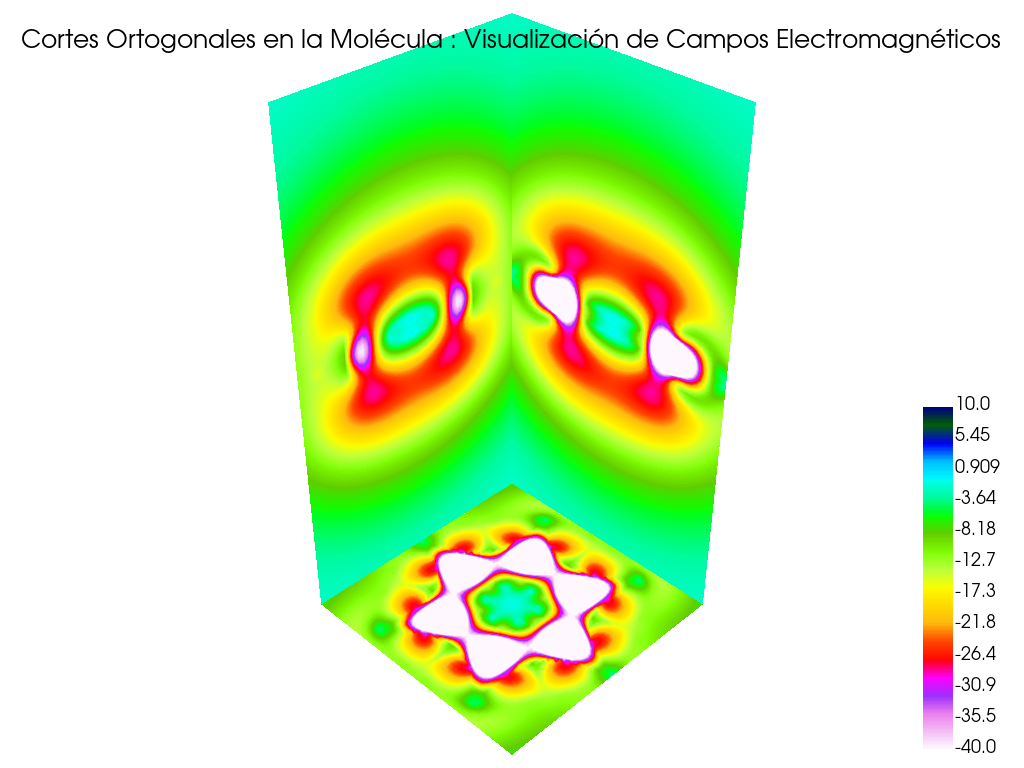

In [16]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# We define the minimum limits for each axis
min_x = leer.bounds[3]
min_y = leer.bounds[3]
min_z = leer.bounds[-1]

# Create orthogonal slices in the .vtk file
corte = leer.slice_orthogonal(x=0, y=0, z=0)

# We move the points of the cut and to the origin
y_slice = corte[1]
y_points = np.array(y_slice.points)
y_points[:, 1] -= min_y
y_slice.points = y_points

# Move the points of the z-slice to the origin
z_slice = corte[2]
z_points = np.array(z_slice.points)
z_points[:, 2] -= min_z
z_slice.points = z_points

# Move the points of the x-slice to the origin
x_slice = corte[0]
x_points = np.array(x_slice.points)
x_points[:, 0] -= min_x
x_slice.points = x_points

# We create lights for each cut in their respective direction
light1 = pv.Light(position=(min_x, 0, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)
light2 = pv.Light(position=(0, min_y, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)
light3 = pv.Light(position=(0, 0, min_z), focal_point=(0, 0, 0), color='white', intensity=1.0)

# We create a new graphic with the lights defined and without default lighting
p = pv.Plotter(lighting='none')

sargs = dict(
            
    n_labels=num_labels,
    vertical = not orientation_var.get() == 'H')

if 'color_orientation' in darg:
    del darg['color_orientation']


# We add the lights to the graph
p.add_light(light1)
p.add_light(light2)
p.add_light(light3)

# Add the slice to the graph and define its colour range if the user chose the custom colour bar
p.add_mesh(corte, show_scalar_bar=False,**darg, clim=(min_color_value, max_color_value))
p.set_background('w')
# We add the custom colour bar to the chart
p.add_scalar_bar(**sargs) 

titulo = f"Cortes Ortogonales en la Molécula : Visualización de Campos Electromagnéticos"
p.add_title(titulo, font_size=10)

nombre_archivo = f"Slice_orthogonal centrados.png"  
p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
p.show()
ruta_imagen = os.path.join(nombre_carpeta_vtk, nombre_archivo) 
os.replace(nombre_archivo, ruta_imagen)
imagenes_generadas.append(ruta_imagen)

### In this cell, the same thing happens as in the previous cell, but what is different is that the cuts and the corresponding mesh are displayed.

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


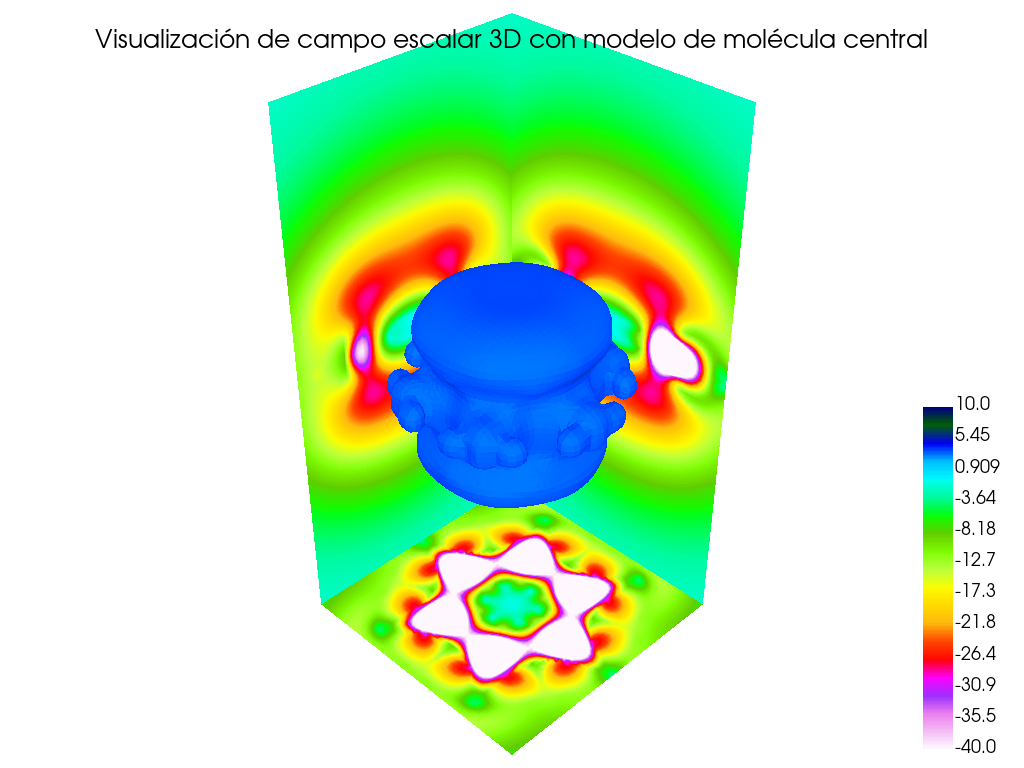

In [17]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

contorno= leer.contour()

min_x = leer.bounds[3]
min_y = leer.bounds[3]
min_z = leer.bounds[-1]

corte = leer.slice_orthogonal(x=0, y=0, z=0)

y_slice = corte[1]
y_points = np.array(y_slice.points)
y_points[:, 1] -= min_y
y_slice.points = y_points


z_slice = corte[2]
z_points = np.array(z_slice.points)
z_points[:, 2] -= min_z
z_slice.points = z_points


x_slice = corte[0]
x_points = np.array(x_slice.points)
x_points[:, 0] -= min_x
x_slice.points = x_points

light1 = pv.Light(position=(min_x, 0, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)
light2 = pv.Light(position=(0, min_y, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)
light3 = pv.Light(position=(0, 0, min_z), focal_point=(0, 0, 0), color='white', intensity=1.0)

p = pv.Plotter(lighting='none')

sargs = dict(
    
            
    n_labels=num_labels,
    vertical = not orientation_var.get() == 'H')

if 'color_orientation' in darg:
    del darg['color_orientation']

p.add_light(light1)
p.add_light(light2)
p.add_light(light3)

p.add_mesh(contorno,**darg, show_scalar_bar=False)
p.add_mesh(corte, show_scalar_bar=False, clim=(min_color_value, max_color_value),**darg)
p.set_background('w')
p.add_scalar_bar(**sargs)

titulo = f"Visualización de campo escalar 3D con modelo de molécula central"
p.add_title(titulo, font_size=10)

nombre_archivo = f"Slice_orthogonal centrados con contorno.png"  # Aquí defines el nombre del archivo con base en el índice del ciclo
p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
p.show()
ruta_imagen = os.path.join(nombre_carpeta_vtk, nombre_archivo) ######################## Escribir el nombre de la carpeta(otra vez)
os.replace(nombre_archivo, ruta_imagen)
imagenes_generadas.append(ruta_imagen)

In this case the code block does the same as the previous cell but the difference is that the outline of the cuts is displayed.

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


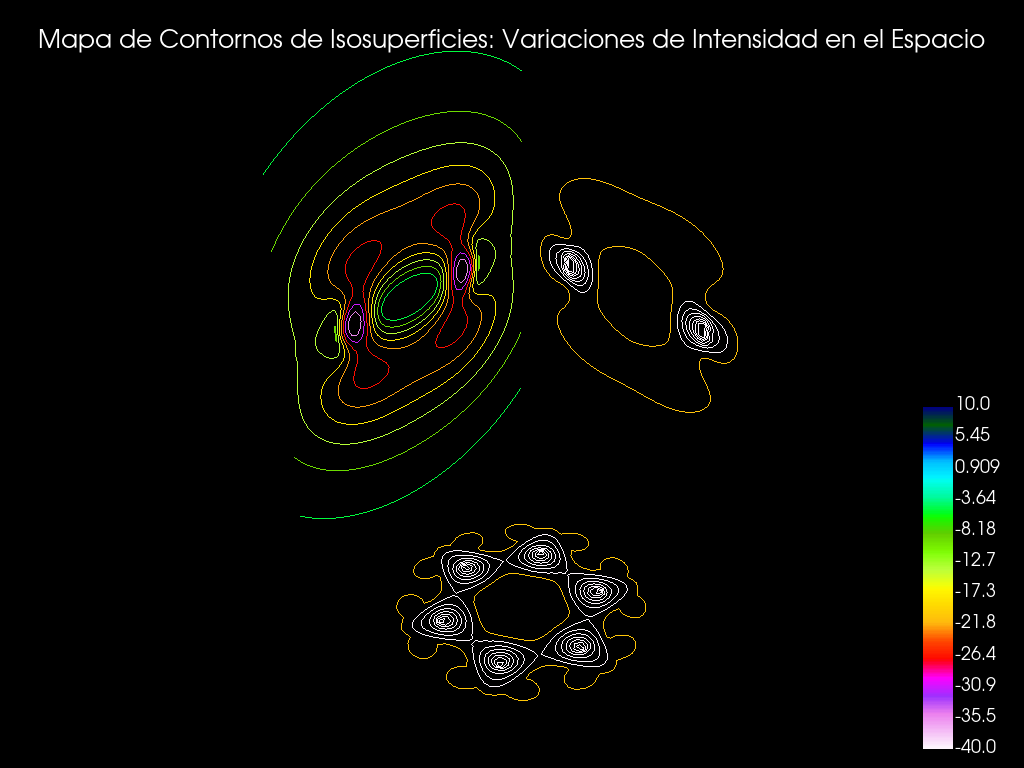

In [18]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

min_x = leer.bounds[3]
min_y = leer.bounds[3]
min_z = leer.bounds[-1]

corte = leer.slice_orthogonal(x=0, y=0, z=0)

y_slice = corte[1]
y_points = np.array(y_slice.points)
y_points[:, 1] -= min_y
y_slice.points = y_points


z_slice = corte[2]
z_points = np.array(z_slice.points)
z_points[:, 2] -= min_z
z_slice.points = z_points


x_slice = corte[0]
x_points = np.array(x_slice.points)
x_points[:, 0] -= min_x
x_slice.points = x_points


x_contour = x_slice.contour()
y_contour = y_slice.contour()
z_contour = z_slice.contour()


light1 = pv.Light(position=(min_x, 0, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)
light2 = pv.Light(position=(0, min_y, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)
light3 = pv.Light(position=(0, 0, min_z), focal_point=(0, 0, 0), color='white', intensity=1.0)


p = pv.Plotter(lighting='none')

sargs = dict(
    n_labels=num_labels,
    vertical = not orientation_var.get() == 'H',
    color = 'w'
    )

if 'color_orientation' in darg:
    del darg['color_orientation']

p.add_light(light1)
p.add_light(light2)
p.add_light(light3)
    
    
p.add_mesh(x_contour, show_scalar_bar=False, **darg, clim=(min_color_value, max_color_value))
p.add_mesh(y_contour, show_scalar_bar=False,**darg, clim=(min_color_value, max_color_value))
p.add_mesh(z_contour, show_scalar_bar=False, **darg,clim=(min_color_value, max_color_value))
p.add_scalar_bar(**sargs)
p.set_background('k')


titulo = f"Mapa de Contornos de Isosuperficies: Variaciones de Intensidad en el Espacio"
p.add_title(titulo, font_size=10, color='w')


    
nombre_archivo = f"Slice_orthogonal contorno con isolineas.png"  # Aquí defines el nombre del archivo con base en el índice del ciclo
p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
p.show()
ruta_imagen = os.path.join(nombre_carpeta_vtk, nombre_archivo) ######################## Escribir el nombre de la carpeta(otra vez)
os.replace(nombre_archivo, ruta_imagen)
imagenes_generadas.append(ruta_imagen)

## Graphic vti

This cell loads and visualises data from a 3D mesh, a dataset in VTI format, and performs a slice along the x, y, and z axes.
In the first lines of code, we are defining a function load_and_visualize_vti() that is in charge of loading and visualizing the mesh. In this section we get the minimum mesh boundaries along the x, y, and z axes and then perform an orthogonal cut along them.
If we choose to use a custom colour bar, we iterate through each block in the cut object and extract the vector data for each block. We then calculate the magnitude of these vectors and assign it to the cut mesh. Finally, we create glyphs that represent these vectors.


Output()

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


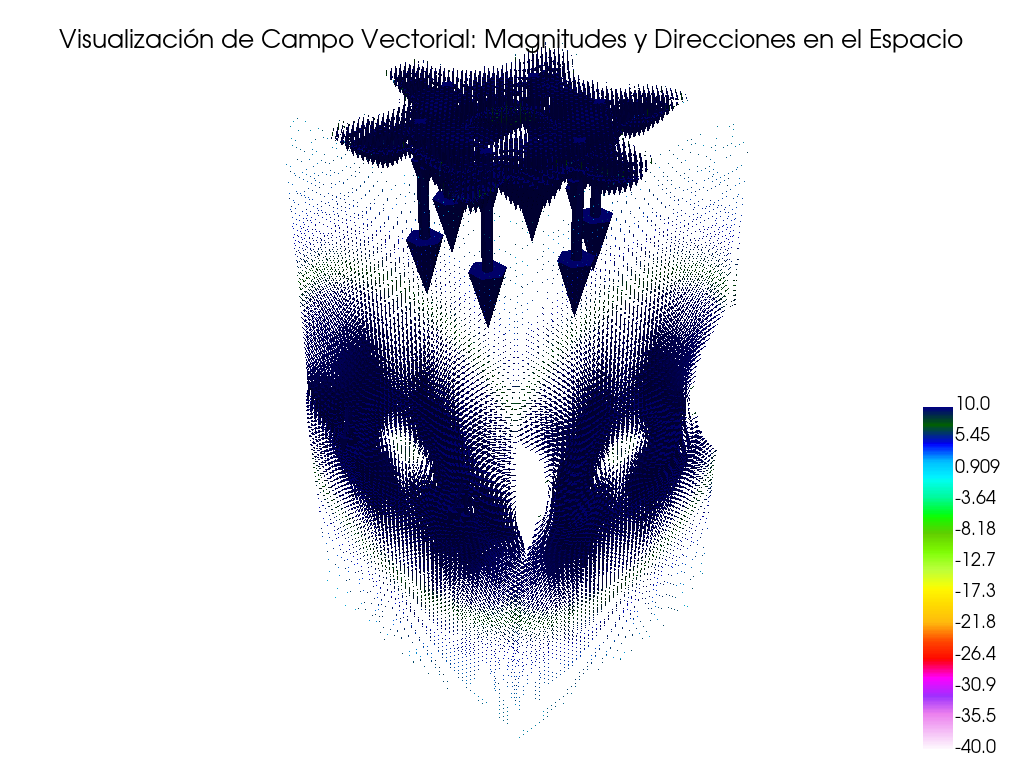

In [19]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

def load_and_visualize_vti():
    #The minimum limits along the x, y, z axes are obtained from the file mesh limits.
    min_x = grid.bounds[0]
    min_y = grid.bounds[2]
    min_z = grid.bounds[4]

    # Cut along the x, y, and z axes.
    sliced = grid.slice_orthogonal()
    
    p = pv.Plotter()
    
    sargs = dict(
        
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H')
    
    
    for i in range(sliced.GetNumberOfBlocks()):
        slice_i = sliced[i]
        # Extracts vector data from the cut grid
        vectors = slice_i.point_data['vectors']

        # Calculate the magnitude of the vectors
        magnitudes = np.linalg.norm(vectors, axis=1)

        # Assigns the magnitude data to the cut grid
        slice_i['magnitudes'] = magnitudes

        # Creates glyphs (arrows) representing the vectors
        glyphs = slice_i.glyph(orient="vectors", scale=True, factor=0.016)

        # Adjust the position of the points in the cut.
        points = np.array(glyphs.points)
        if i == 0:  # slice x
            points[:, 0] -= min_x
        elif i == 1:  # slice y
            points[:, 1] -= min_y
        else:  # slice z
            points[:, 2] -= min_z
        glyphs.points = points

        if 'color_orientation' in darg:
            del darg['color_orientation']
            
        p.add_mesh(glyphs, show_scalar_bar=False, **darg, clim=(min_color_value, max_color_value))
        p.add_scalar_bar(**sargs)
        
        titulo = f"Visualización de Campo Vectorial: Magnitudes y Direcciones en el Espacio"
        p.add_title(titulo, font_size=10)
        
        
        
    nombre_archivo = f"grafico_Orthogonal_Magnitud {i+1}.png"  
    p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
    p.show()
    ruta_imagen = os.path.join(nombre_carpeta_vti, nombre_archivo) 
    os.replace(nombre_archivo, ruta_imagen)
    imagenes_generadas.append(ruta_imagen)
###############################################
output_widget = widgets.Output()  
display(output_widget)

window = tk.Tk()
window.title("Molecular structures viewer")

open_file_button = tk.Button(window, text="Open VTI file", command=open_vti_file)
open_file_button.pack(pady=10)

info_label = tk.Label(window, text="Upload a VTI file to visualize and slice the molecular structure.")
info_label.pack(pady=20)

window.mainloop()
##############################################################################################################

In this cell the same thing is happening as in the previous cell, but now what is displayed is the outline.

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


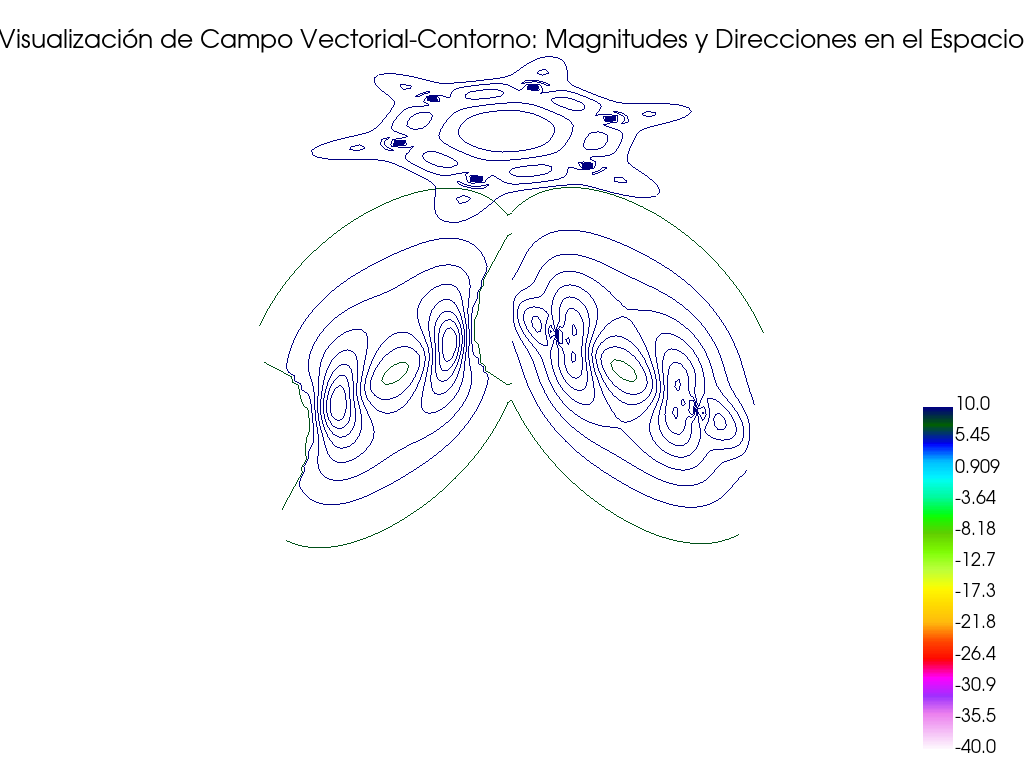

In [20]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

min_x = grid.bounds[3]
min_y = grid.bounds[3]
min_z = grid.bounds[4]

# Cut along the x, y, and z axes.
sliced = grid.slice_orthogonal()

p = pv.Plotter()

sargs = dict(
    n_labels=num_labels,
    vertical = not orientation_var.get() == 'H',
    color = 'k')

# Runs through each cut in the MultiBlock
for i in range(sliced.GetNumberOfBlocks()):
    slice_i = sliced[i]
    # Extracts vector data from the cut grid
    vectors = slice_i.point_data['vectors']
    # Calculate the magnitude of the vectors
    magnitudes = np.linalg.norm(vectors, axis=1)
    # Assigns the magnitude data to the cut grid
    slice_i['magnitudes'] = magnitudes
    # Creates glyphs (arrows) representing the vectors
    glyphs = slice_i.glyph(orient="vectors", scale=True, factor=0.016)
    # Calculates level lines from the magnitude data
    contours = slice_i.contour(scalars='magnitudes')
    # Adjust the position of the points in the cut.
    points_glyphs = np.array(glyphs.points)
    points_contours = np.array(contours.points)
    if i == 0:  #slice x
        points_glyphs[:, 0] -= min_x
        points_contours[:, 0] -= min_x
    elif i == 1:  #slice y
        points_glyphs[:, 1] -= min_y
        points_contours[:, 1] -= min_y
    else:  #slice z
        points_glyphs[:, 2] -= min_z
        points_contours[:, 2] -= min_z
    glyphs.points = points_glyphs
    contours.points = points_contours

    if 'color_orientation' in darg:
        del darg['color_orientation']
    
    
    p.add_mesh(contours, show_scalar_bar=False, **darg, clim=(min_color_value, max_color_value))
    p.set_background('w')
    p.add_scalar_bar(**sargs)

    titulo = f"Visualización de Campo Vectorial-Contorno: Magnitudes y Direcciones en el Espacio"
    p.add_title(titulo, font_size=10)
    
nombre_archivo = f"grafico_Orthogonal_contorno_magnitud {i+1}.png"  
p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
p.show()
ruta_imagen = os.path.join(nombre_carpeta_vti, nombre_archivo) 
os.replace(nombre_archivo, ruta_imagen)
imagenes_generadas.append(ruta_imagen)

### Cuts and contours with vti

As seen in previous cells, a series of isosurfaces or contours are generated from the 3D mesh data, which come from a VTI file format. Isosurfaces are three-dimensional contour surfaces that represent points of equal value within the volume data, i.e. surfaces that link all points with the same scalar value. In this case, these surfaces represent areas of equal vector magnitude within the 3D mesh.

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


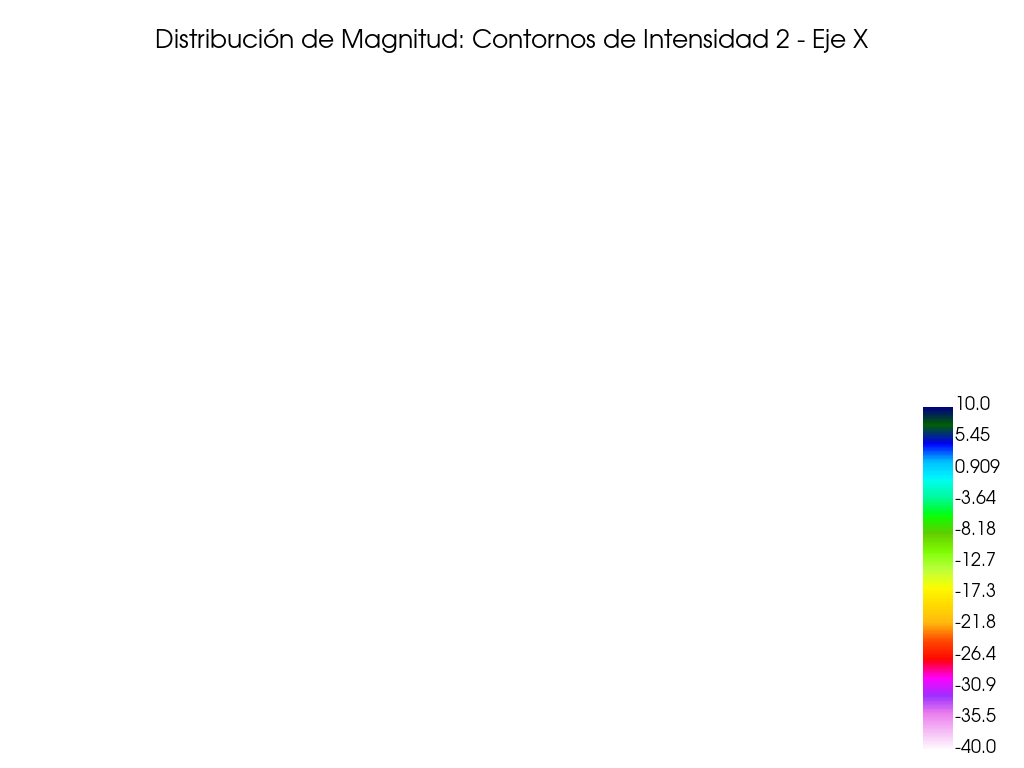

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


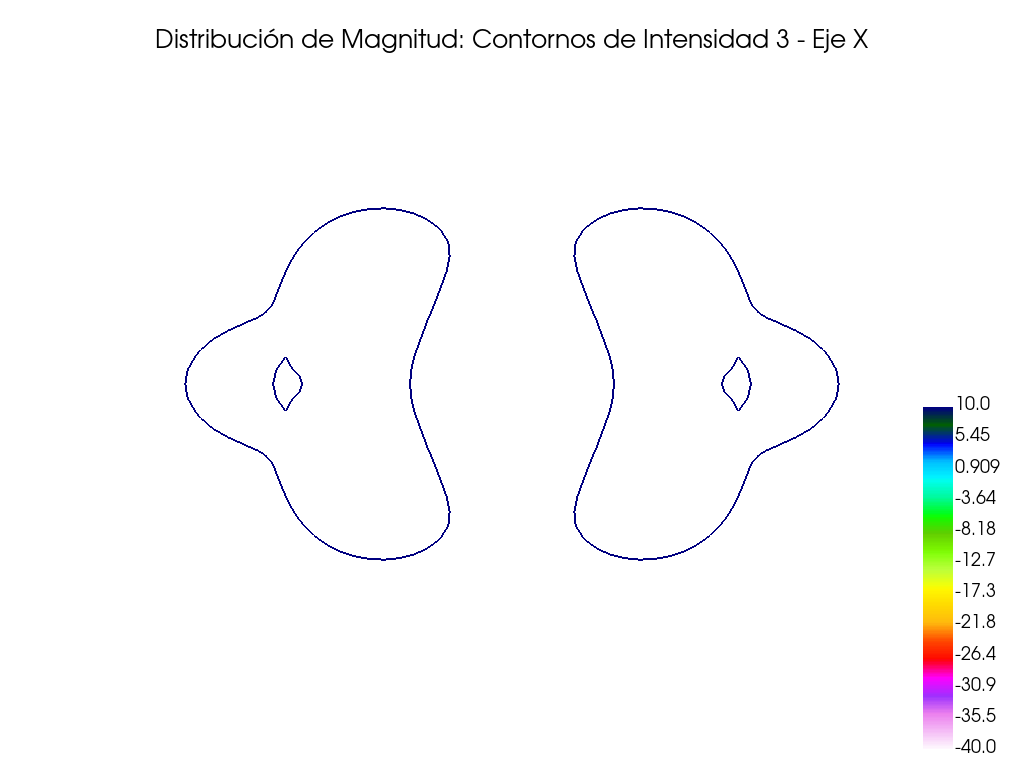

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


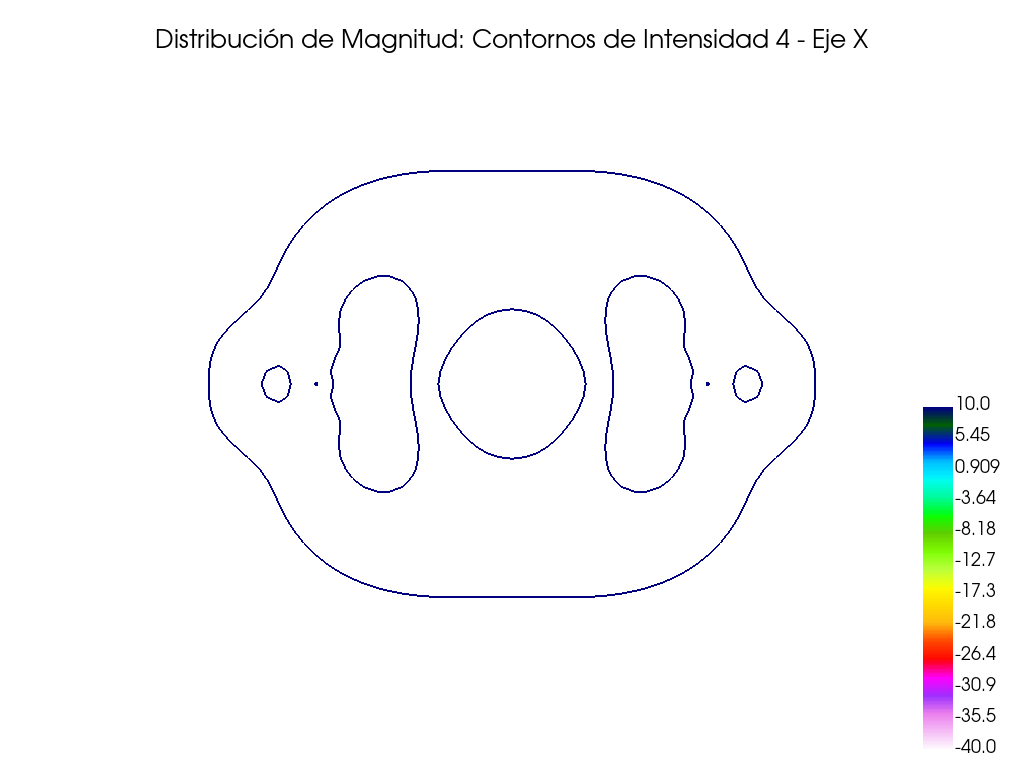

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


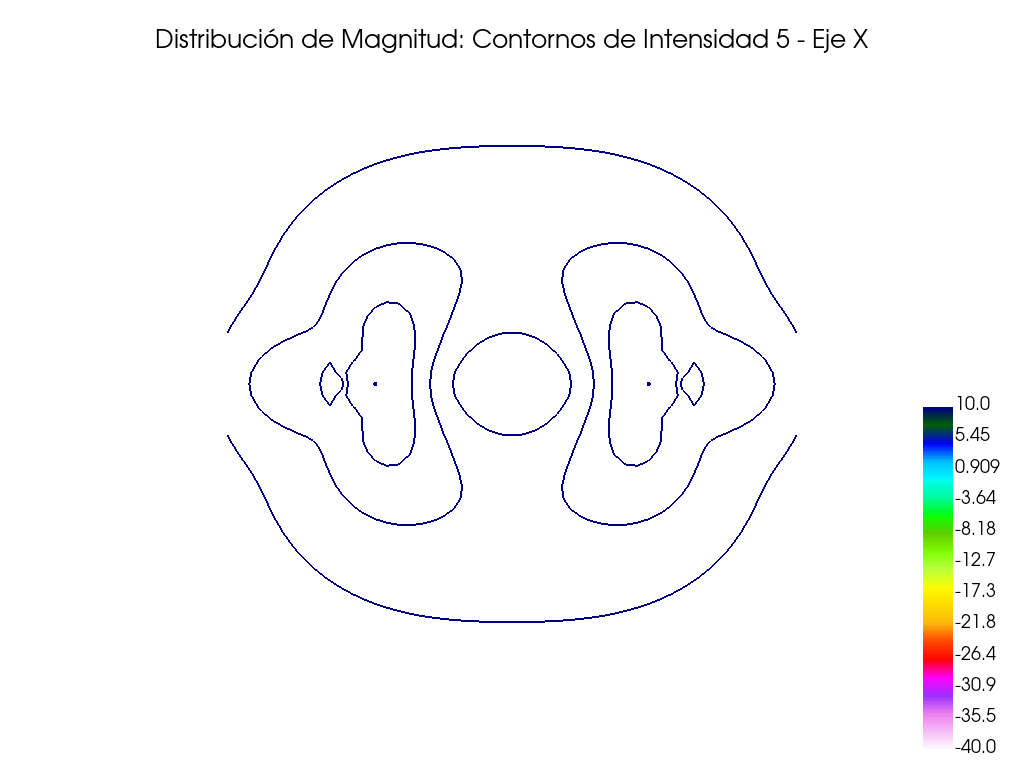

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


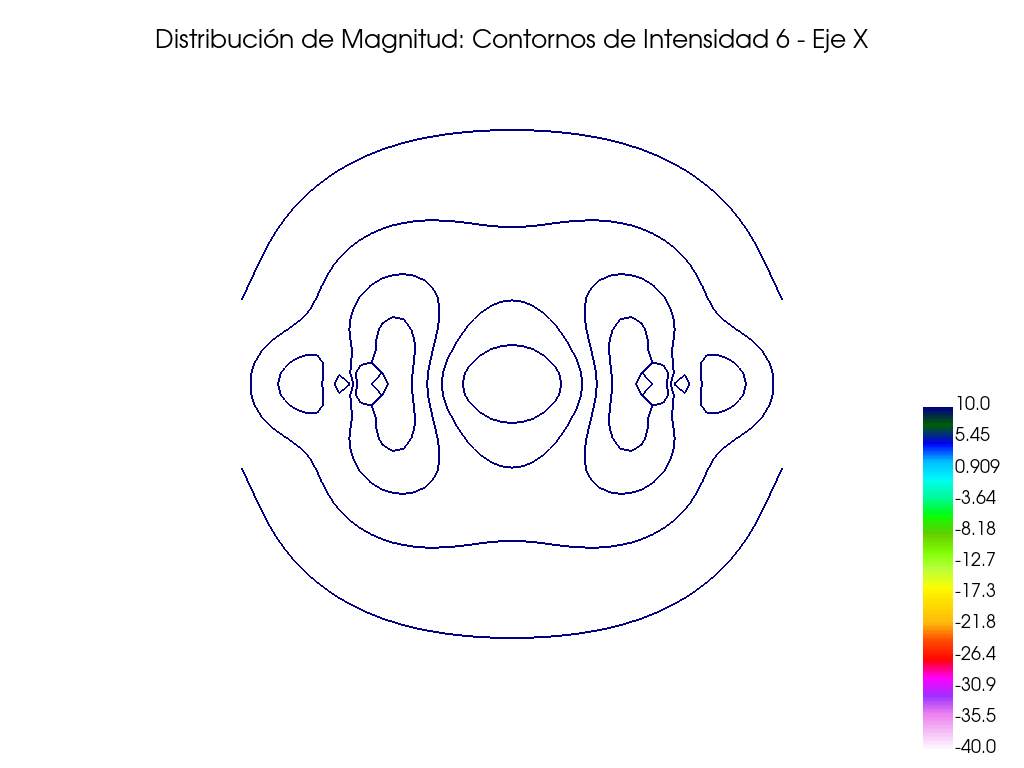

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


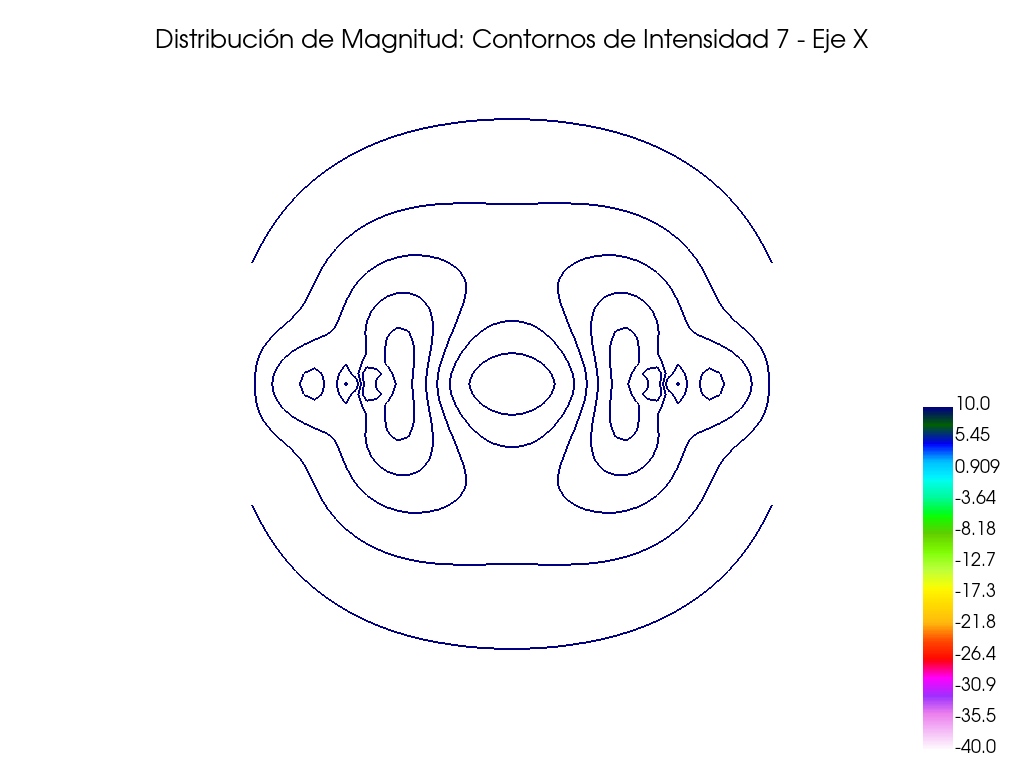

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


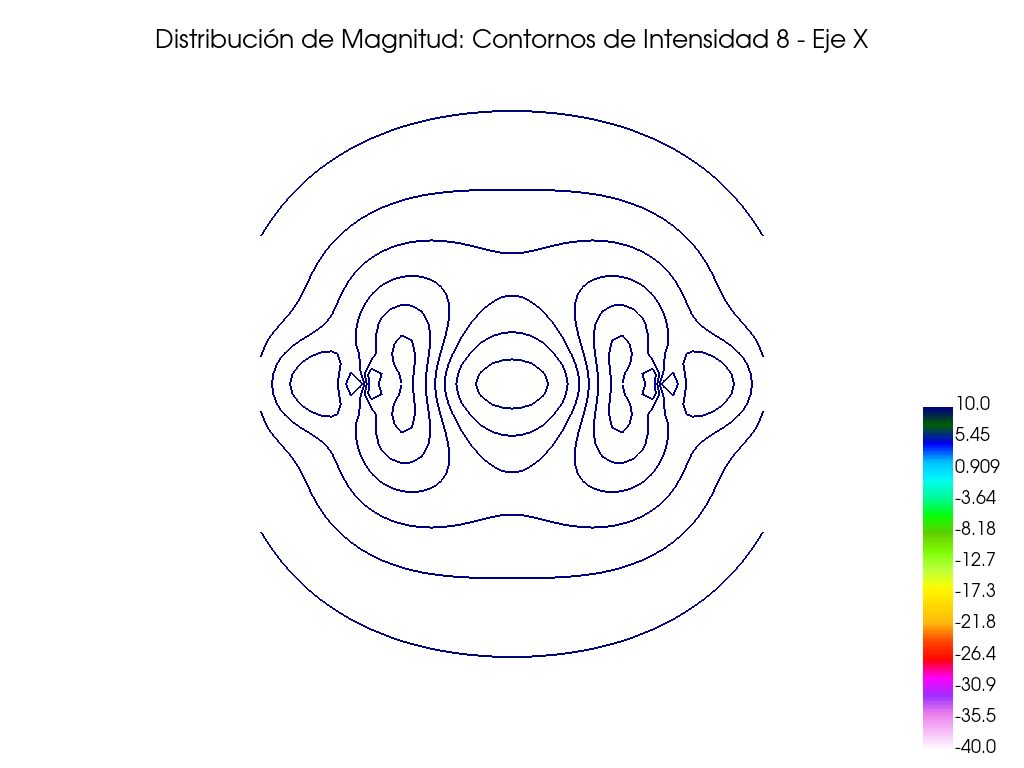

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


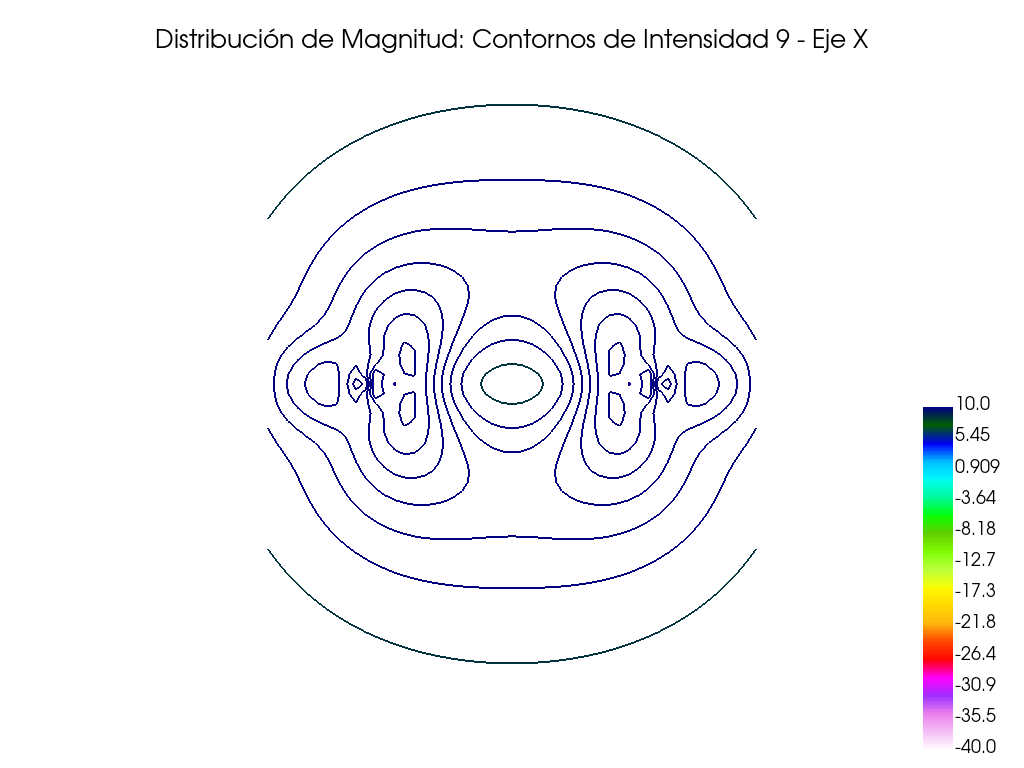

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


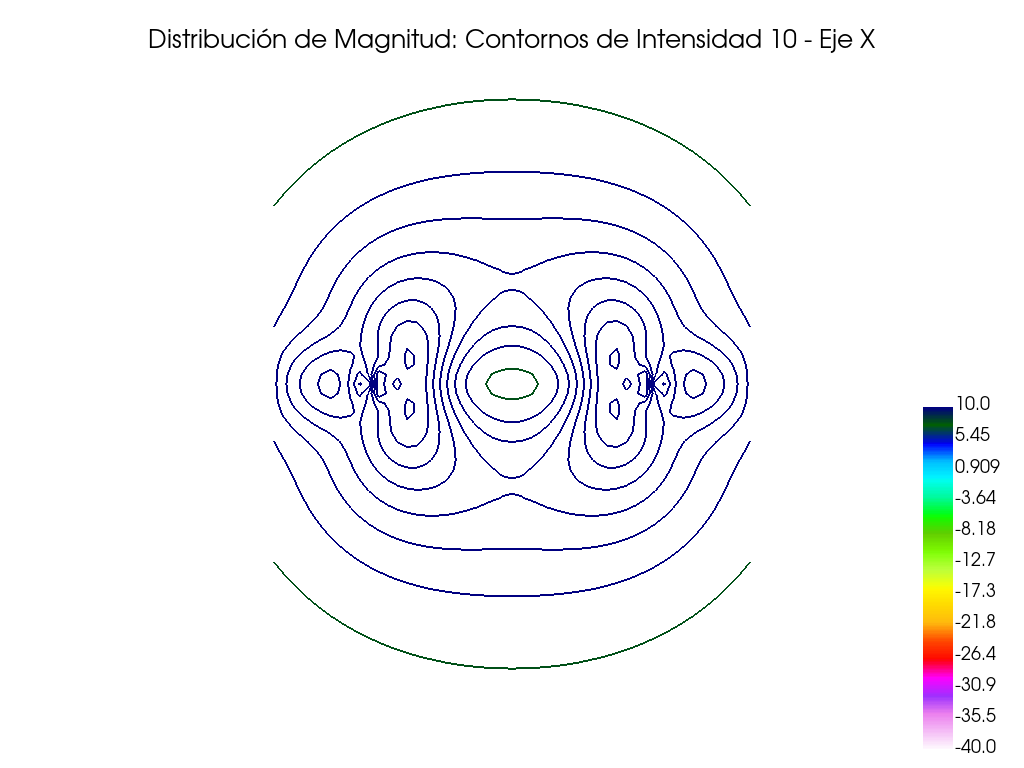

In [21]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# We define the values that will represent the isosurfaces.
valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Iterate through each isosurface value
for i, valor in enumerate(valores_isosurfaces):
    sliced = grid.slice(normal='x')
    # Obtain the vectors of the points on the cut mesh      
    vectors = sliced.point_data['vectors']
    # Calculate the magnitude of these vectors
    magnitudes = np.linalg.norm(vectors, axis=1)
    # We assign the magnitude data to the cut mesh
    sliced['magnitudes'] = magnitudes
    # We generate the isosurface representing the points of equal magnitude
    contornos = sliced.contour(isosurfaces=valor, scalars='magnitudes')
    p = pv.Plotter()
    
    sargs = dict(
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H',
        color = 'k')
    
    if 'color_orientation' in darg:
        del darg['color_orientation']
    
    
    p.add_mesh(contornos, show_scalar_bar=False, line_width=2, **darg, clim=(min_color_value, max_color_value))
    p.camera_position = (1,0,0)
    p.add_scalar_bar(**sargs)
    titulo = f"Distribución de Magnitud: Contornos de Intensidad {valor} - Eje X"
    p.add_title(titulo, font_size=10)
    
    
    
    #
    
    nombre_archivo = f"grafico_slice_contornoX_magnitud {i+1}.png"  
    p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
    p.set_background('w')
    p.show()
    ruta_imagen = os.path.join(nombre_carpeta_vti, nombre_archivo) 
    os.replace(nombre_archivo, ruta_imagen)
    imagenes_generadas.append(ruta_imagen)

In this cell the same happens as in the previous cell, the only difference is the printing, as in this cell the y-axis is occupied and in the other cell the z-axis is occupied, as shown below.

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


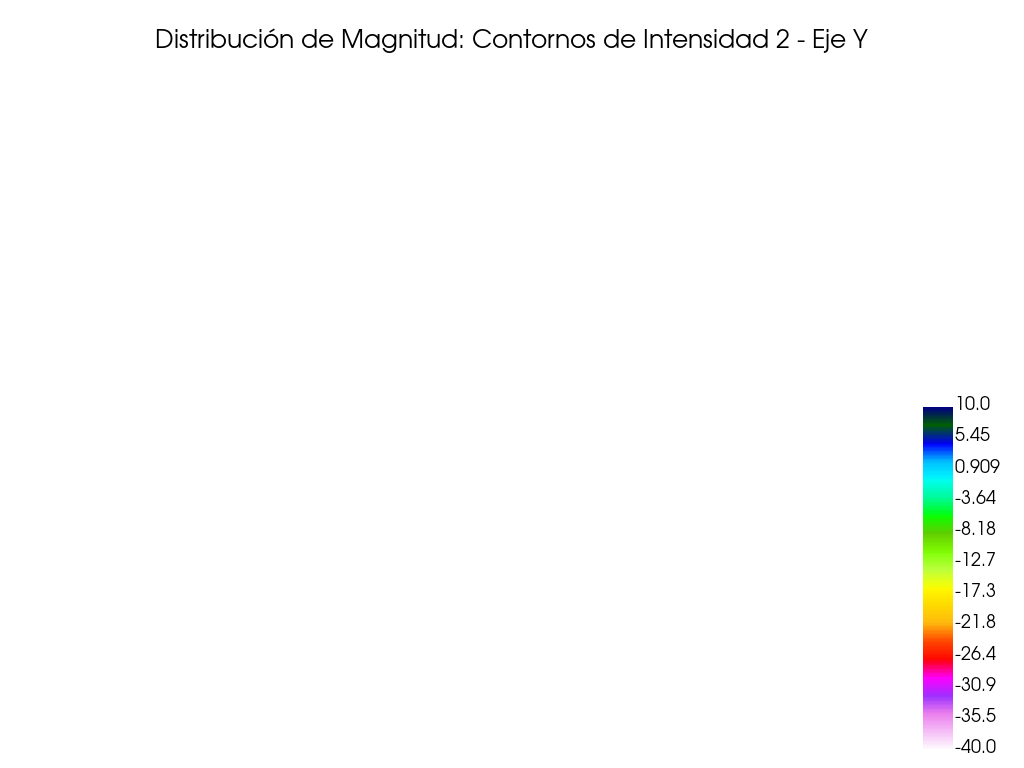

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


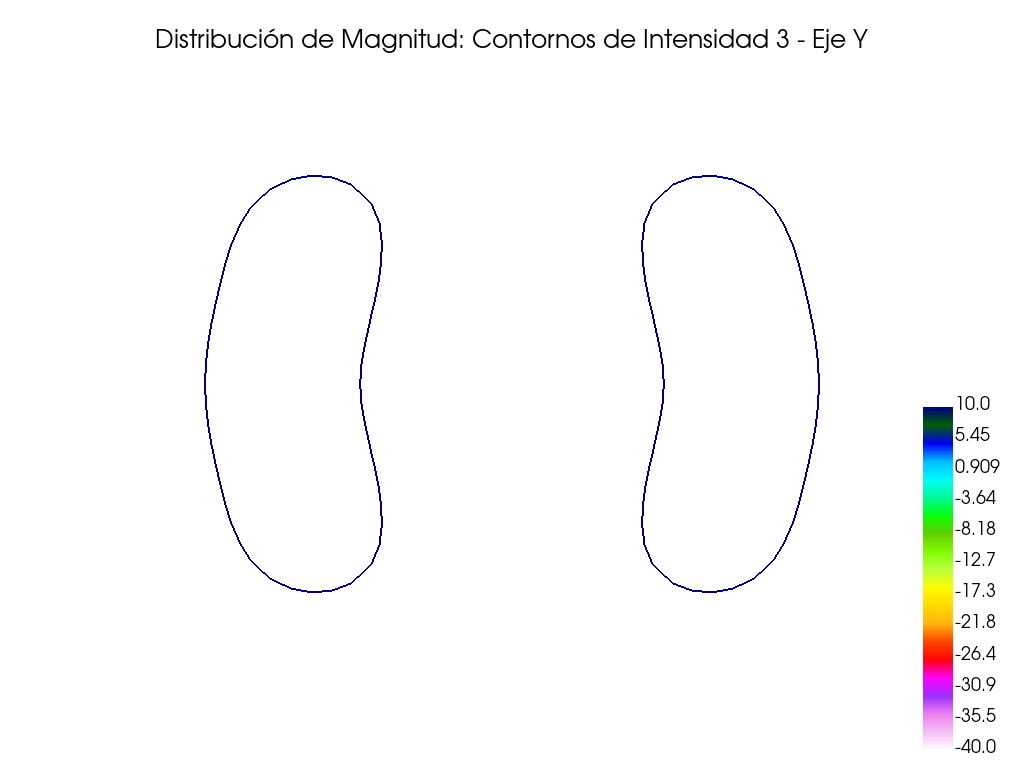

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


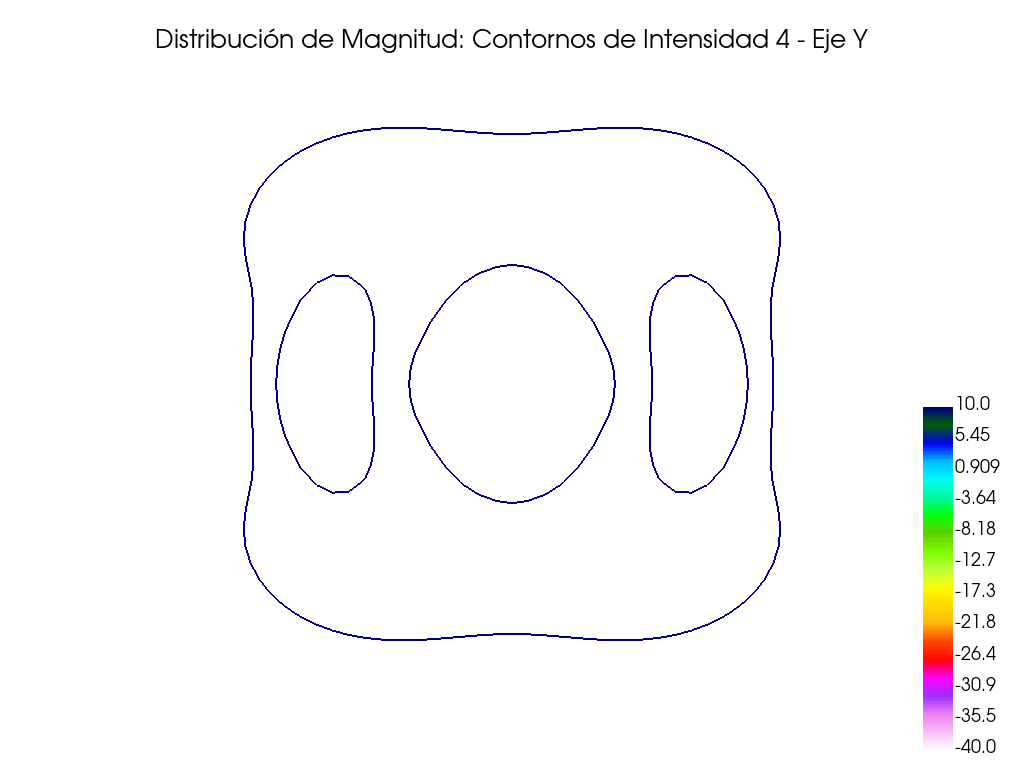

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


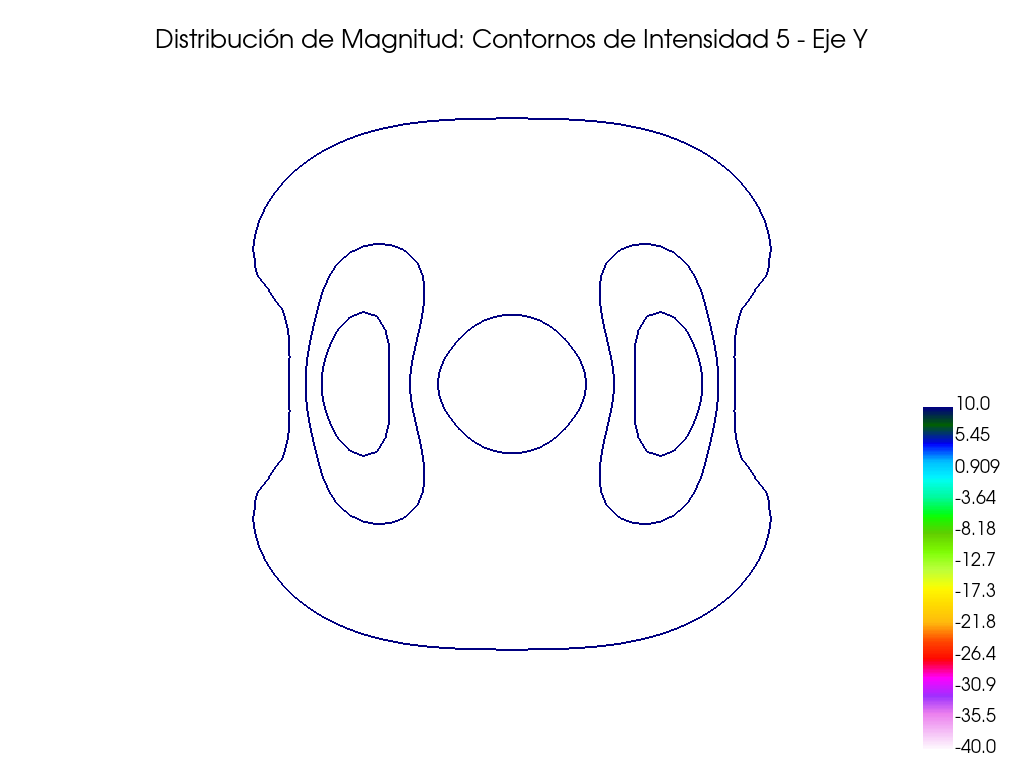

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


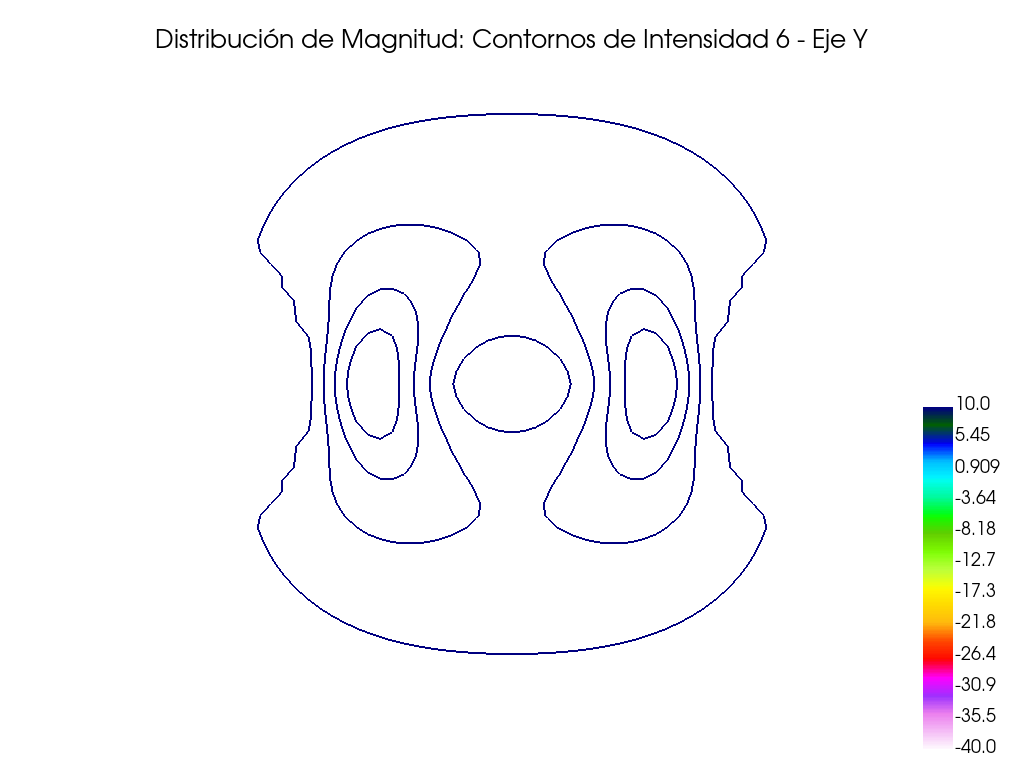

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


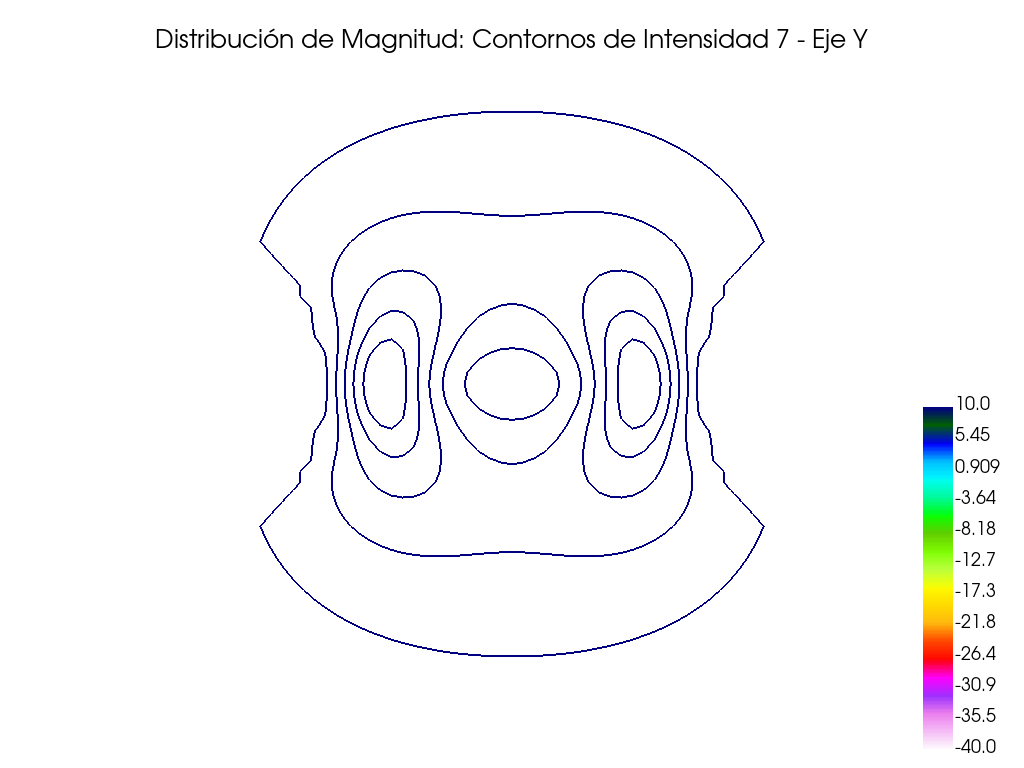

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


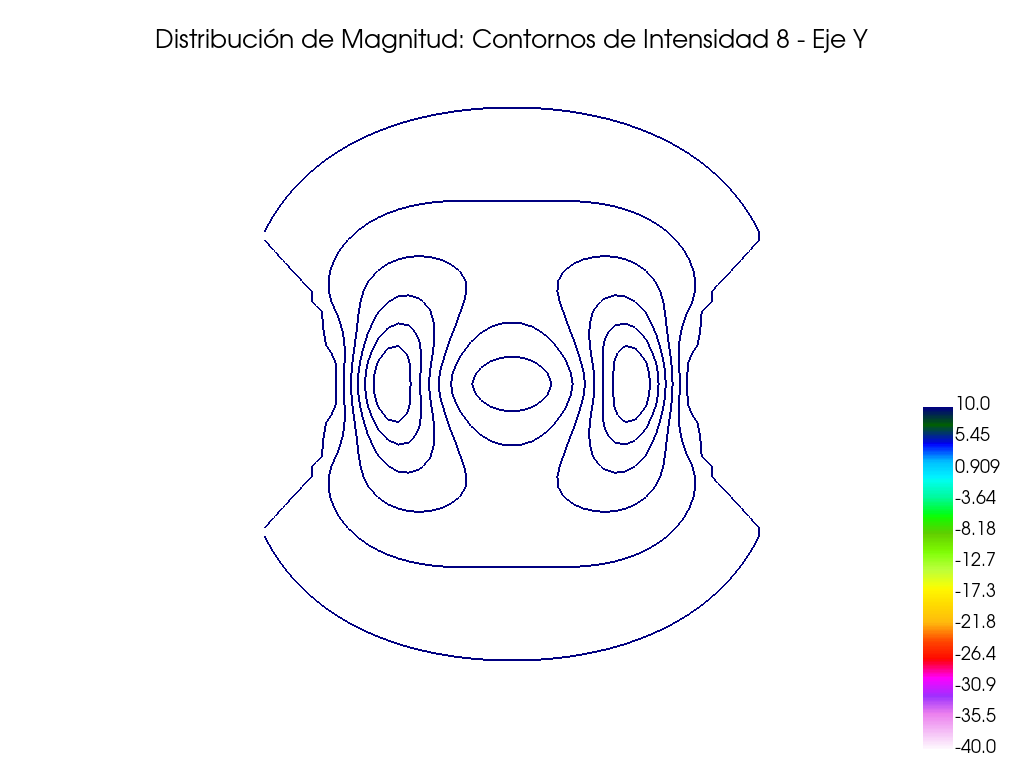

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


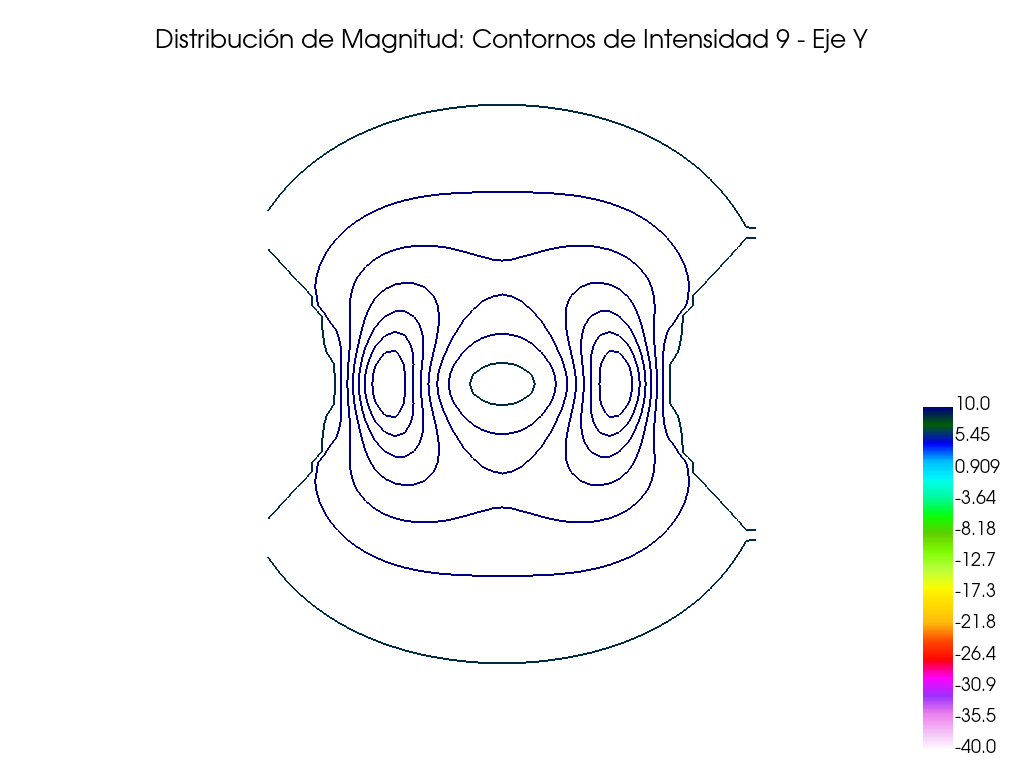

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


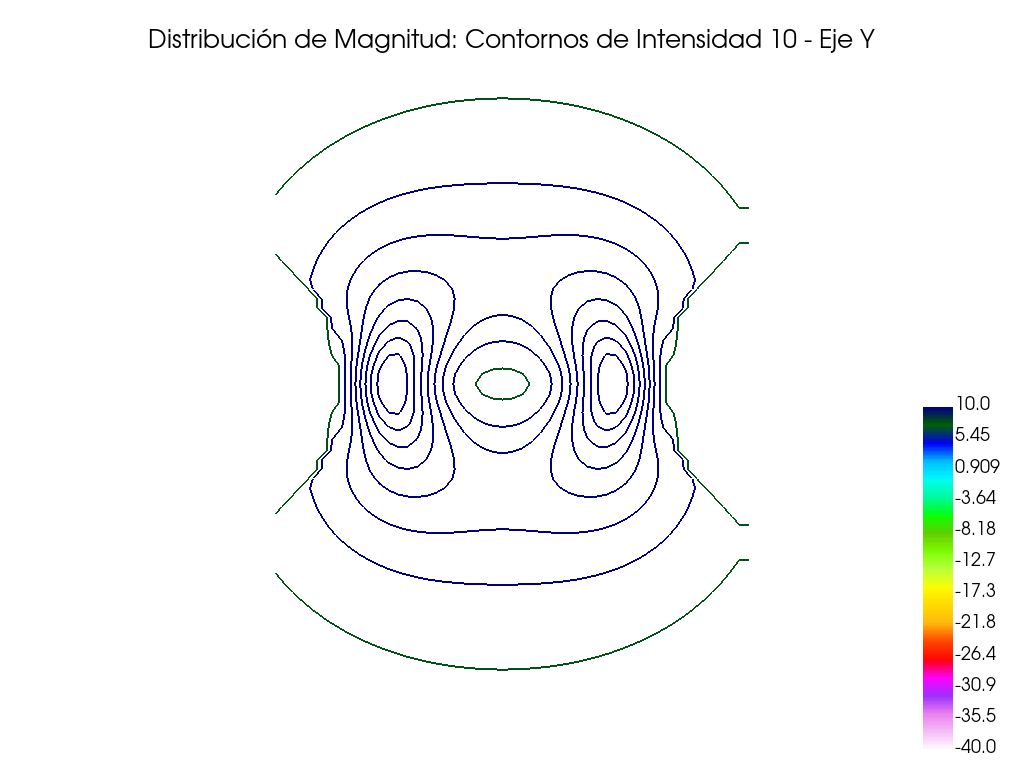

In [22]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i, valor in enumerate(valores_isosurfaces):
    sliced = grid.slice(normal='y')
    # Assign the magnitude data to the cut grid
    vectors = sliced.point_data['vectors']
    magnitudes = np.linalg.norm(vectors, axis=1)
    
    sliced['magnitudes'] = magnitudes
    contornos = sliced.contour(isosurfaces=valor, scalars='magnitudes')
    p = pv.Plotter()
    
    sargs = dict(
        
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H',
        color = 'k')
    
    if 'color_orientation' in darg:
        del darg['color_orientation']
    
    p.add_mesh(contornos, show_scalar_bar=False, line_width=2,**darg, clim=(min_color_value, max_color_value))
    p.camera_position = (0,1,0)
    p.add_scalar_bar(**sargs)
    
    titulo = f"Distribución de Magnitud: Contornos de Intensidad {valor} - Eje Y"
    p.add_title(titulo, font_size=10)
    
    nombre_archivo = f"grafico_slice_contornoY_Magnitud {i+1}.png"  
    p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
    p.set_background('w')
    p.show()
    ruta_imagen = os.path.join(nombre_carpeta_vti, nombre_archivo) 
    os.replace(nombre_archivo, ruta_imagen)
    imagenes_generadas.append(ruta_imagen)

### In the last cells the process is the same but the only difference is that the vectors will be displayed in elevation form.

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


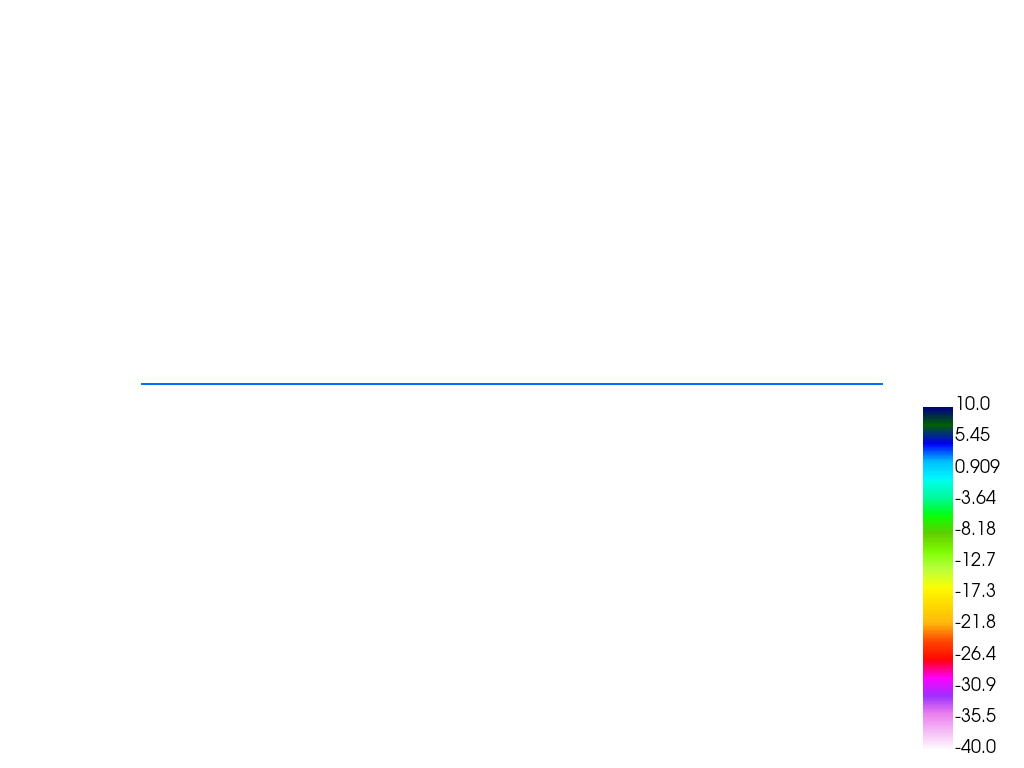

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


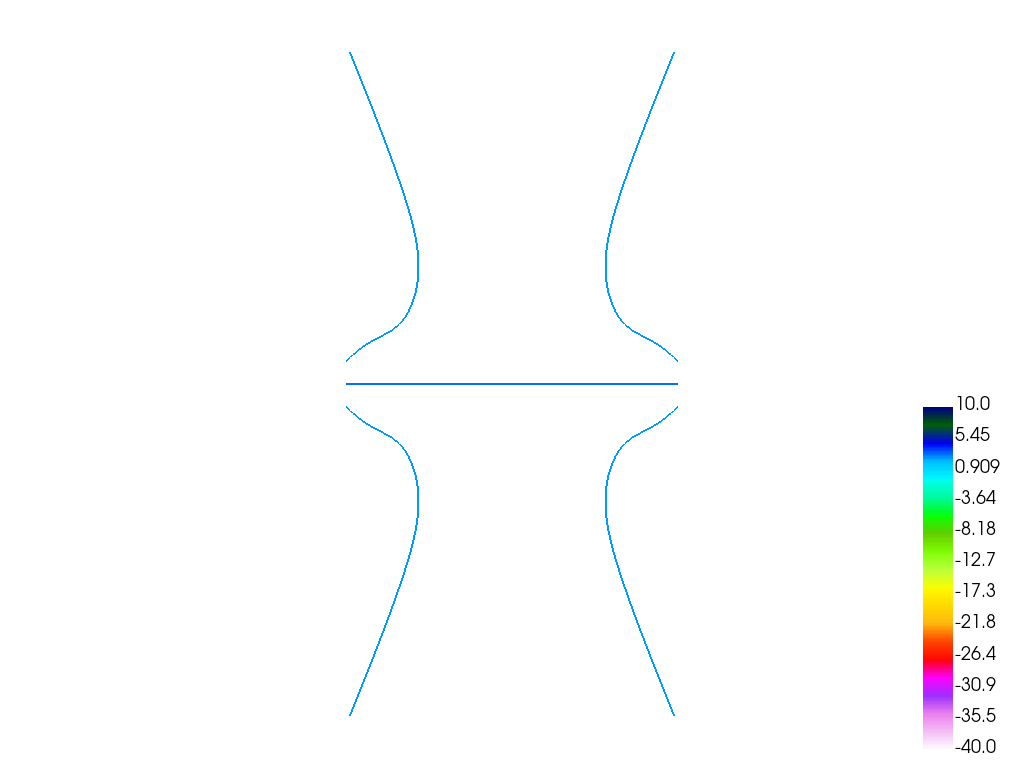

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


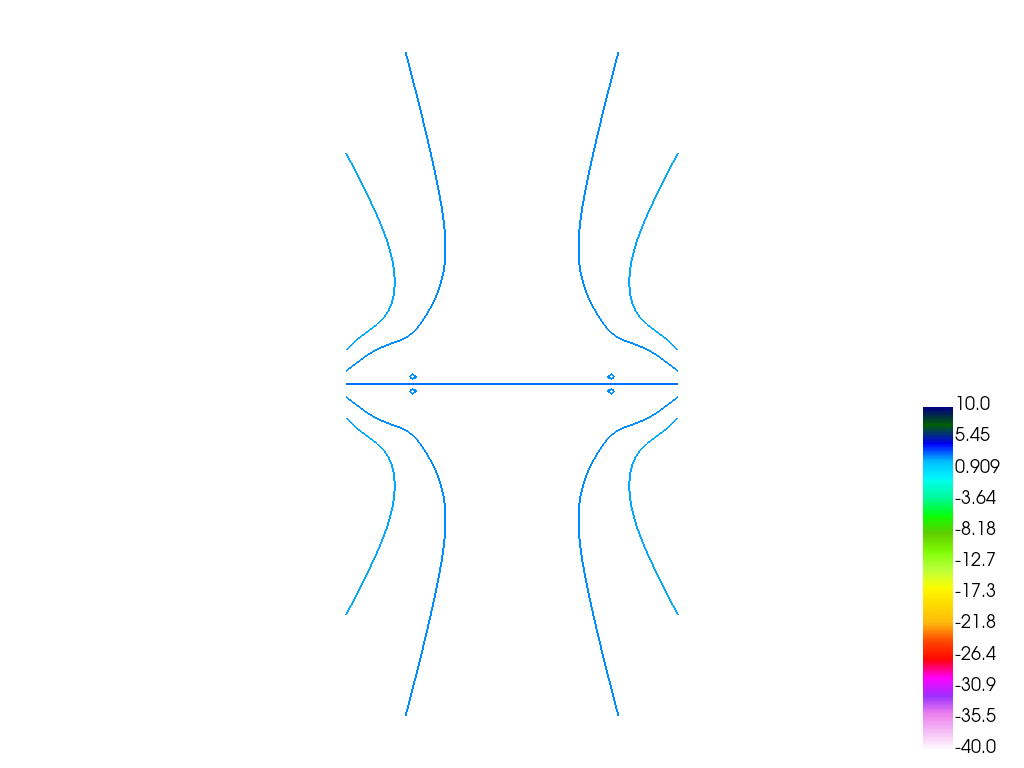

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


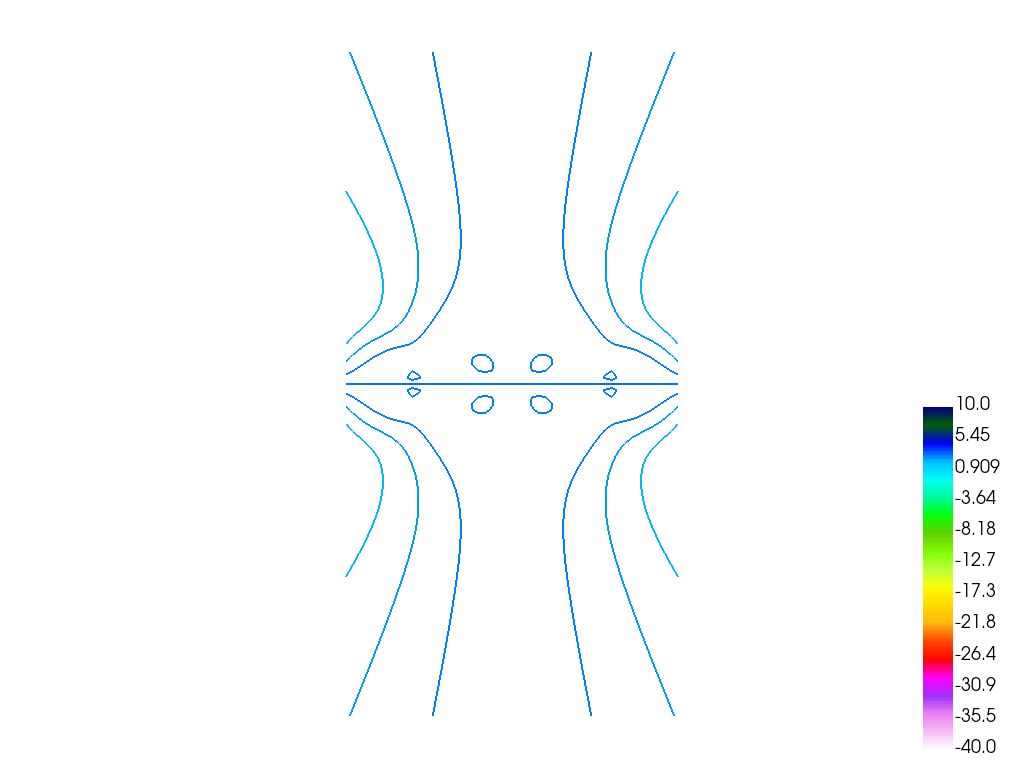

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


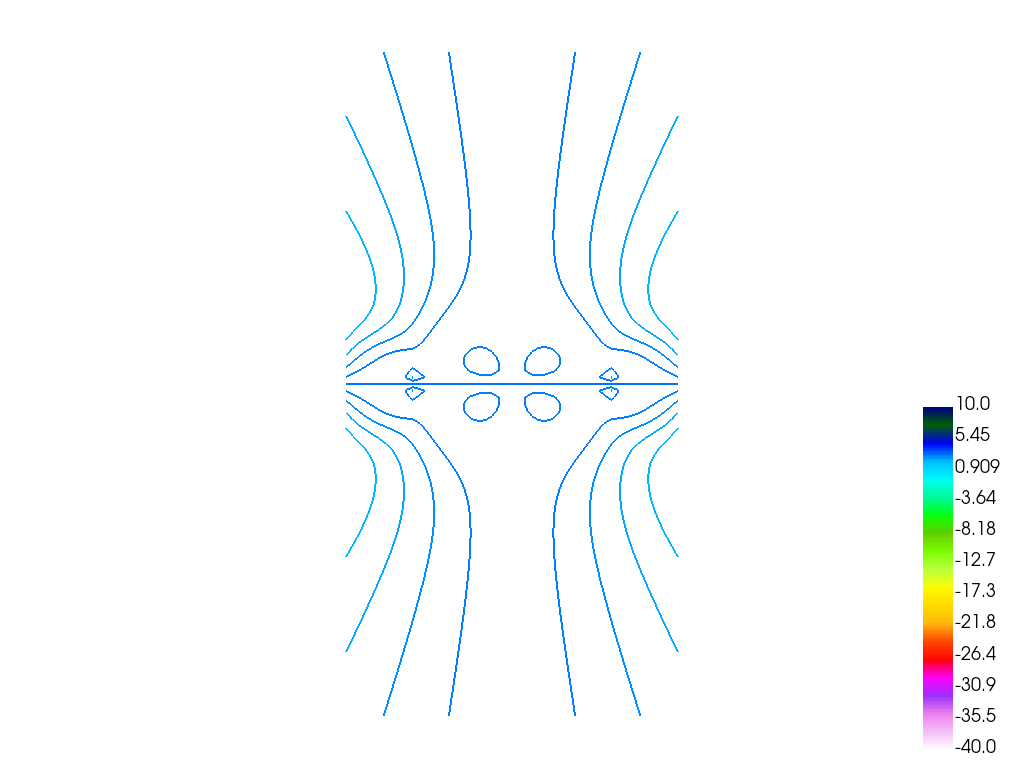

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


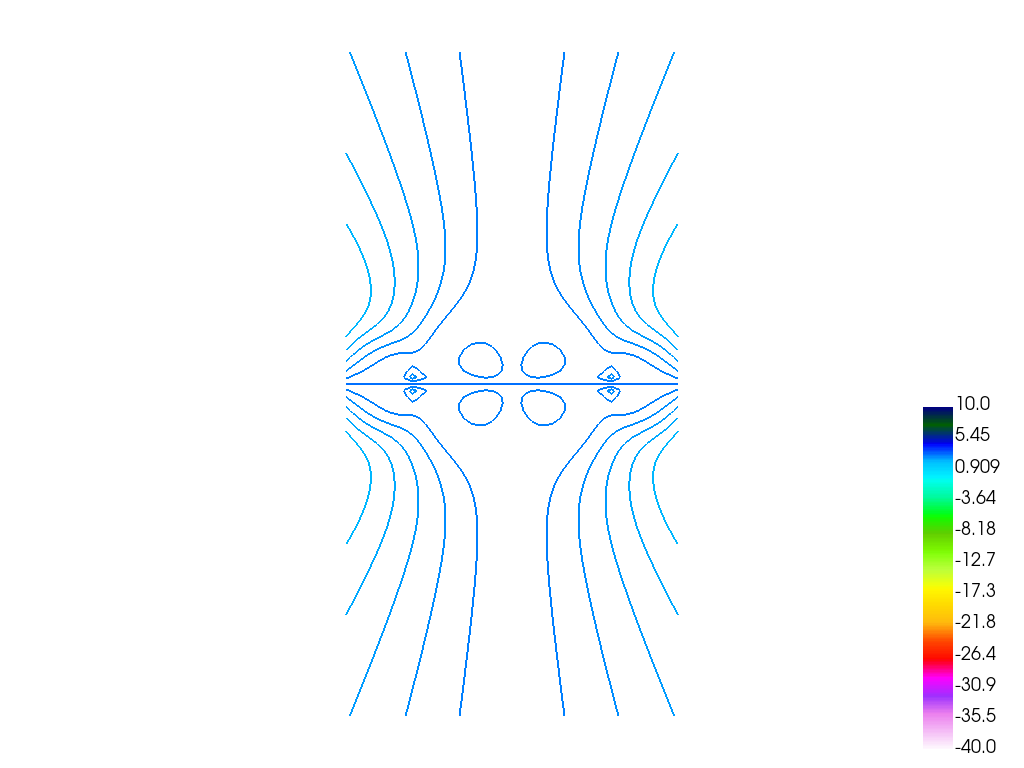

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


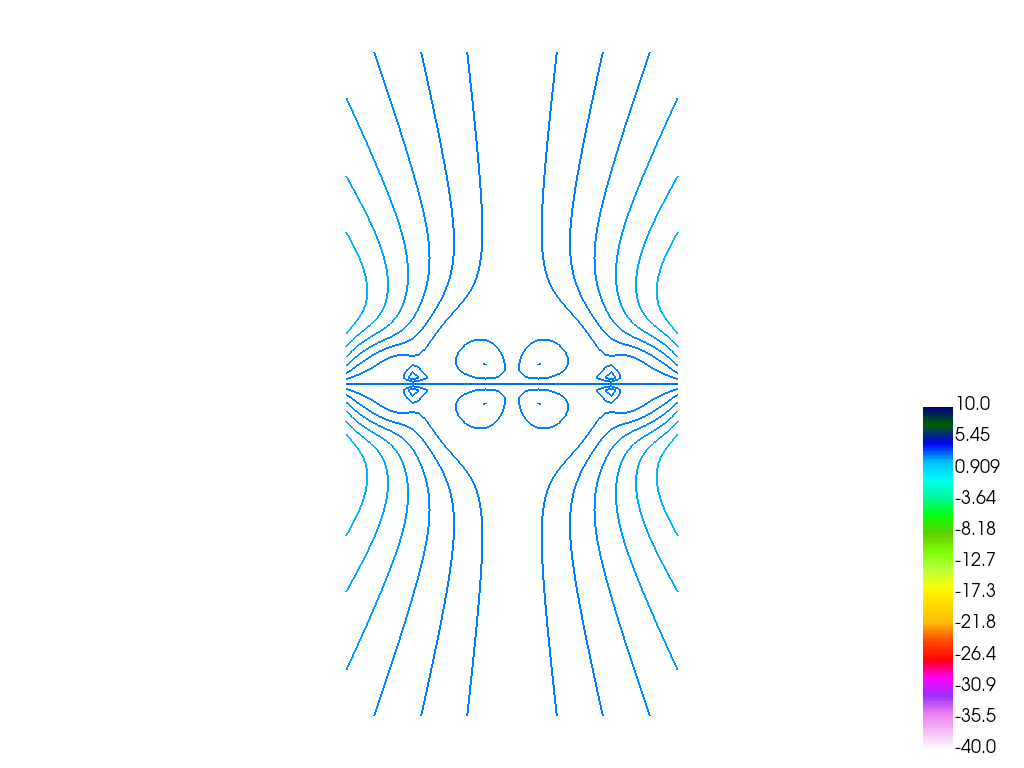

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


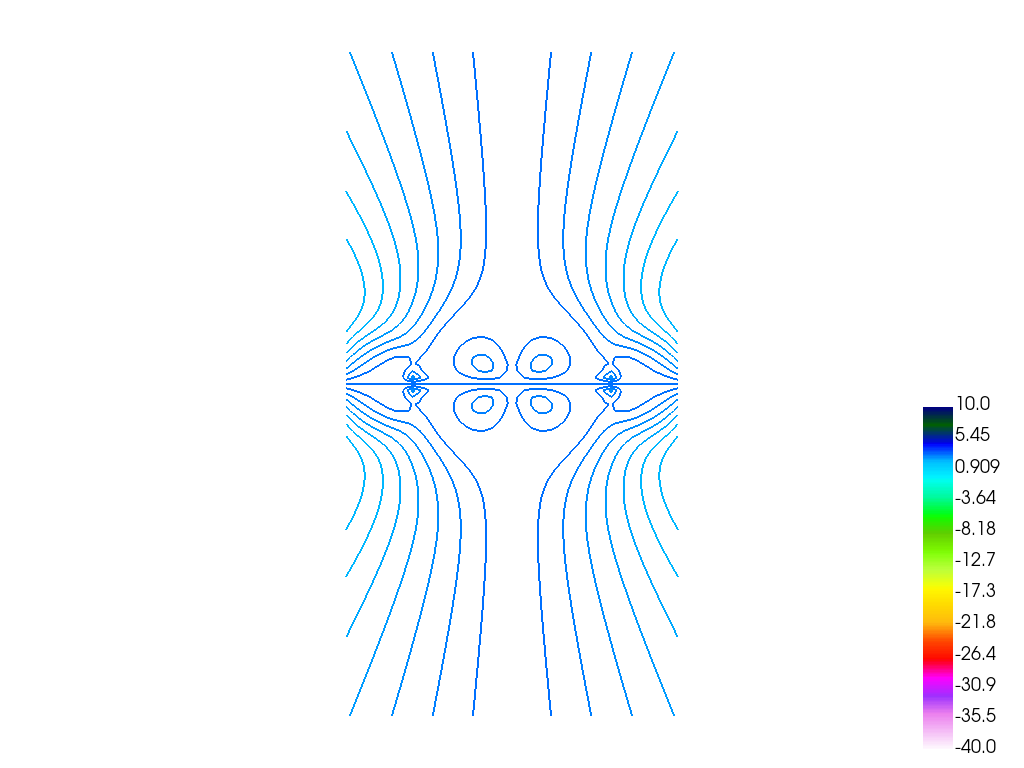

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


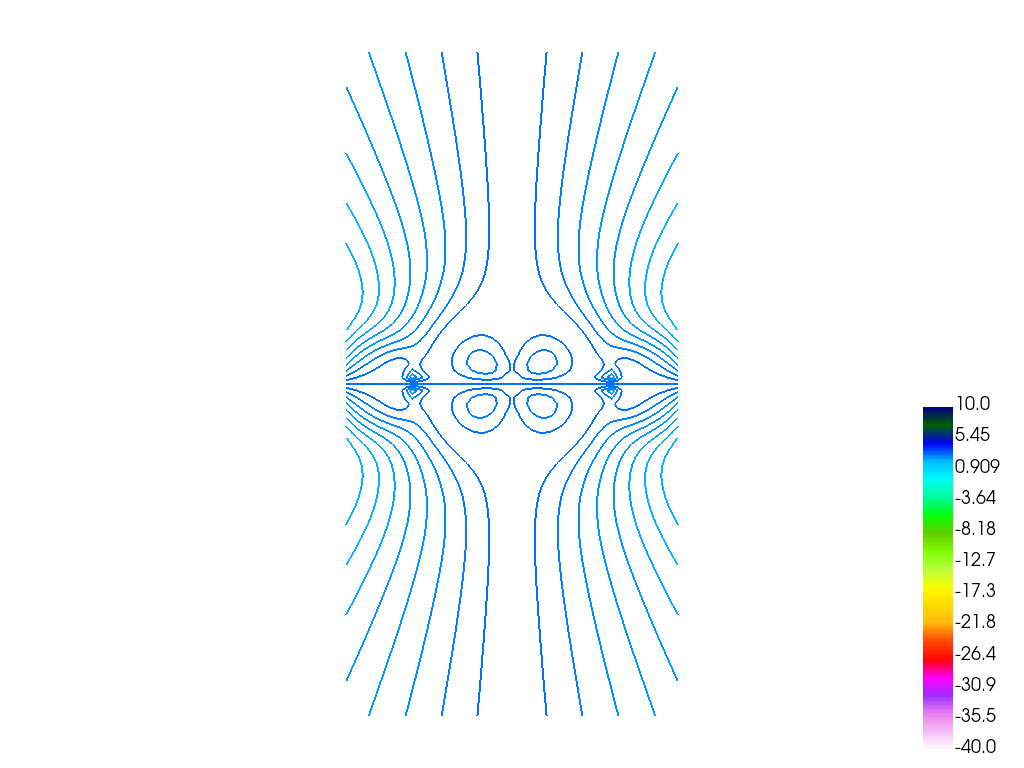

In [23]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# We define the values that will represent the isosurfaces
valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# We iterate through each isosurface value.
for i, valor in enumerate(valores_isosurfaces):
    # We perform a slice along the x-axis of the 3D mesh.
    sliced = grid.slice(normal='x')
     # We get the vectors of the points in the sliced mesh
    vectors = sliced.point_data['vectors']
    
    # We calculate the azimuthal angle (angle in the horizontal plane) and the elevation angle 
    # (angle from the horizontal plane) of the vectors
    azimuth = np.arctan2(vectors[:,1], vectors[:,0])
    elevation = np.arctan2(np.sqrt(vectors[:,0]**2 + vectors[:,1]**2), vectors[:,2])

    # Assign the direction data (azimuth and elevation) to the sliced mesh
    sliced['azimuth'] = azimuth
    sliced['elevation'] = elevation
    
    arrows = pv.Arrow()

    # we use the glyph function to create graphical representations of the oriented and scaled vectors (arrows) 
    # according to elevation
    glyphs = sliced.glyph(orient='vectors', scale='elevation', factor=0.126, geom=arrows)
    contornos = sliced.contour(isosurfaces=valor, scalars='elevation')


    # Display the sliced mesh, coloured by the direction of the vectors
    p = pv.Plotter()
    
    sargs = dict(
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H',
        color = 'k')
    
    if 'color_orientation' in darg:
        del darg['color_orientation']
    
    p.add_mesh(contornos, show_scalar_bar=False, line_width=2,**darg, clim=(min_color_value, max_color_value))
    p.camera_position = (1,0,0)
    p.add_scalar_bar(**sargs)
    nombre_archivo = f"grafico_contorno_X_Elevation {i+1}.png"  
    p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
    p.set_background('w')
    
    p.show()
    ruta_imagen = os.path.join(nombre_carpeta_vti, nombre_archivo) 
    os.replace(nombre_archivo, ruta_imagen)
    imagenes_generadas.append(ruta_imagen)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


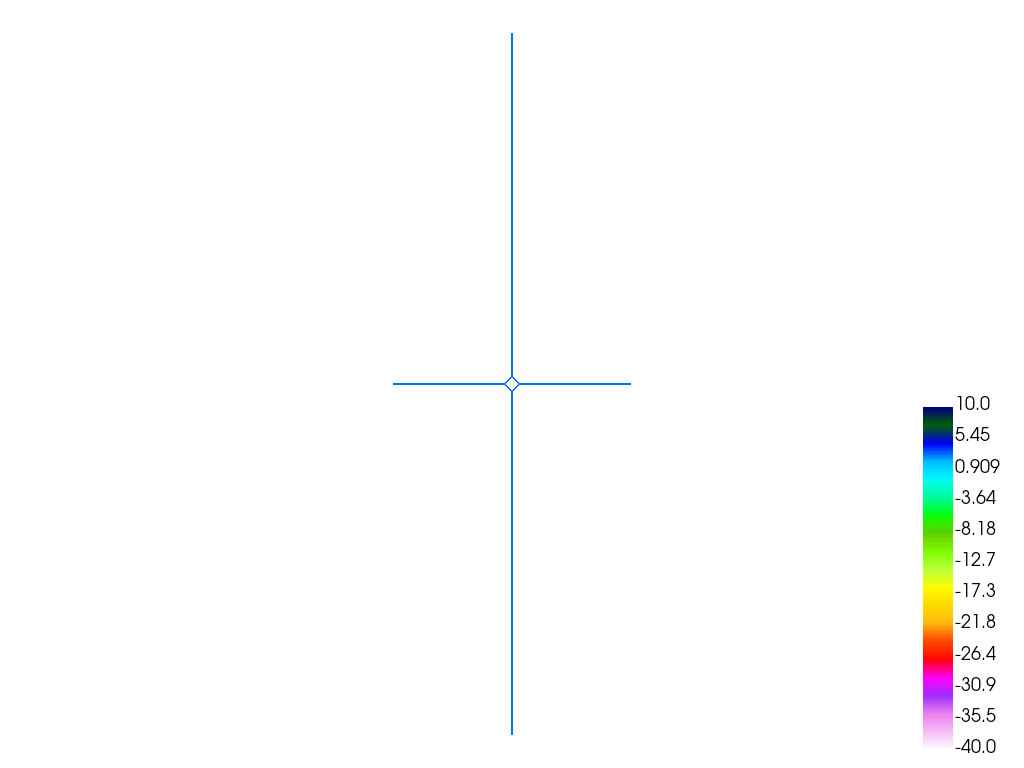

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


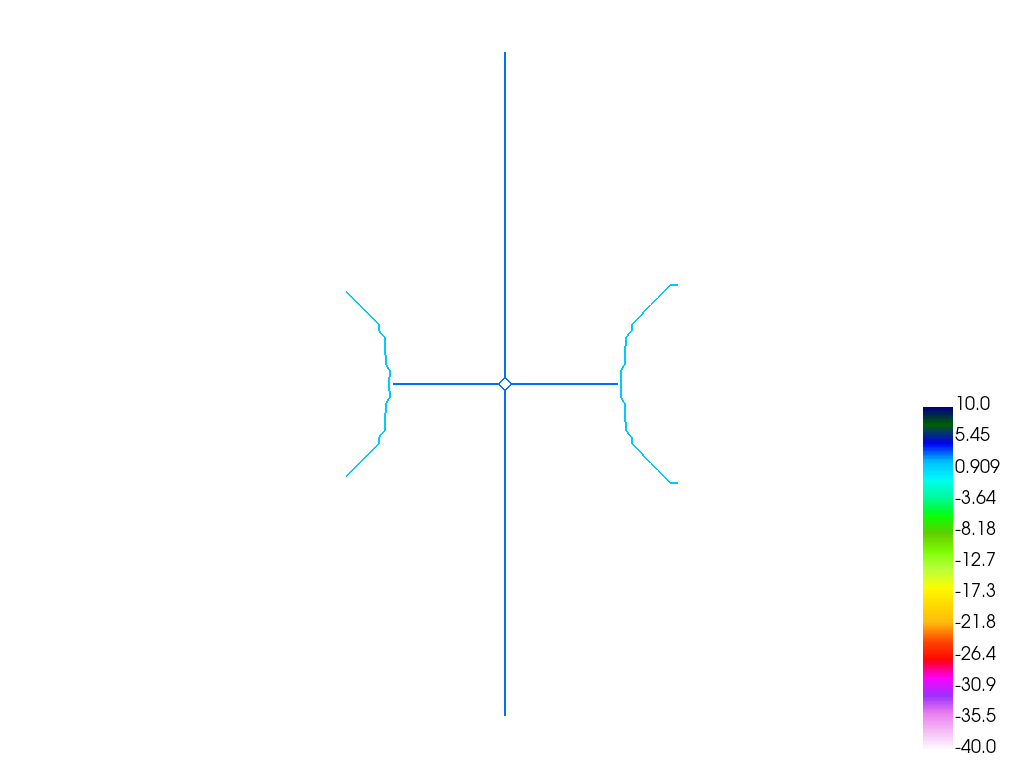

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


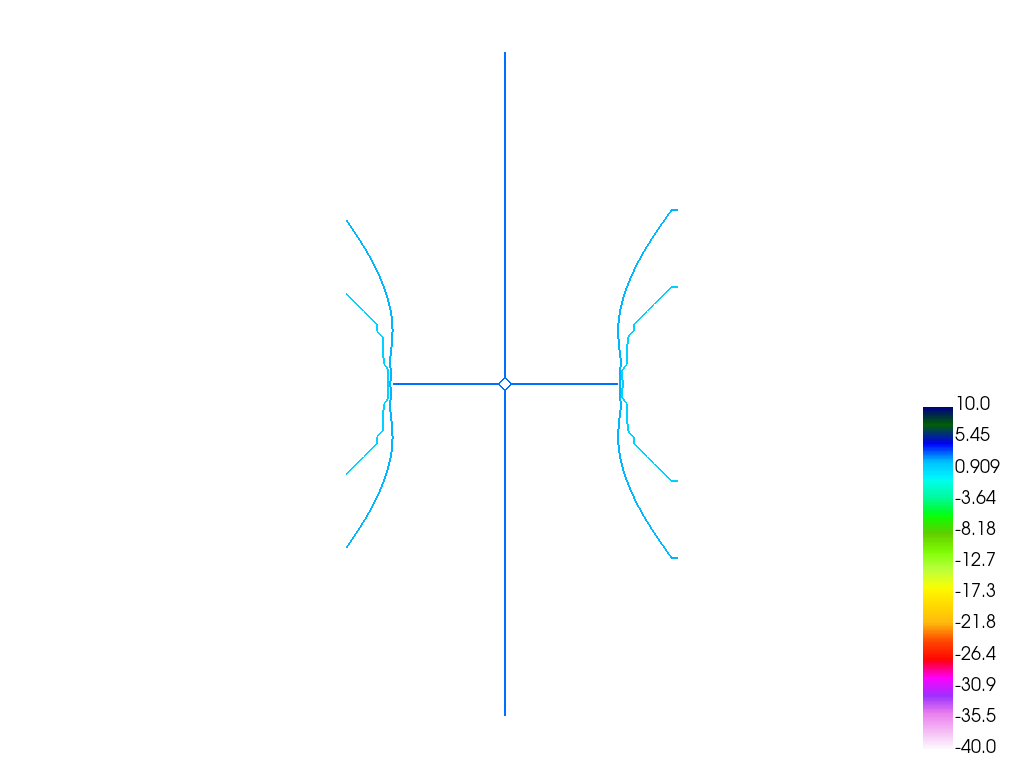

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


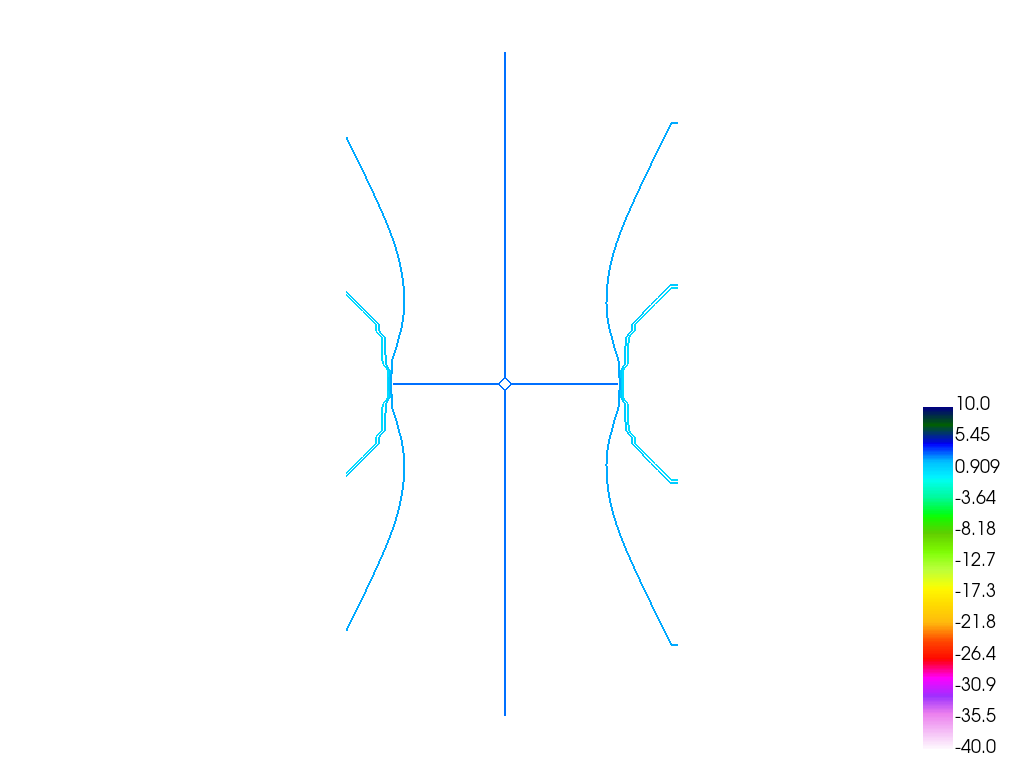

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


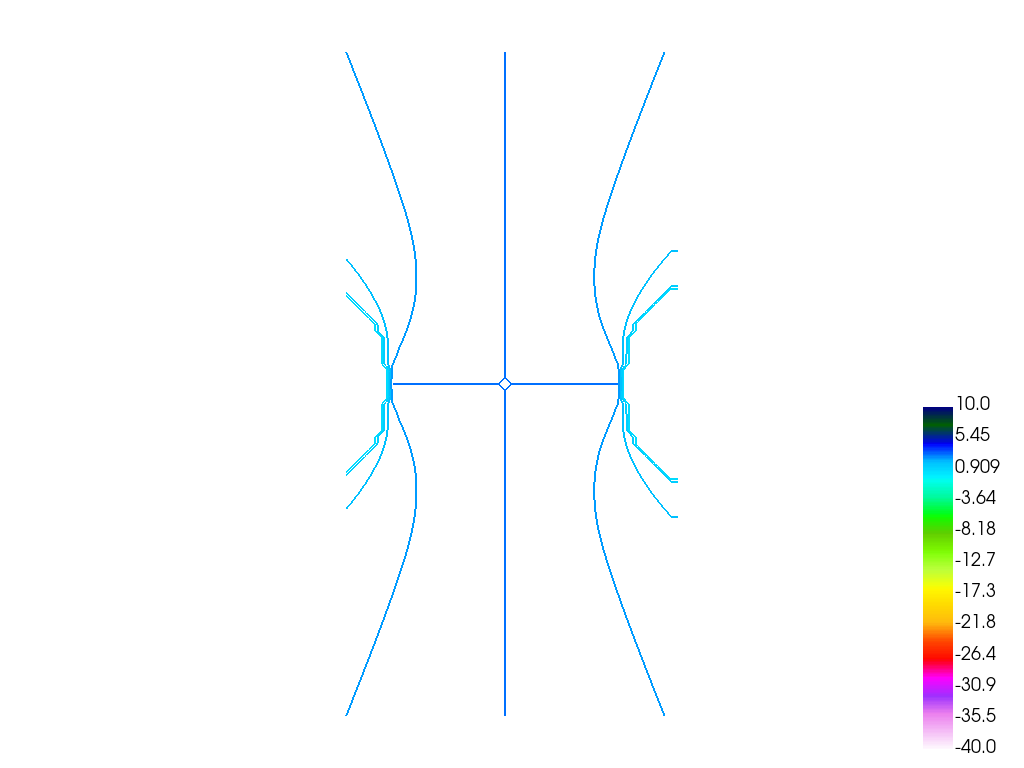

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


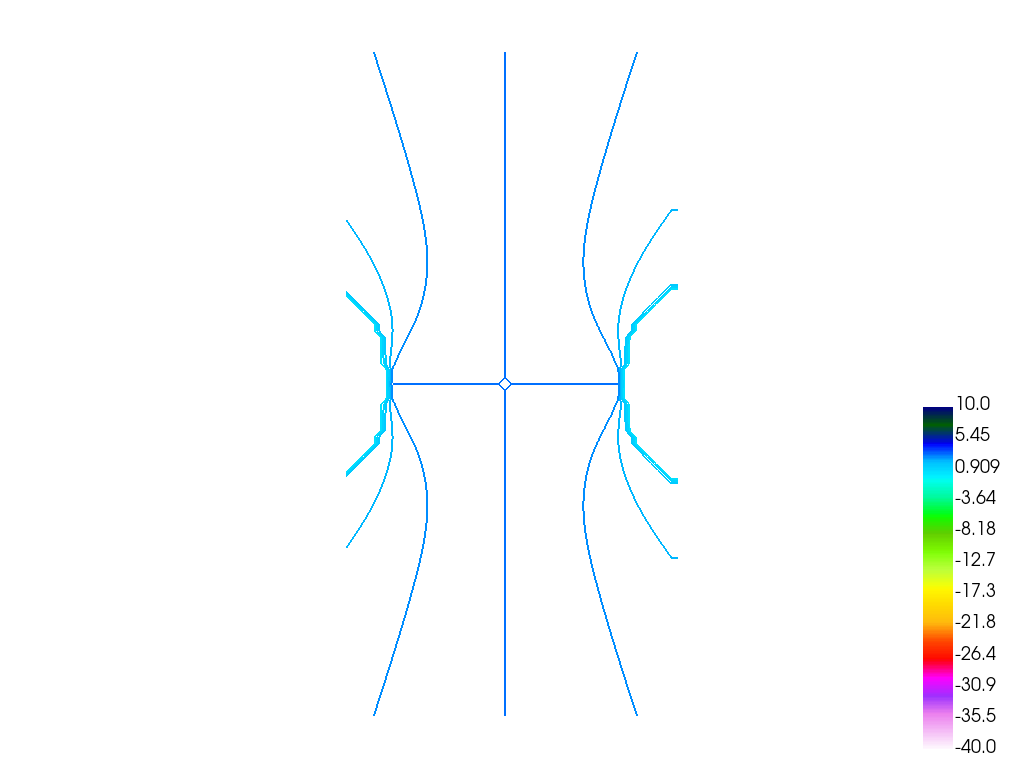

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


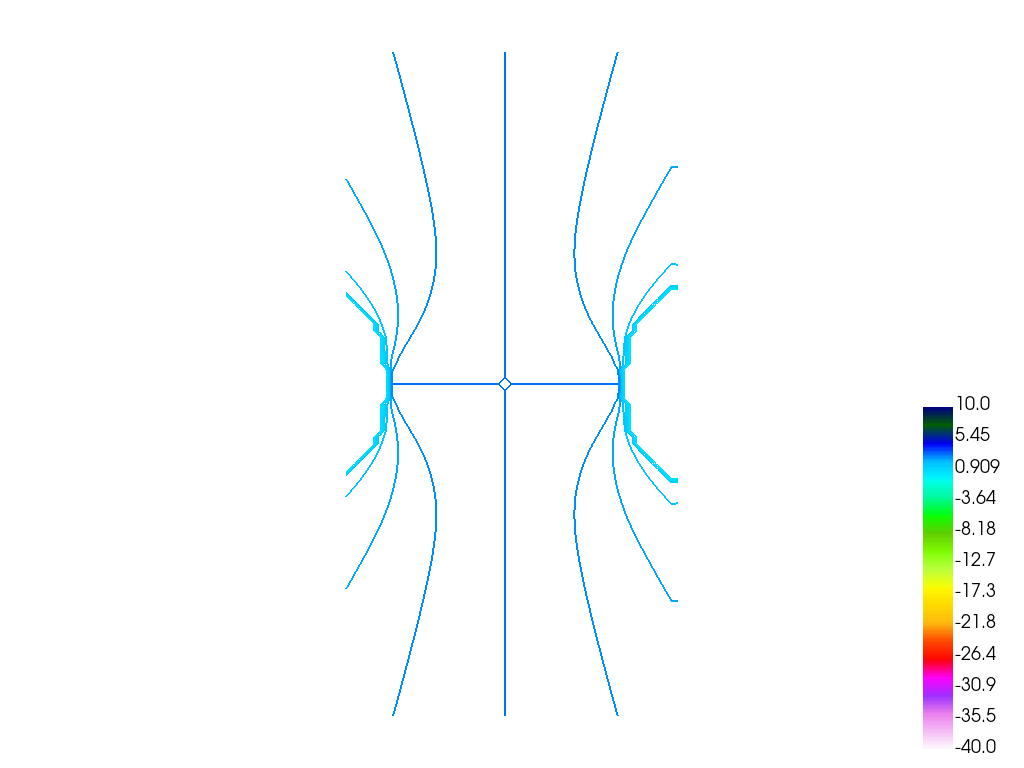

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


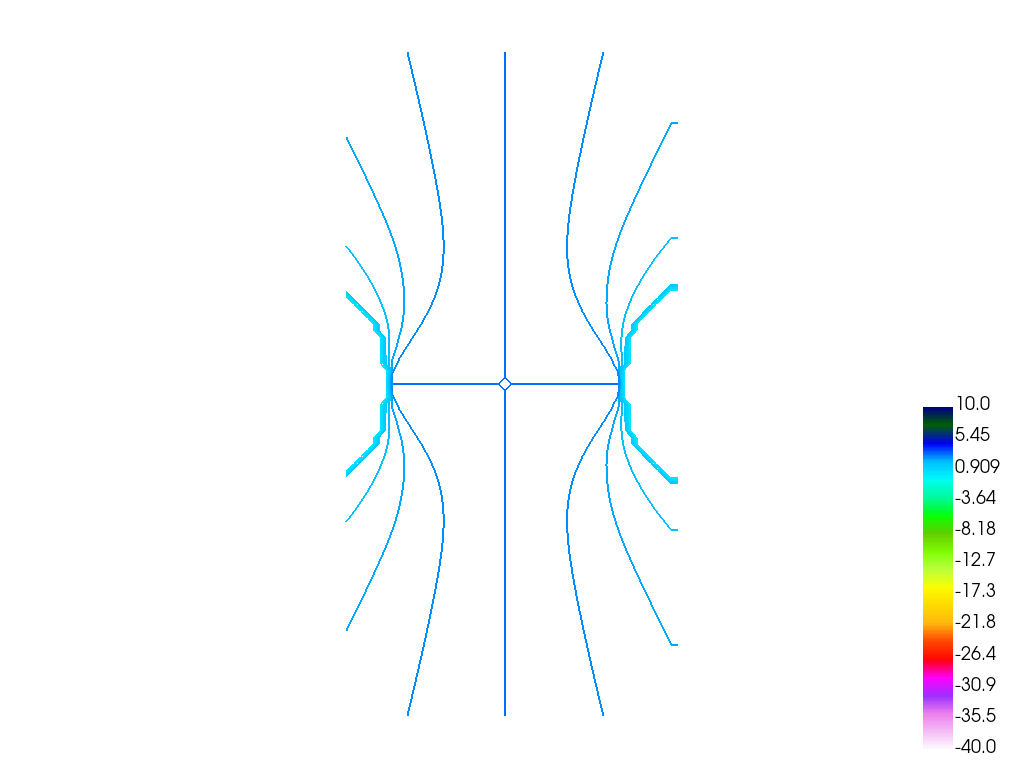

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


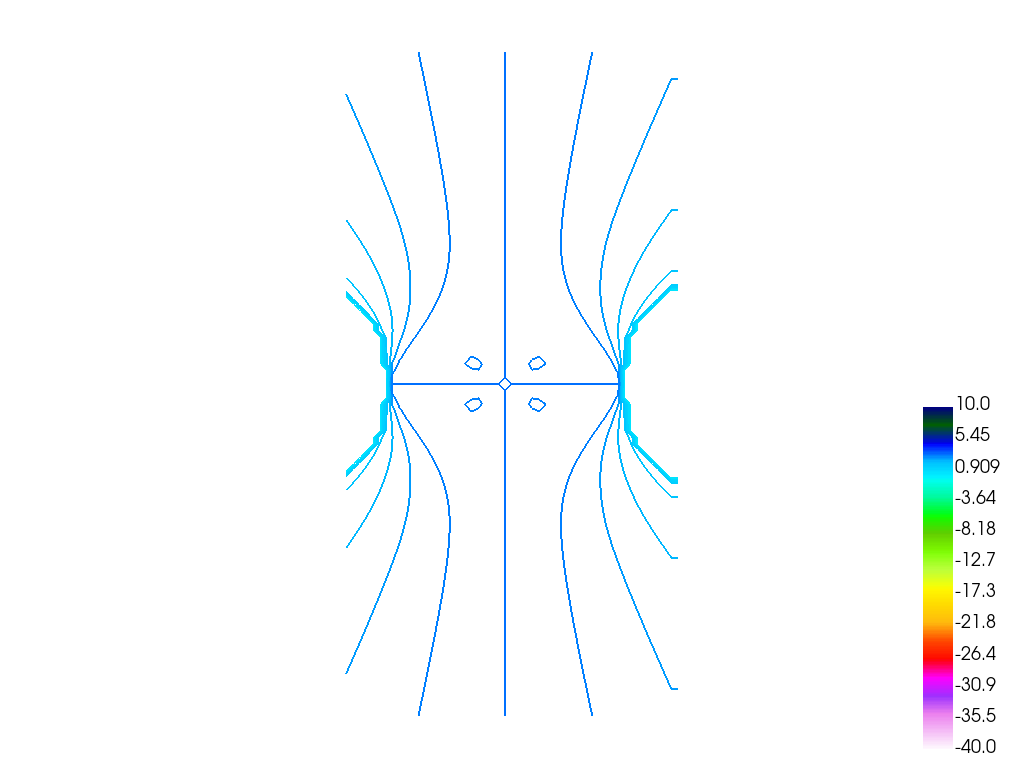

In [24]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# We define the values that will represent the isosurfaces
valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# We iterate through each isosurface value.
for i, valor in enumerate(valores_isosurfaces):
    # We perform a slice along the x-axis of the 3D mesh.
    sliced = grid.slice(normal='y')
     # We get the vectors of the points in the sliced mesh
    vectors = sliced.point_data['vectors']
    
    # We calculate the azimuthal angle (angle in the horizontal plane) and the elevation angle 
    # (angle from the horizontal plane) of the vectors
    azimuth = np.arctan2(vectors[:,1], vectors[:,0])
    elevation = np.arctan2(np.sqrt(vectors[:,0]**2 + vectors[:,1]**2), vectors[:,2])

    # Assign the direction data (azimuth and elevation) to the sliced mesh
    sliced['azimuth'] = azimuth
    sliced['elevation'] = elevation
    
    arrows = pv.Arrow()

    # we use the glyph function to create graphical representations of the oriented and scaled vectors (arrows) 
    # according to elevation
    glyphs = sliced.glyph(orient='vectors', scale='elevation', factor=0.126, geom=arrows)
    contornos = sliced.contour(isosurfaces=valor, scalars='elevation')


    # Display the sliced mesh, coloured by the direction of the vectors
    p = pv.Plotter()
    
    sargs = dict(
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H',
        color = 'k')
    
    if 'color_orientation' in darg:
        del darg['color_orientation']
    
    p.add_mesh(contornos, show_scalar_bar=False, line_width=2,**darg, clim=(min_color_value, max_color_value))
    p.camera_position = (0,1,0)
    p.add_scalar_bar(**sargs)
    nombre_archivo = f"grafico_contorno_Y_Elevation {i+1}.png"  
    p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
    p.set_background('w')
    
    p.show()
    ruta_imagen = os.path.join(nombre_carpeta_vti, nombre_archivo) 
    os.replace(nombre_archivo, ruta_imagen)
    imagenes_generadas.append(ruta_imagen)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


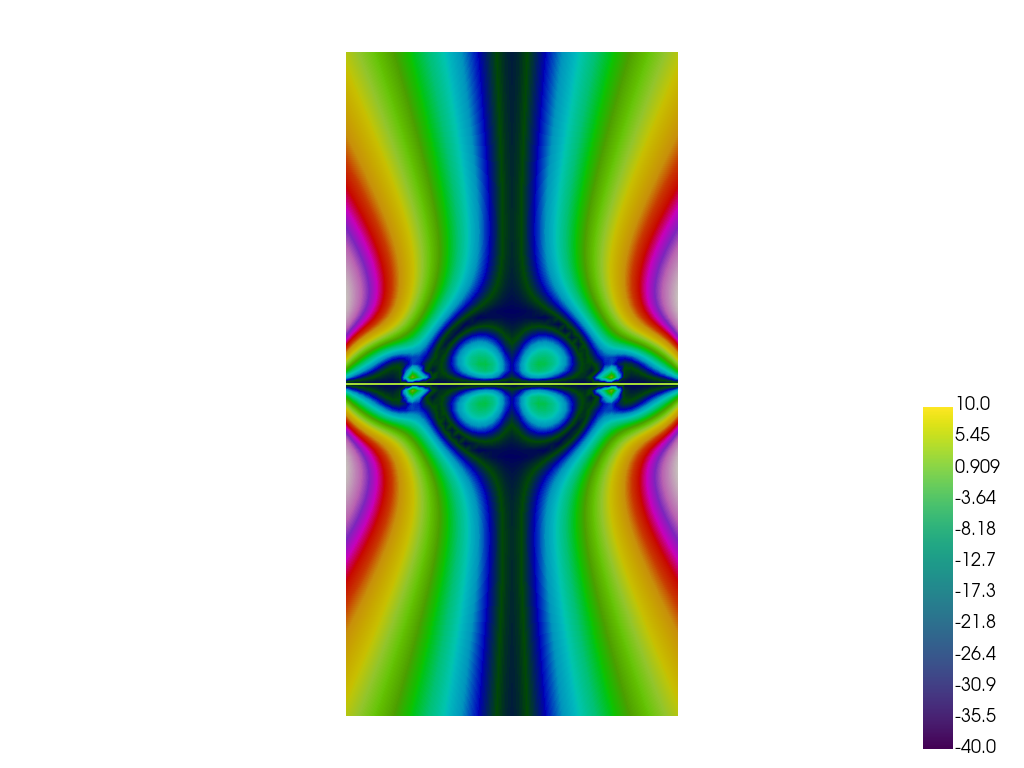

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


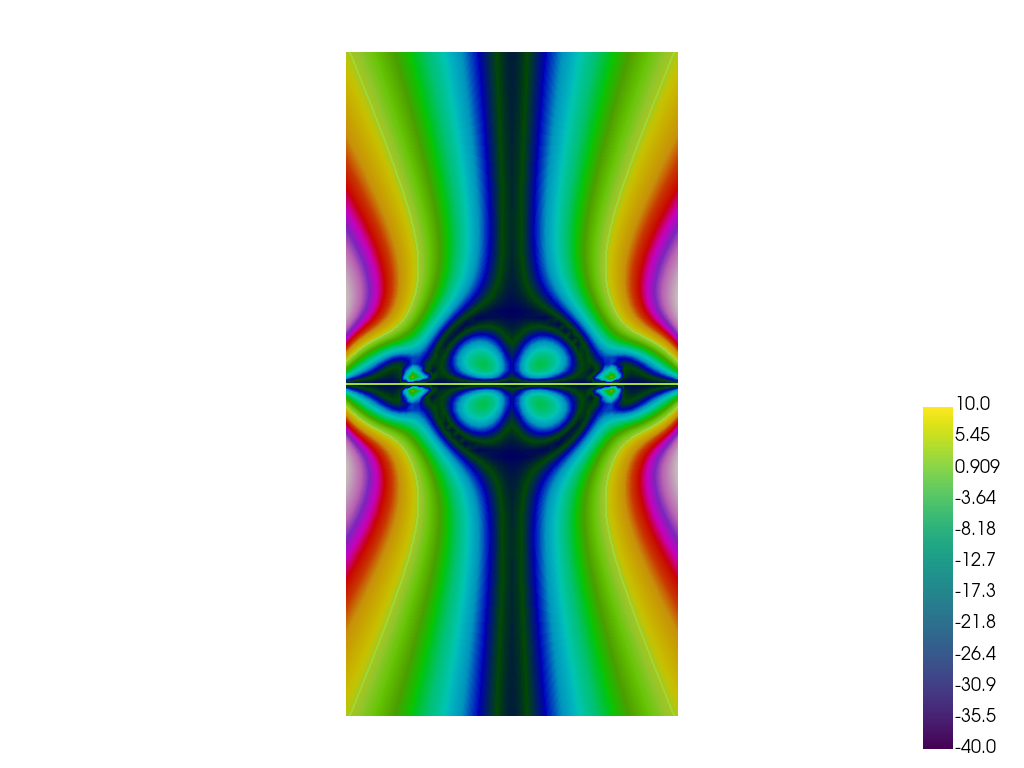

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


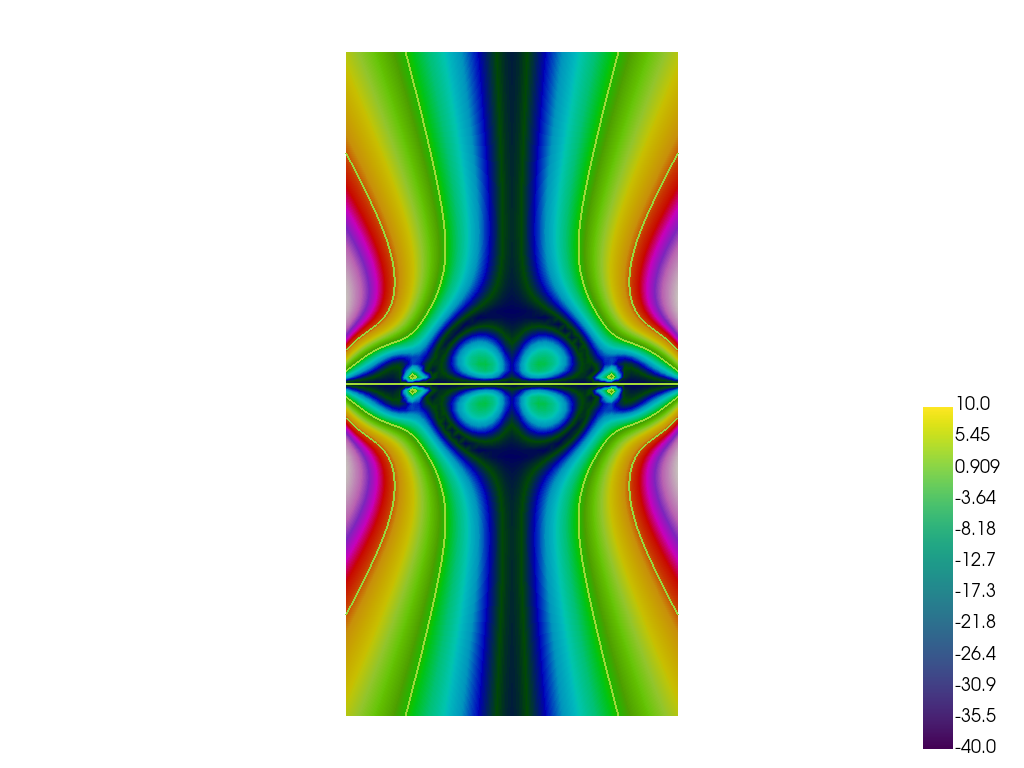

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


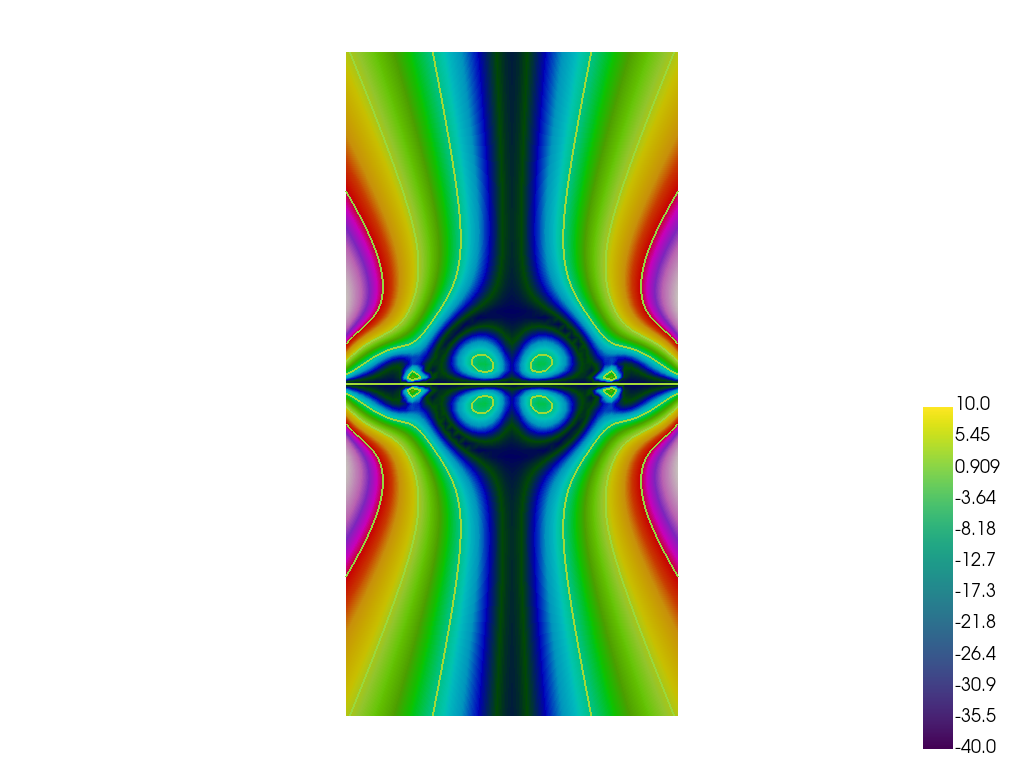

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


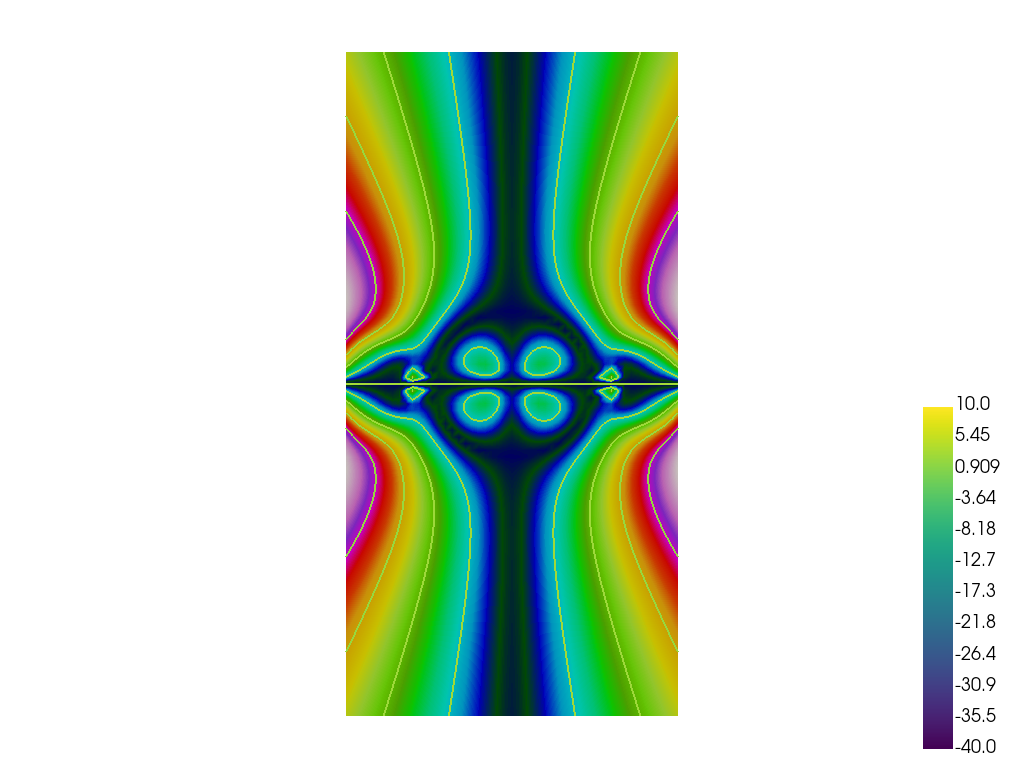

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


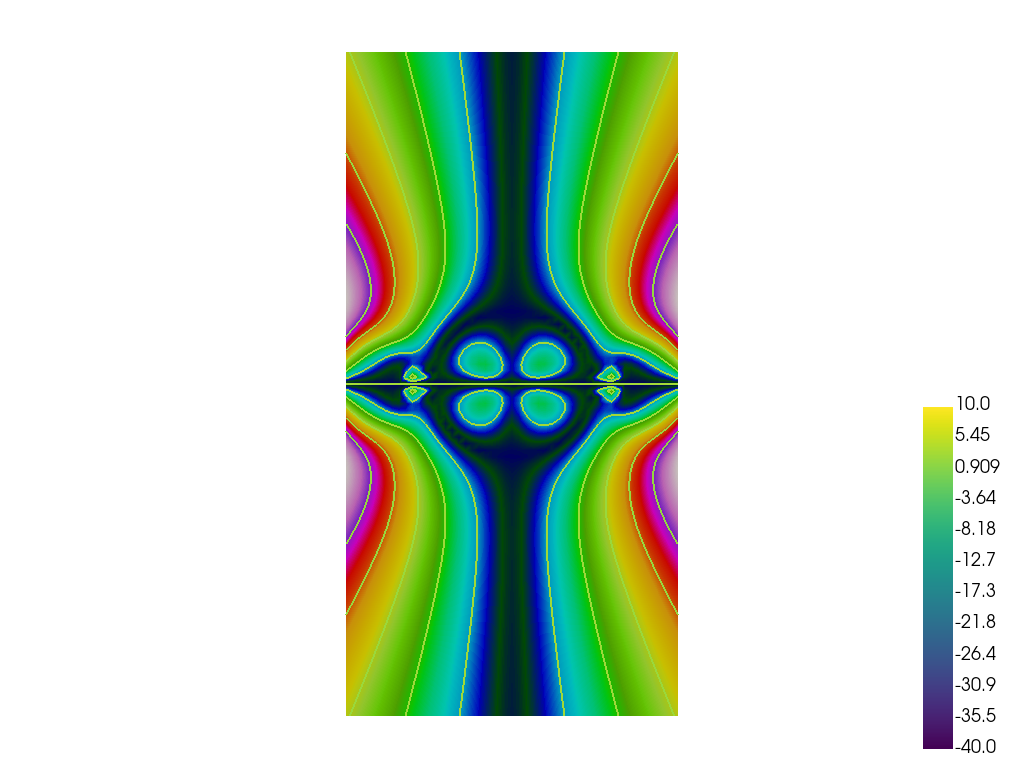

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


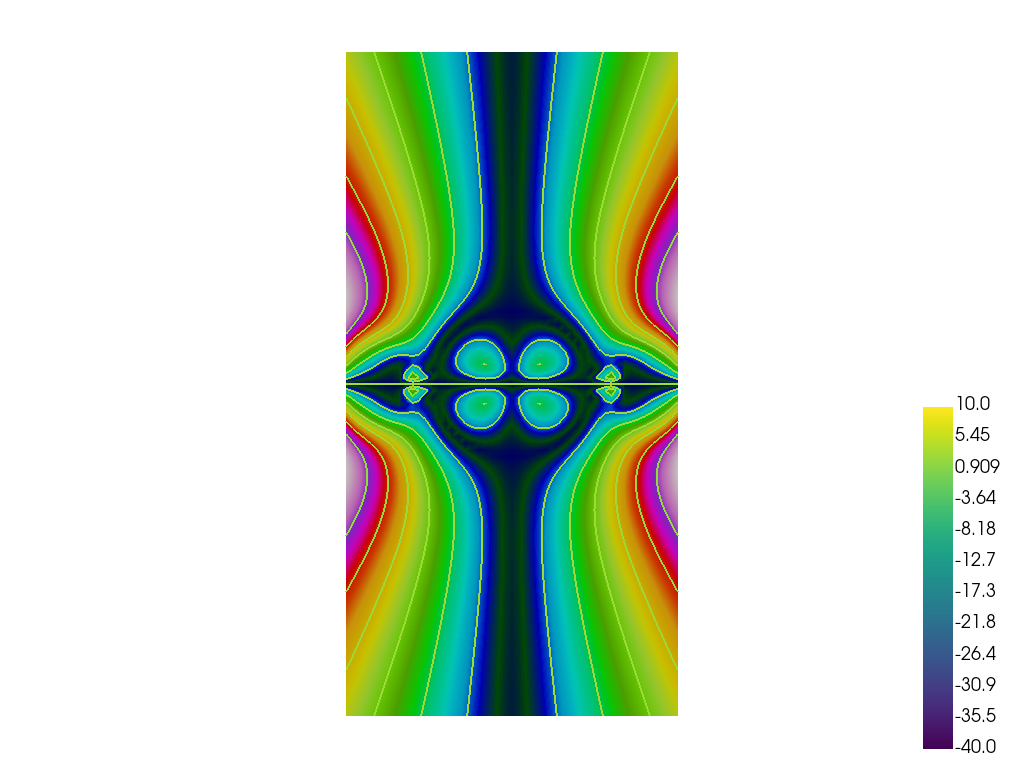

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


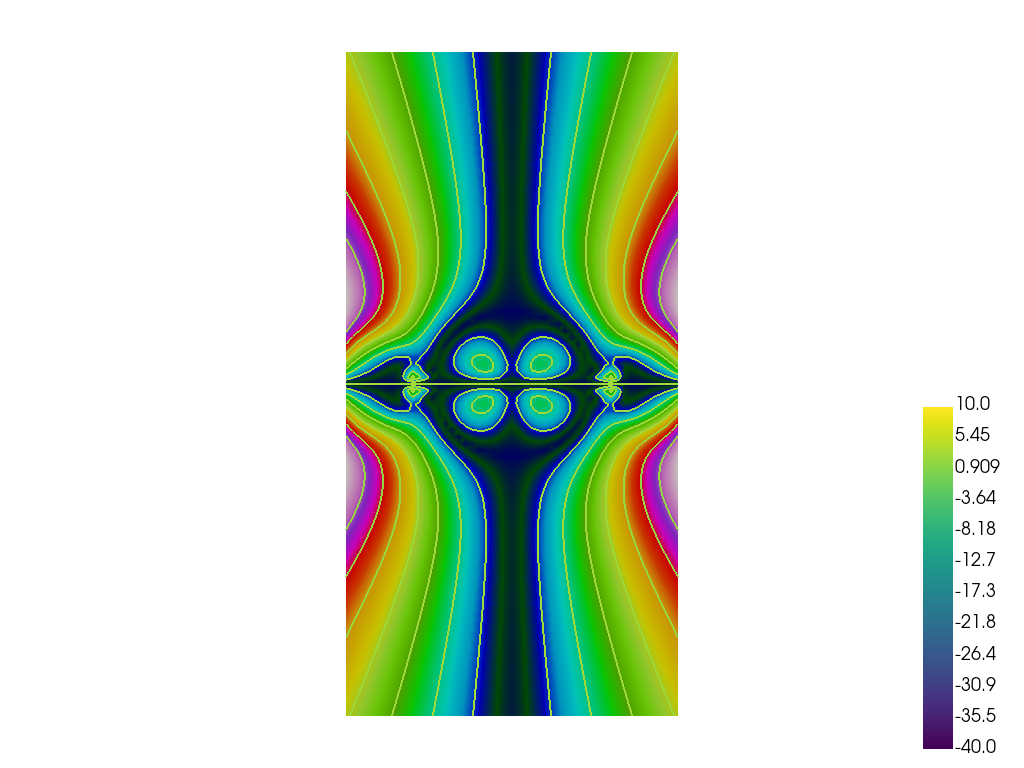

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


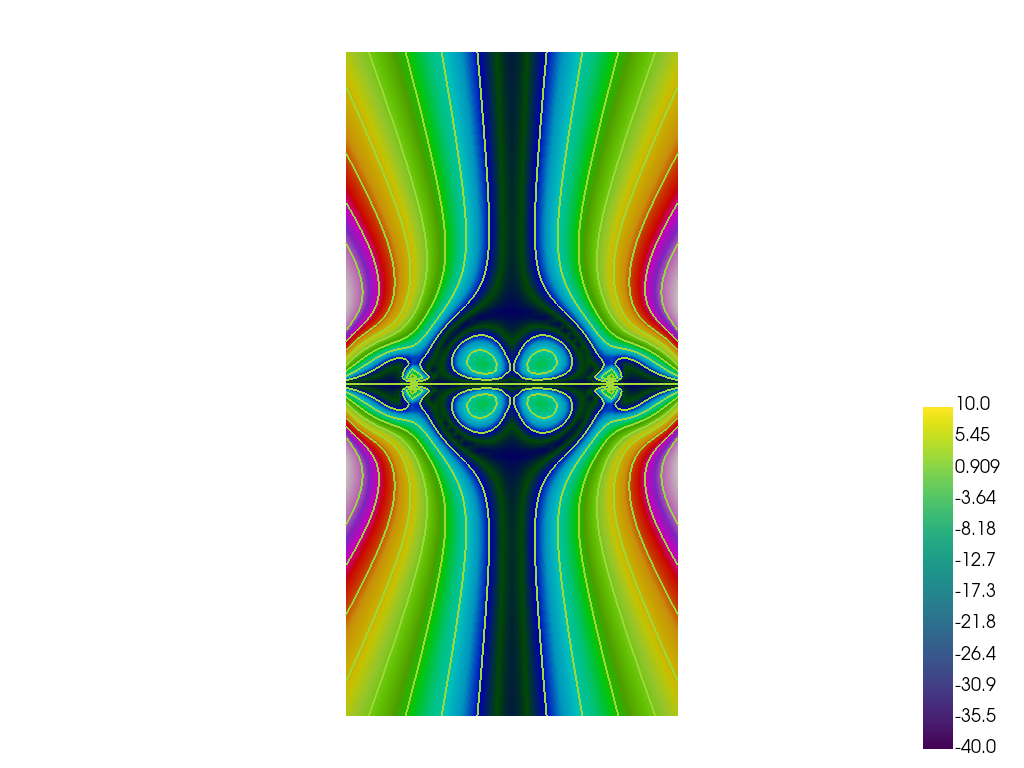

In [25]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i, valor in enumerate(valores_isosurfaces):
    sliced = grid.slice(normal='x')
    vectors = sliced.point_data['vectors']
    
    # Calculates azimuthal and elevation angles
    azimuth = np.arctan2(vectors[:,1], vectors[:,0])
    elevation = np.arctan2(np.sqrt(vectors[:,0]**2 + vectors[:,1]**2), vectors[:,2])

    # Assigns the address data to the cut mesh
    sliced['azimuth'] = azimuth
    sliced['elevation'] = elevation
    
    arrows = pv.Arrow()

    # Apply the glyph function to visualise the vectors
    glyphs = sliced.glyph(orient='vectors', scale='elevation', factor=0.126, geom=arrows)
    contornos = sliced.contour(isosurfaces=valor, scalars='elevation')


    # Visualise the cut mesh, coloured by the direction of the vectors.
    p = pv.Plotter()
    
    sargs = dict(
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H',
        color = 'k')
    
    if 'color_orientation' in darg:
        del darg['color_orientation']
    
    p.add_mesh(sliced, **darg, scalars='elevation',show_scalar_bar=False)
    p.add_mesh(contornos, show_scalar_bar=False, line_width=2, clim=(min_color_value, max_color_value))
    p.camera_position = (1,0,0)
    p.set_background('w')
    p.add_scalar_bar(**sargs)
    nombre_archivo = f"grafico_slice_contorno_X_Elevation {i+1}.png"  
    p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
    
    p.set_background('w')
    p.show()
    ruta_imagen = os.path.join(nombre_carpeta_vti, nombre_archivo) 
    os.replace(nombre_archivo, ruta_imagen)
    imagenes_generadas.append(ruta_imagen)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


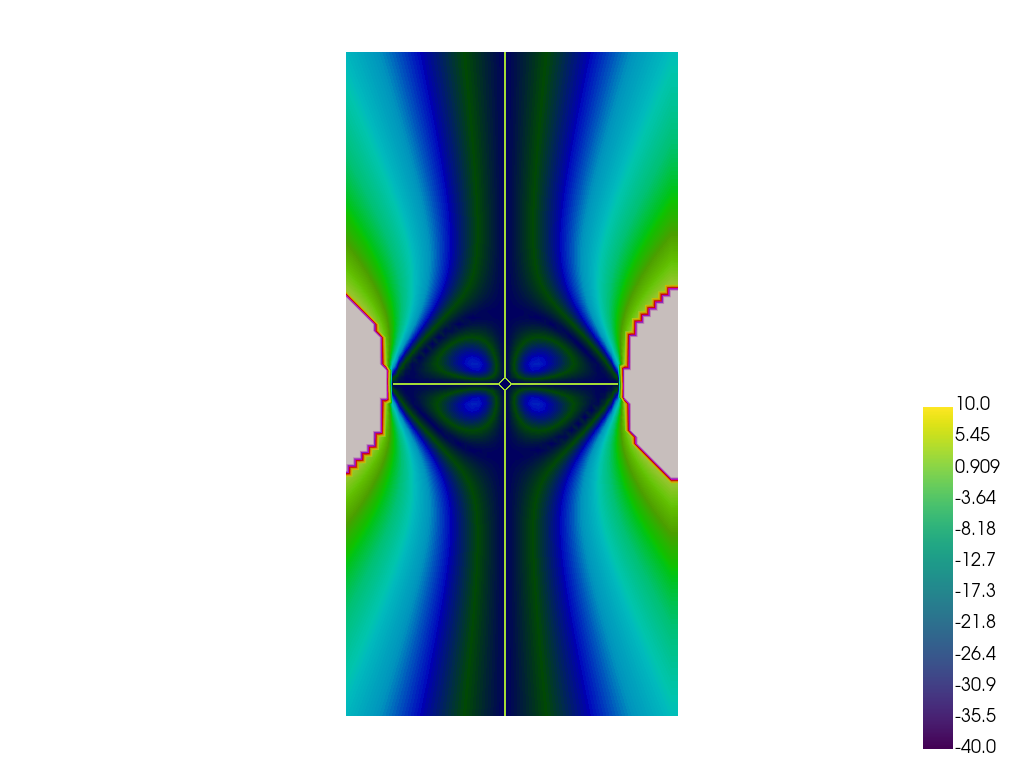

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


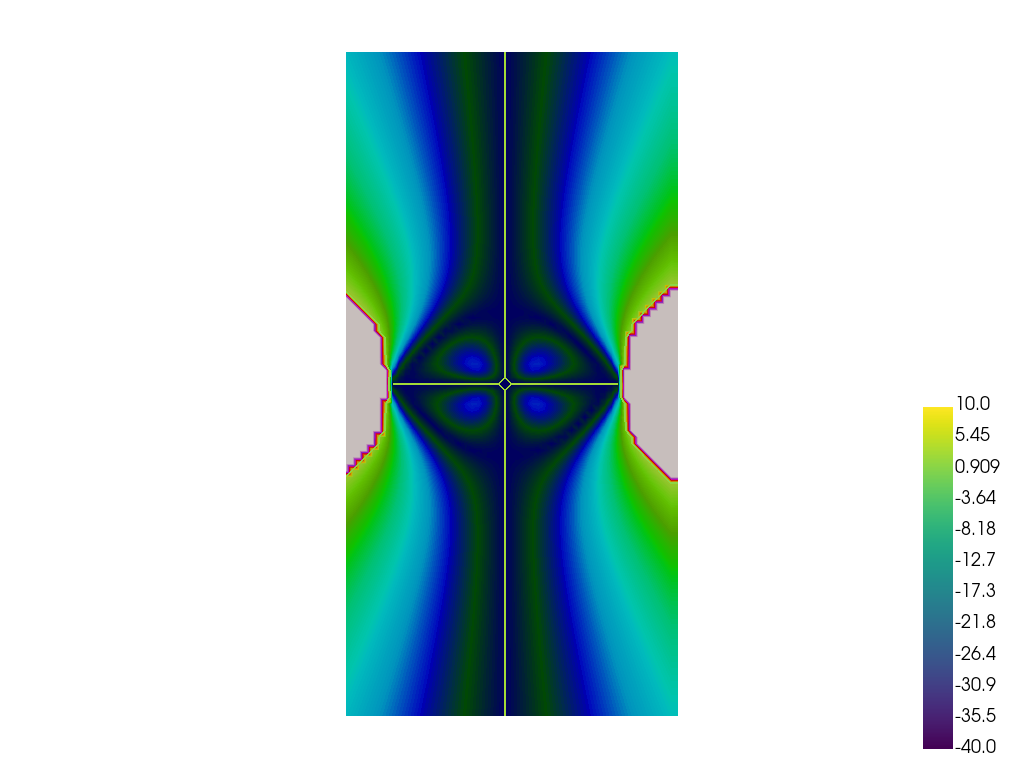

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


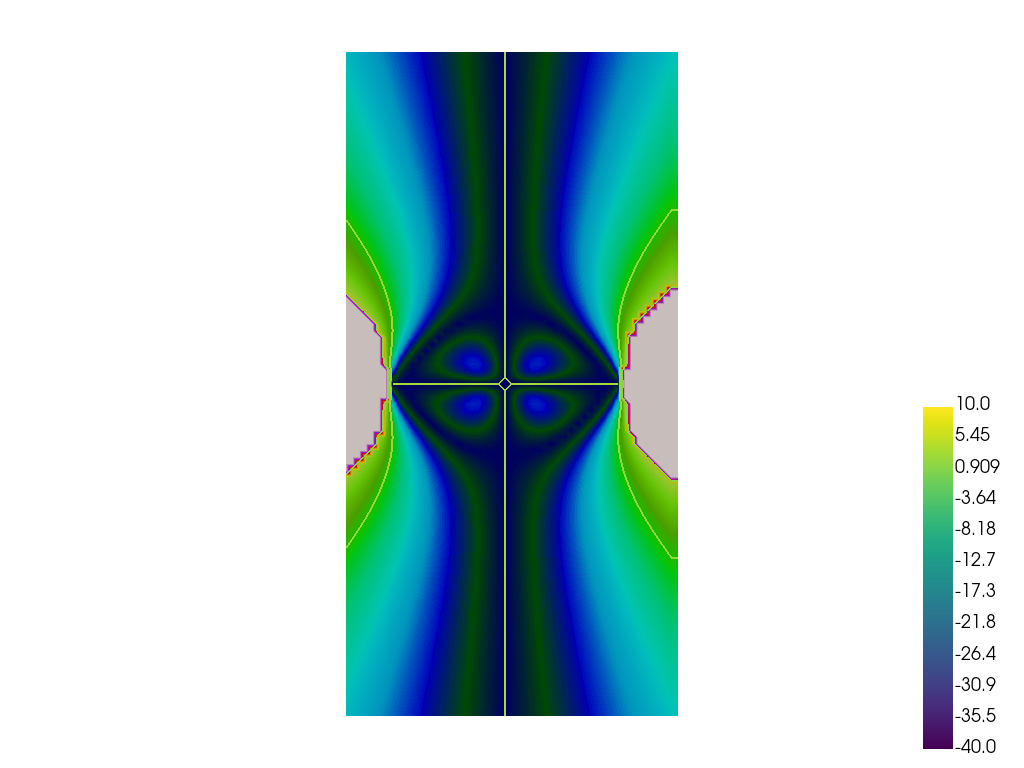

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


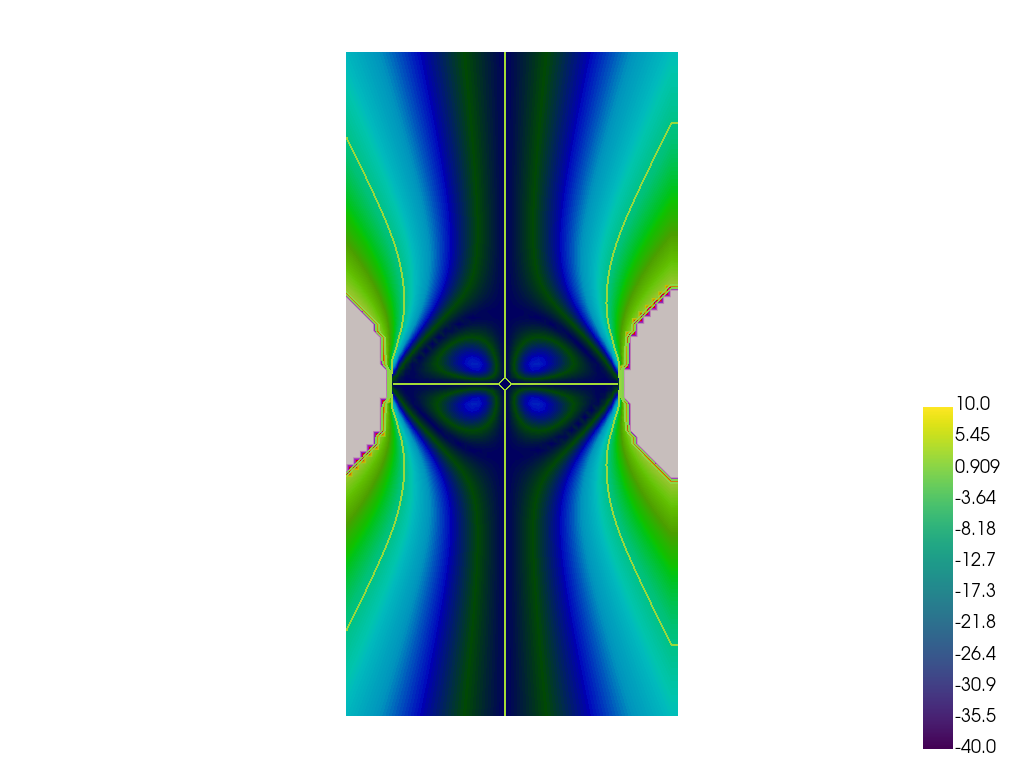

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


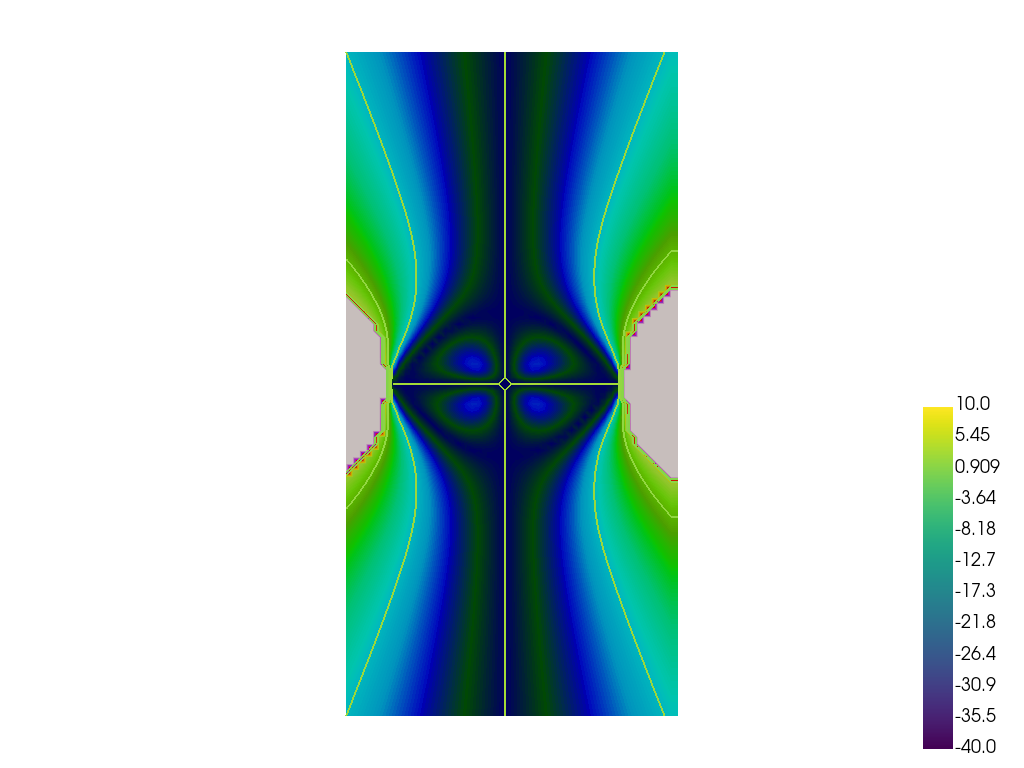

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


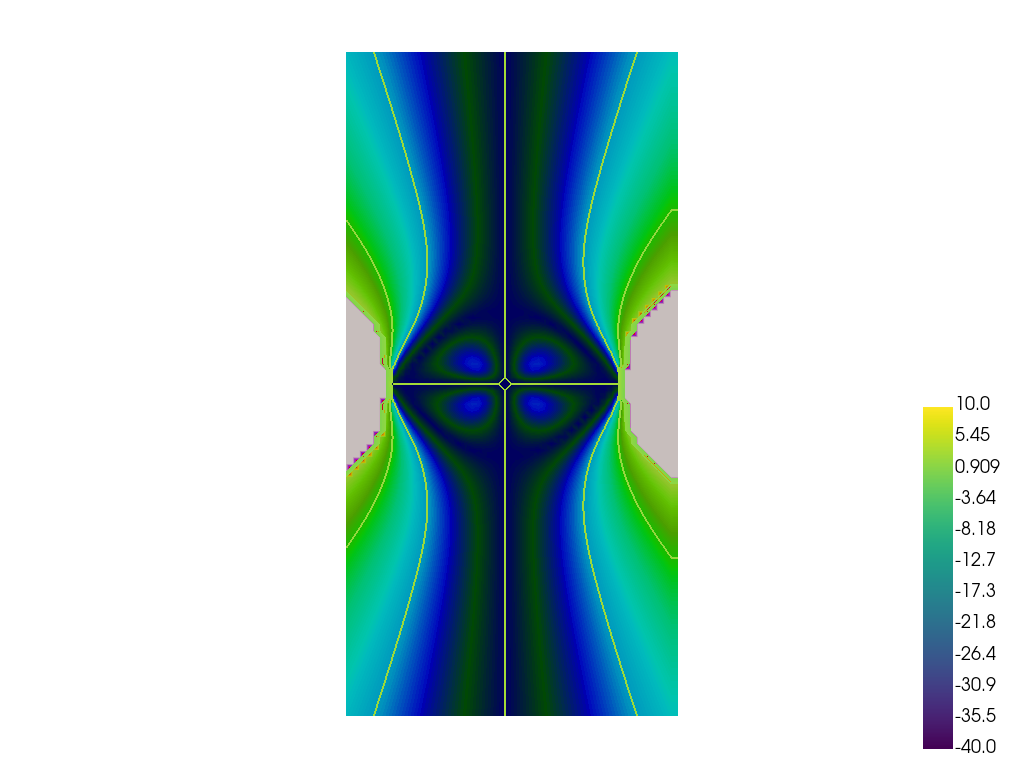

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


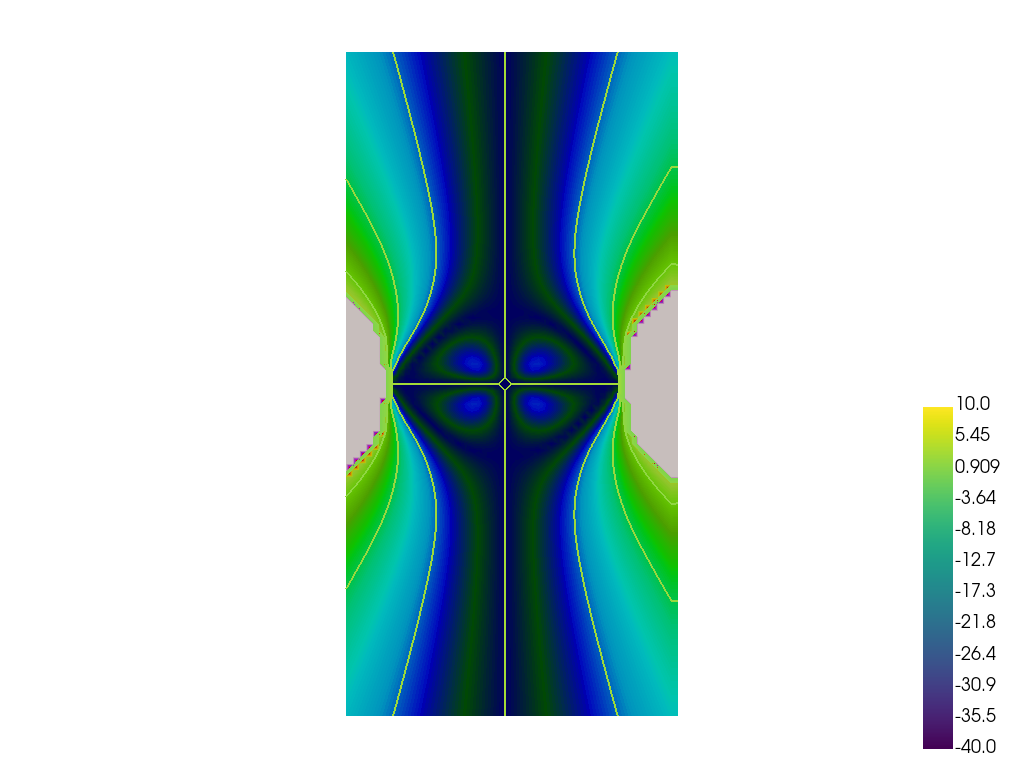

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


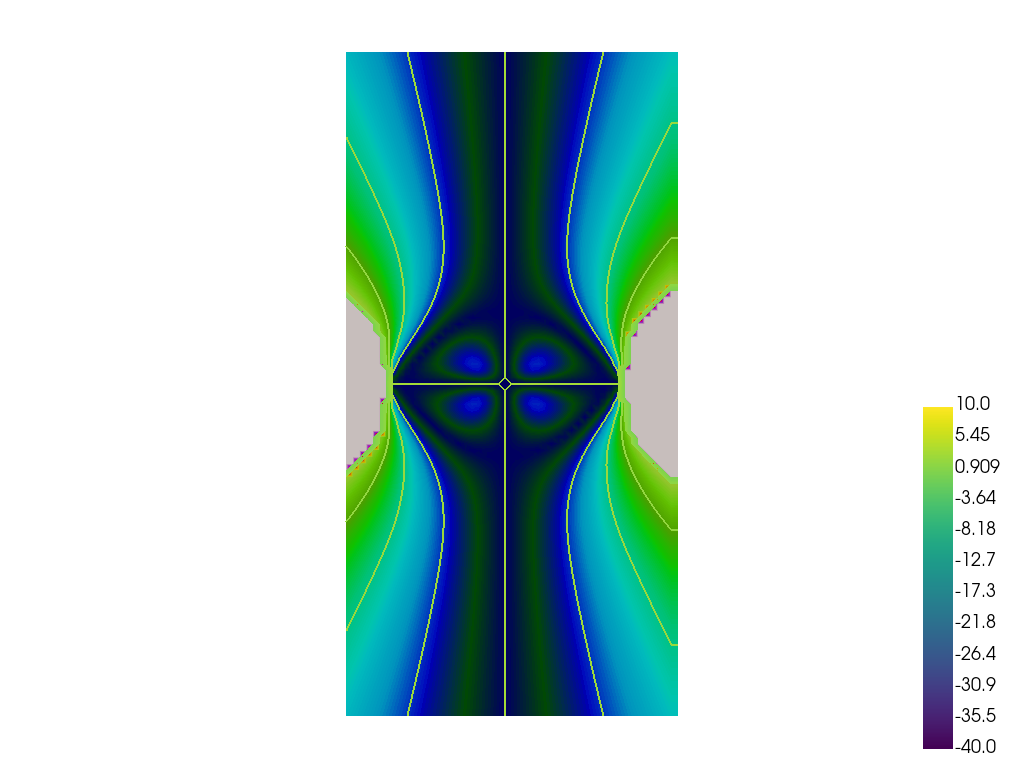

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


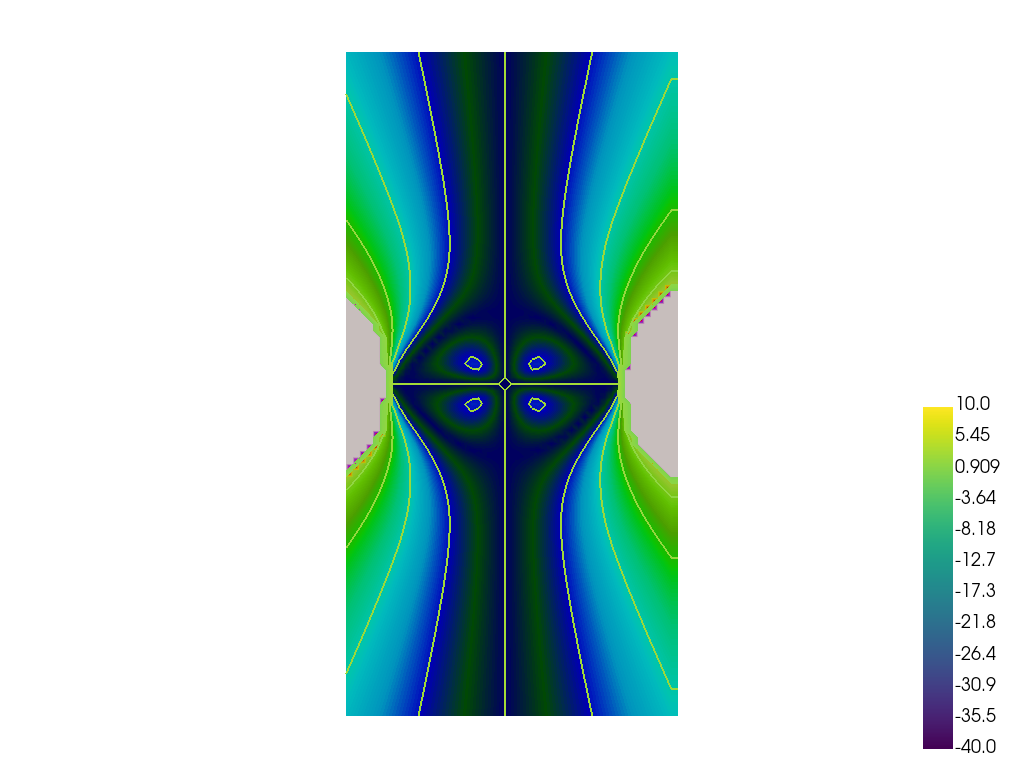

In [26]:
# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i, valor in enumerate(valores_isosurfaces):
    sliced = grid.slice(normal='y')
    vectors = sliced.point_data['vectors']
    
    # Calculates azimuthal and elevation angles
    azimuth = np.arctan2(vectors[:,1], vectors[:,0])
    elevation = np.arctan2(np.sqrt(vectors[:,0]**2 + vectors[:,1]**2), vectors[:,2])

    # Assigns the address data to the cut mesh
    sliced['azimuth'] = azimuth
    sliced['elevation'] = elevation
    
    arrows = pv.Arrow()

    # Apply the glyph function to visualise the vectors
    glyphs = sliced.glyph(orient='vectors', scale='elevation', factor=0.126, geom=arrows)
    contornos = sliced.contour(isosurfaces=valor, scalars='elevation')


    # Visualise the cut mesh, coloured by the direction of the vectors.
    p = pv.Plotter()
    
    sargs = dict(
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H',
        color = 'k')
    
    if 'color_orientation' in darg:
        del darg['color_orientation']
    
    p.add_mesh(sliced, **darg, scalars='elevation',show_scalar_bar=False)
    p.add_mesh(contornos, show_scalar_bar=False, line_width=2, clim=(min_color_value, max_color_value))
    p.camera_position = (0,1,0)
    p.set_background('w')
    p.add_scalar_bar(**sargs)
    nombre_archivo = f"grafico_slice_contorno_Y_Elevation {i+1}.png"  
    p.screenshot(nombre_archivo, transparent_background=False, window_size=[1920, 1080])
    
    
    p.show()
    ruta_imagen = os.path.join(nombre_carpeta_vti, nombre_archivo) 
    os.replace(nombre_archivo, ruta_imagen)
    imagenes_generadas.append(ruta_imagen)

## Interactive chart

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


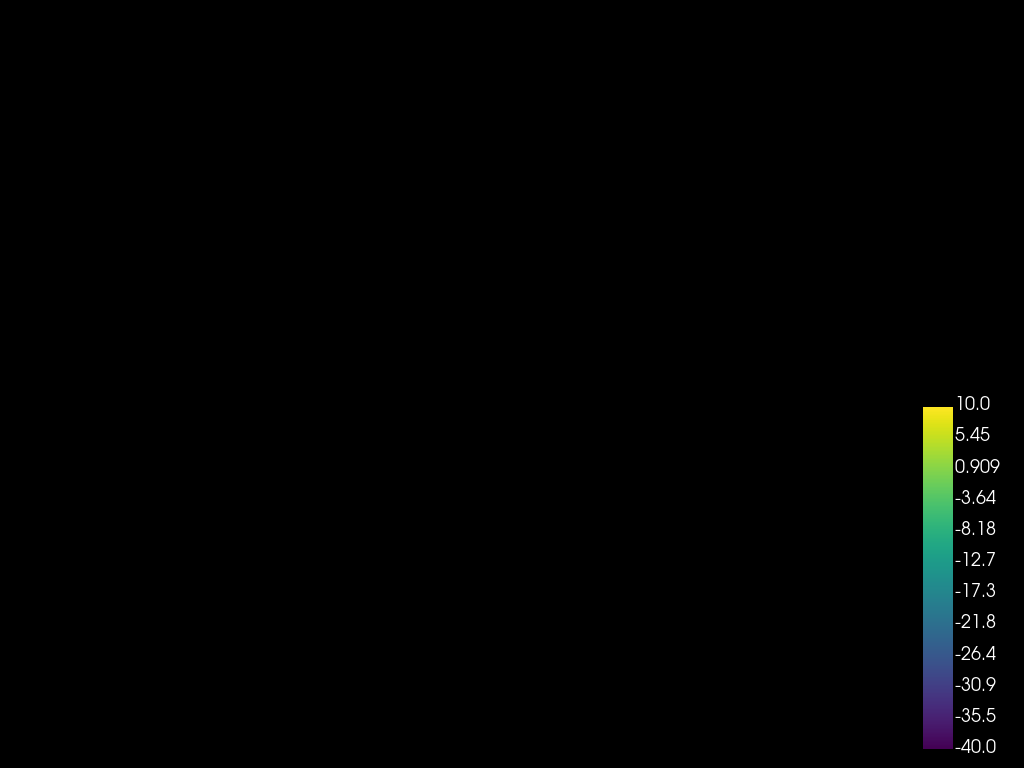

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


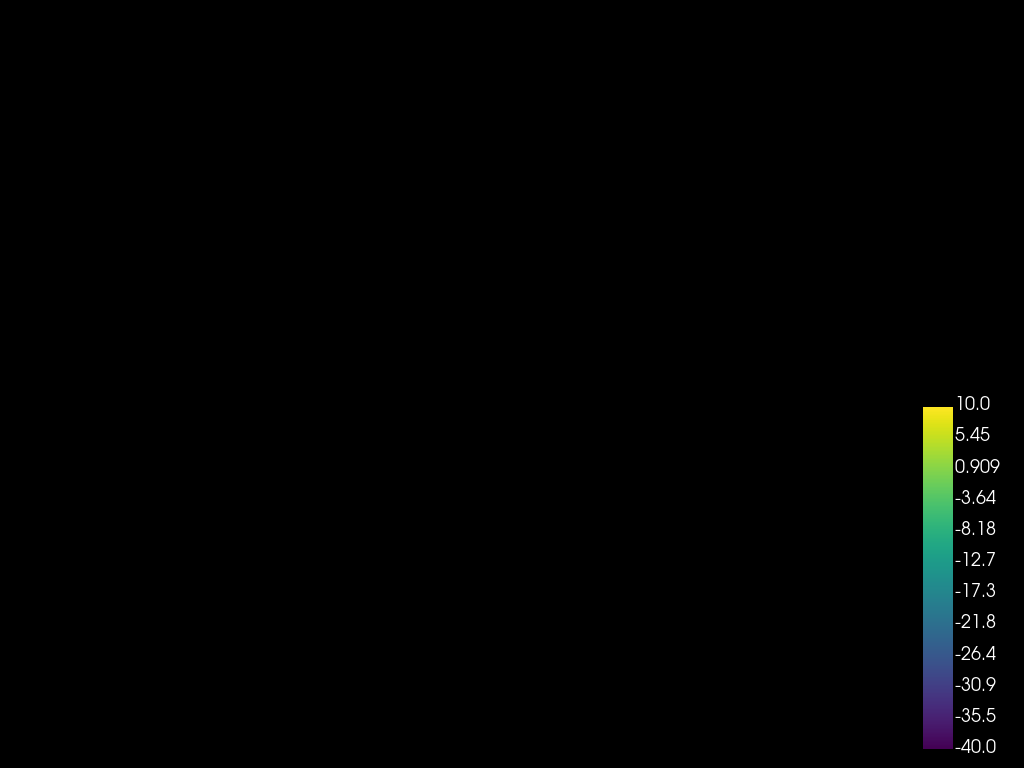

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


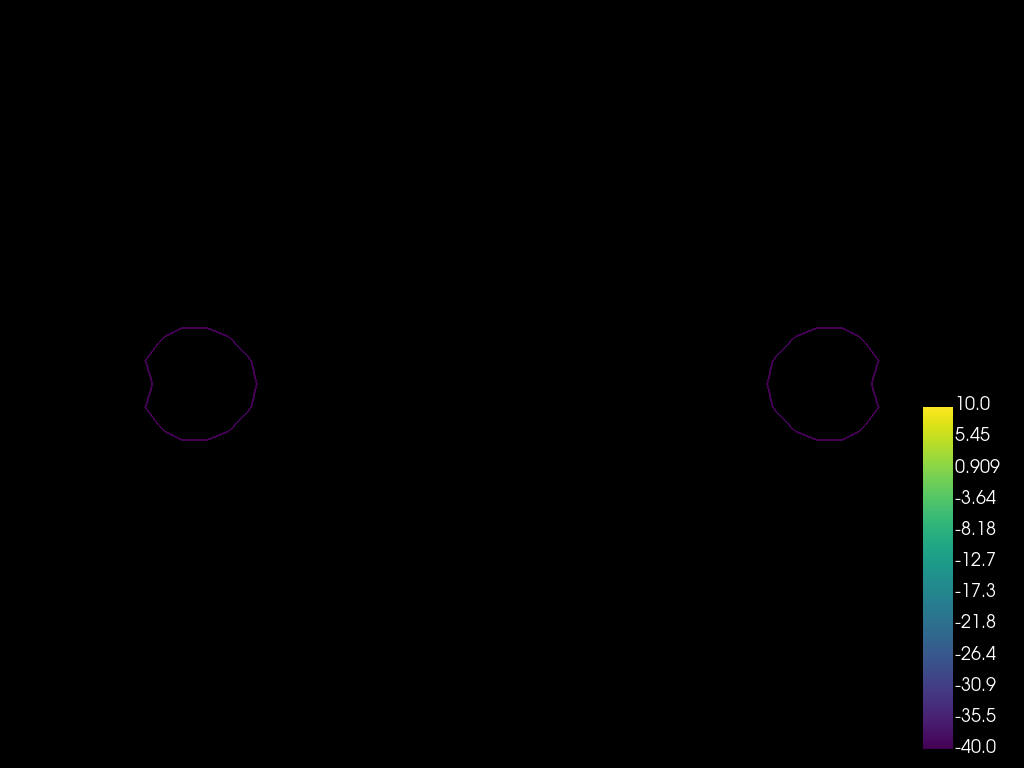

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


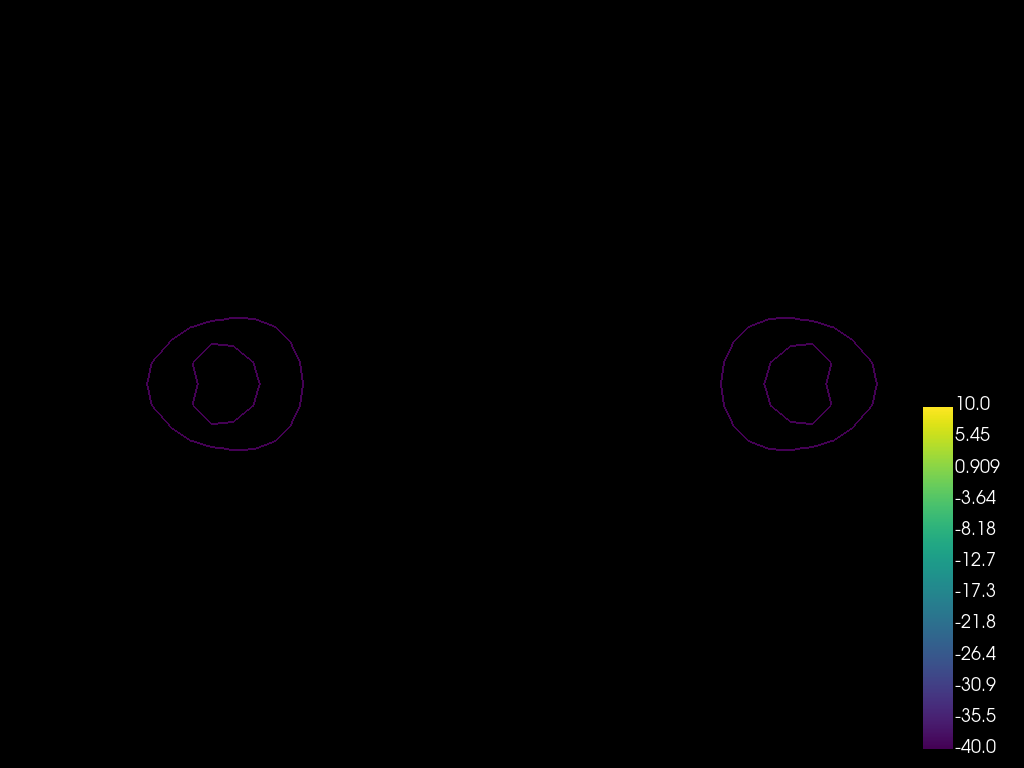

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


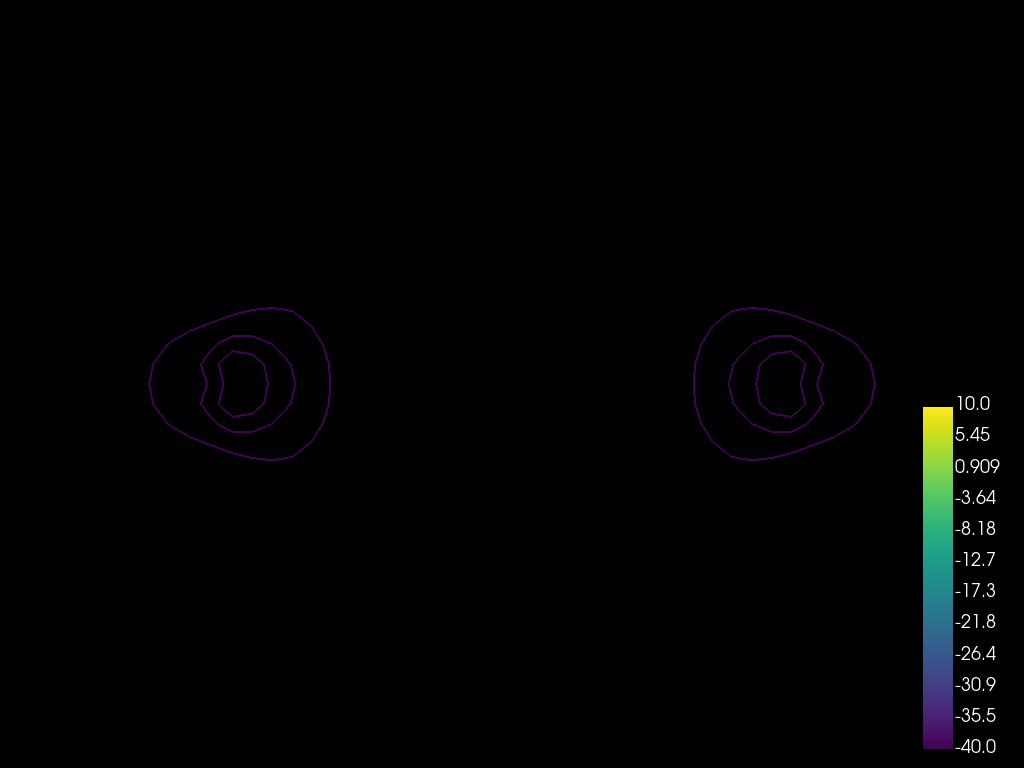

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


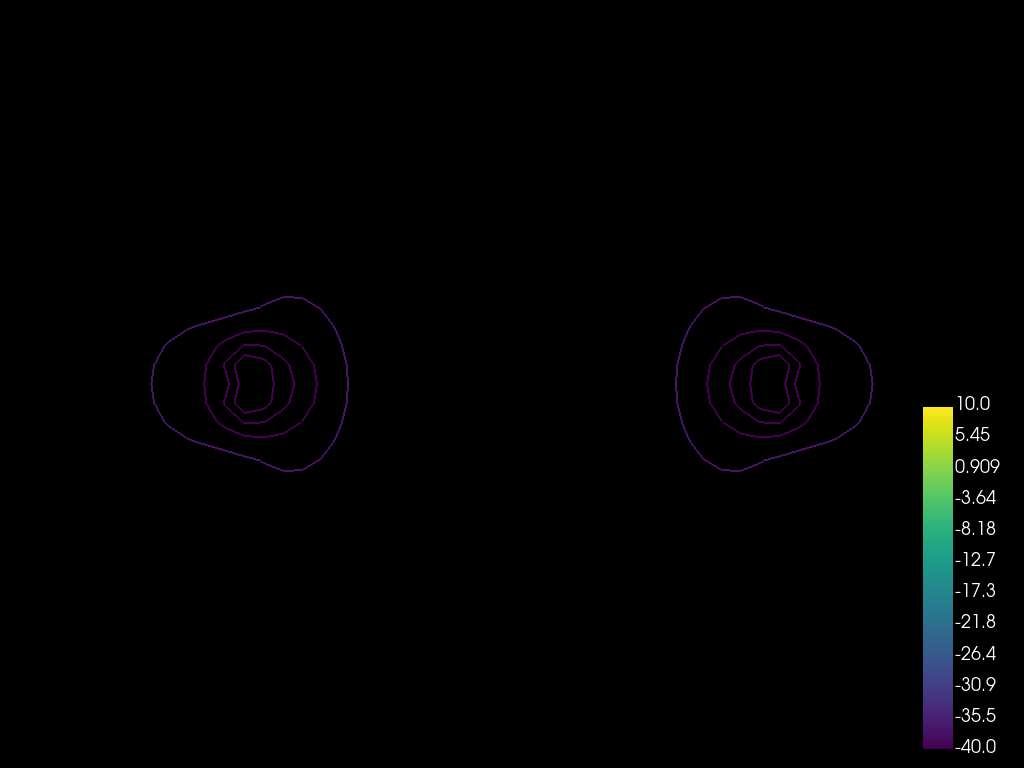

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


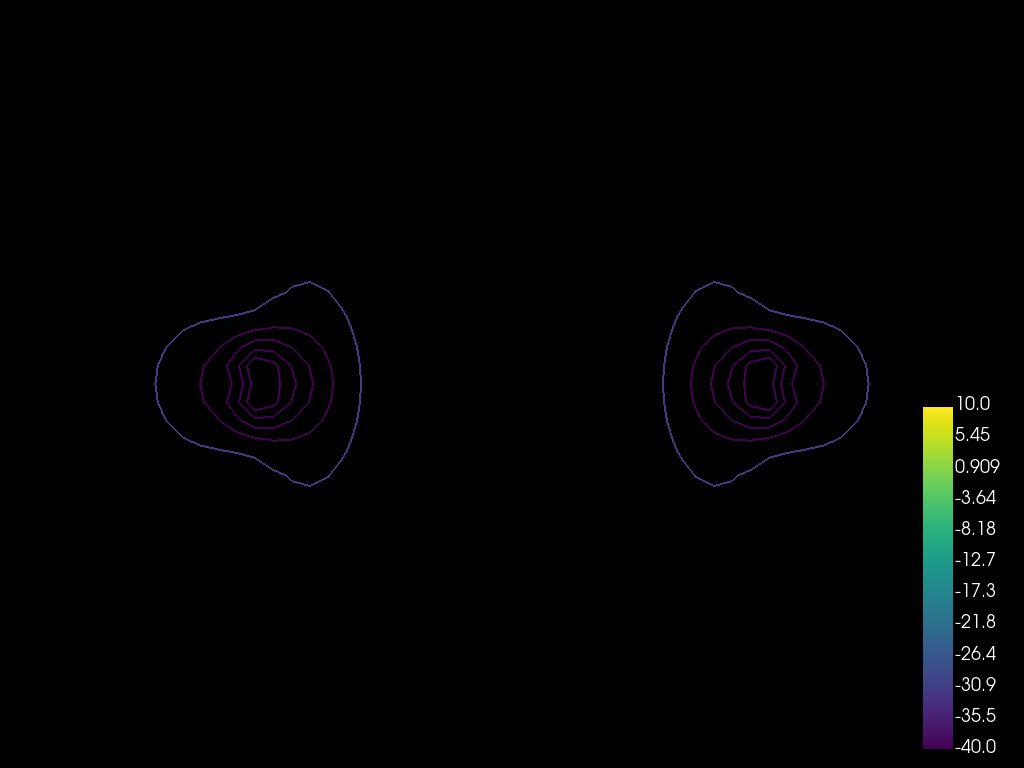

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


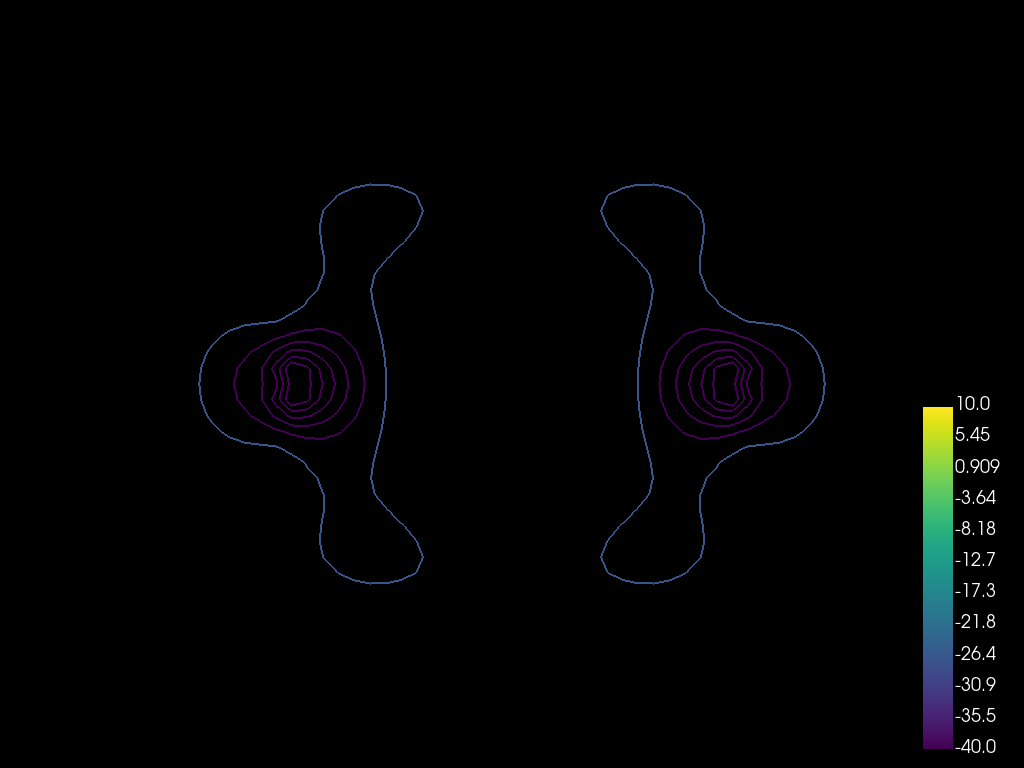

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


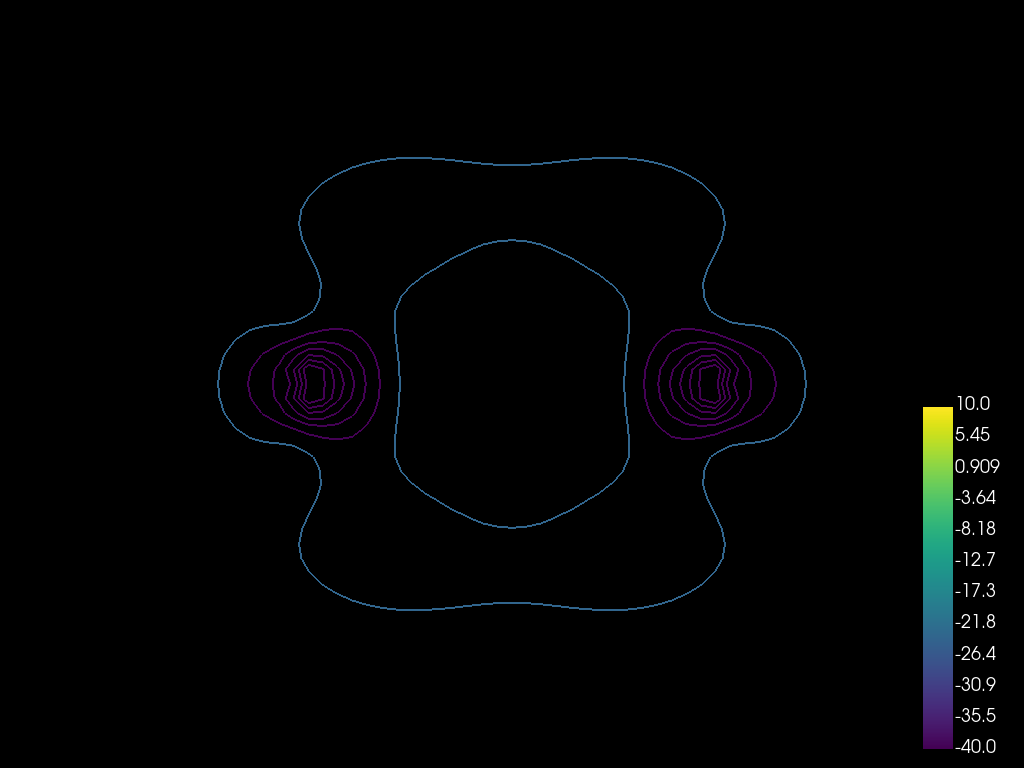

In [27]:
import pyvista as pv
import imageio

# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# Obtener los límites del dataset para posicionar la luz
bounds = leer.bounds
min_x = bounds[0]  # x-min

# Crear un Plotter
p = pv.Plotter(off_screen=True)

sargs = dict(
    n_labels=num_labels,
    vertical = not orientation_var.get() == 'H',
    color = 'w')

p.set_background('k')

# Definir la luz personalizada
light1 = pv.Light(position=(min_x, 0, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)

# Añadir la luz al plotter
p.add_light(light1)

# Definir el rango de isosuperficies
isosurface_range = range(2, 11)
images = []

for i in isosurface_range:
    # Generar las isosuperficies para el valor actual
    contorno = leer.slice(normal='x').contour(isosurfaces=i)
    
    # Limpiar el plotter y agregar la malla de contorno
    p.clear()
    p.add_mesh(contorno, show_scalar_bar=False, line_width=2,clim=(min_color_value, max_color_value))
    p.camera_position = (1,0,0)
    # Asegurarse de que la luz está en la escena después de limpiar
    p.add_light(light1)
    p.add_scalar_bar(**sargs)
    # Renderizar y guardar la imagen
    p.show(auto_close=False)
    img = p.screenshot()
    images.append(img)

# Cerrar el plotter
p.close()

# Crear el GIF
imageio.mimsave('isosurfaces_evolutionX.gif', images, fps=2)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


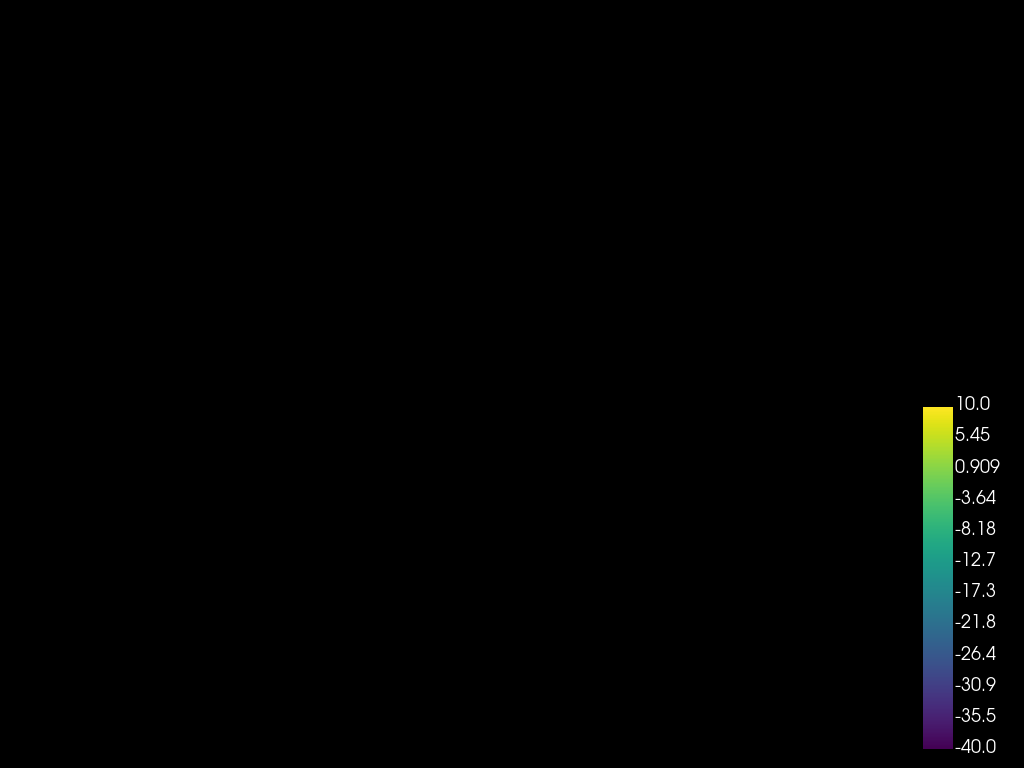

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


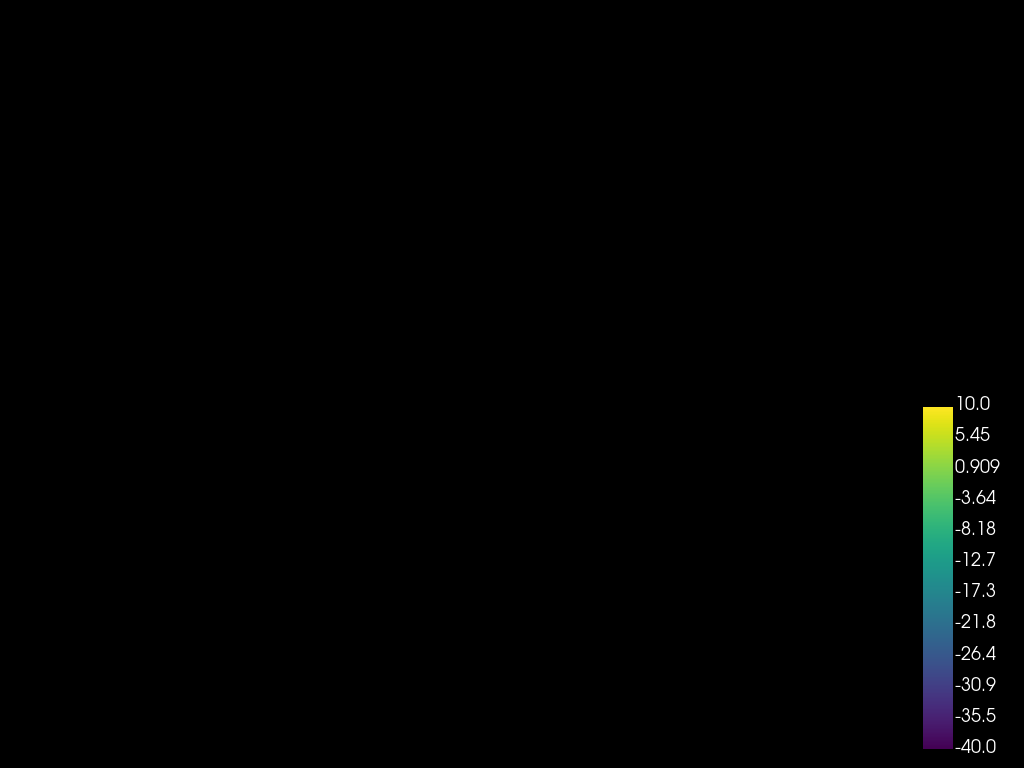

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


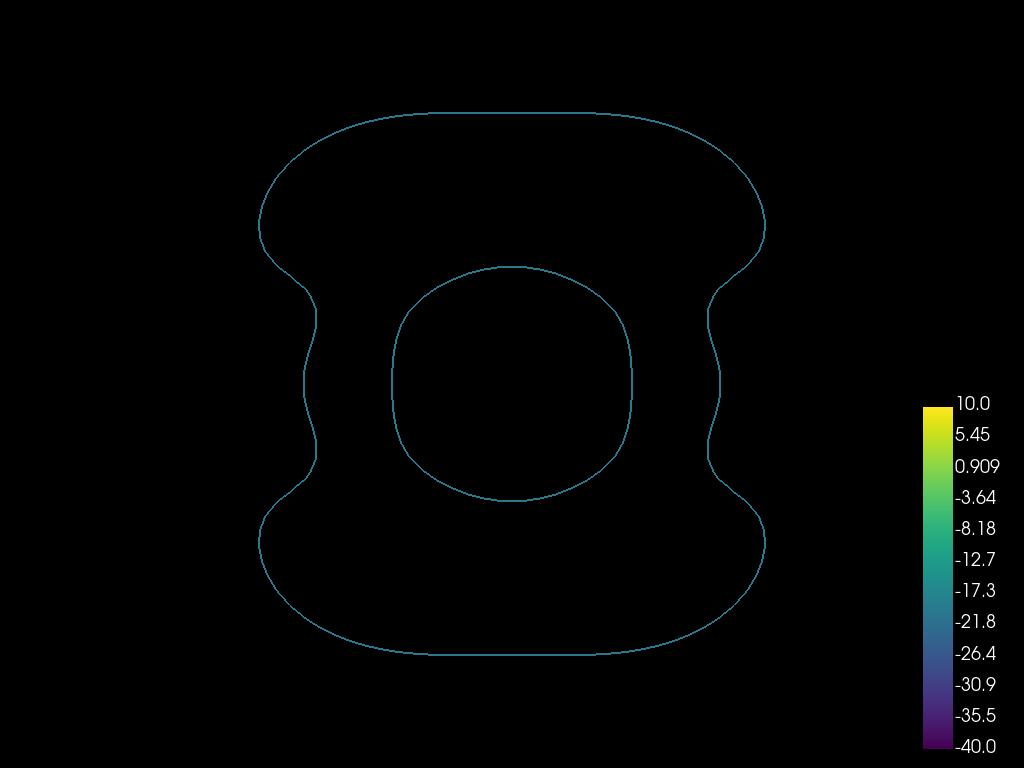

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


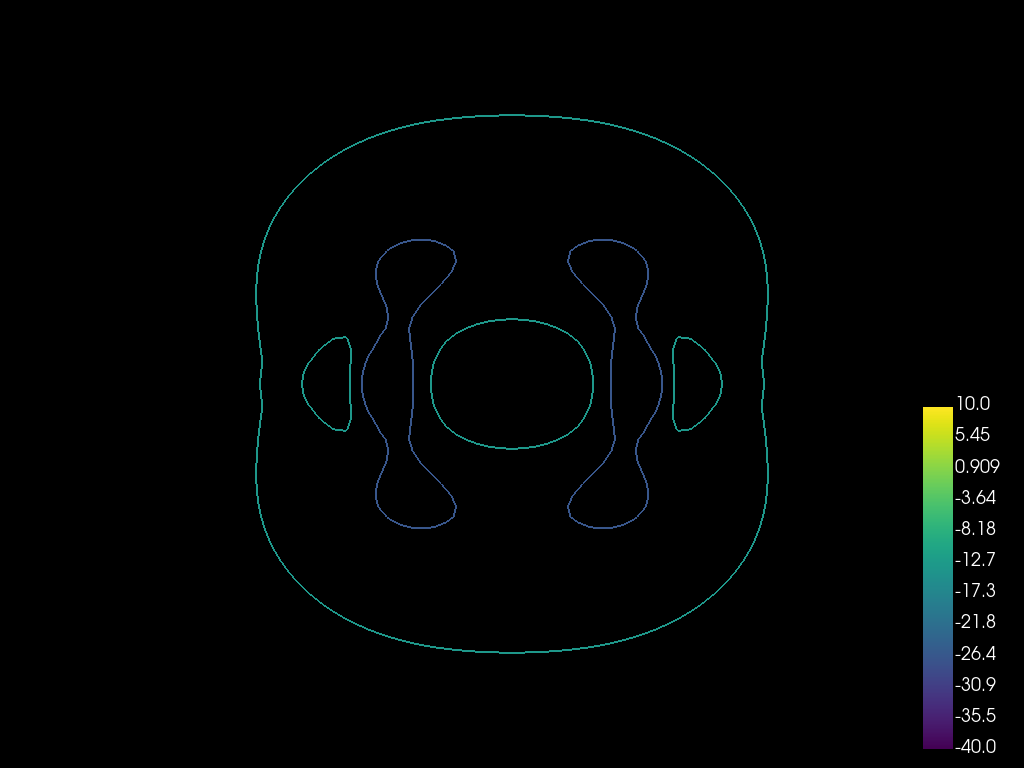

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


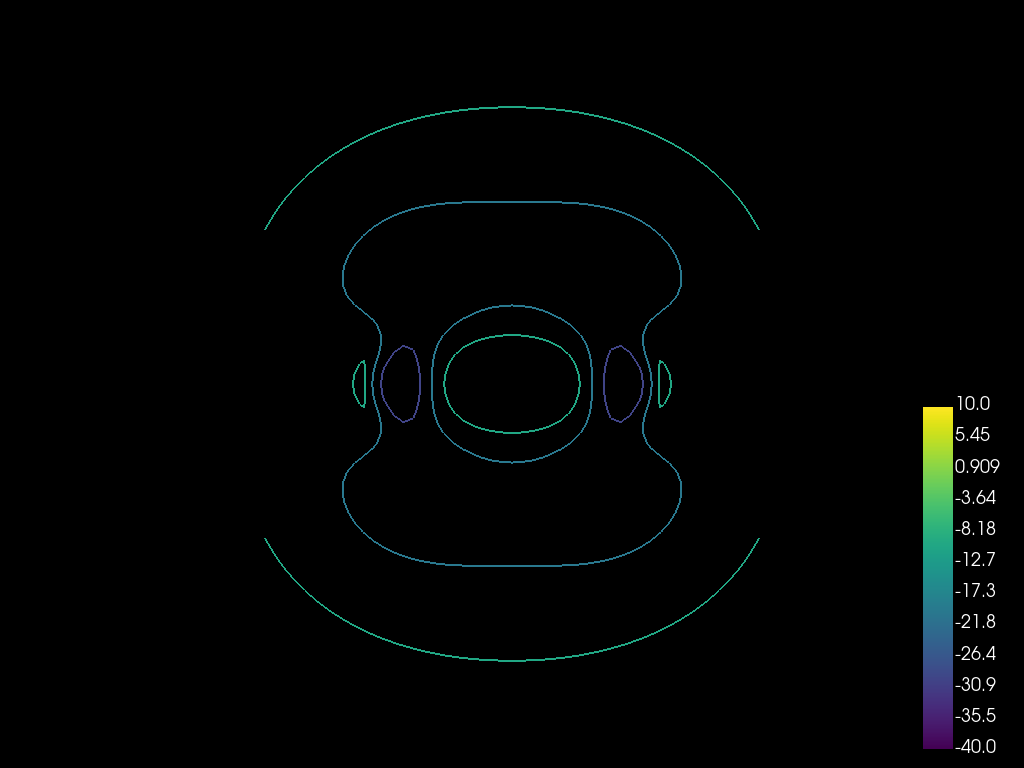

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


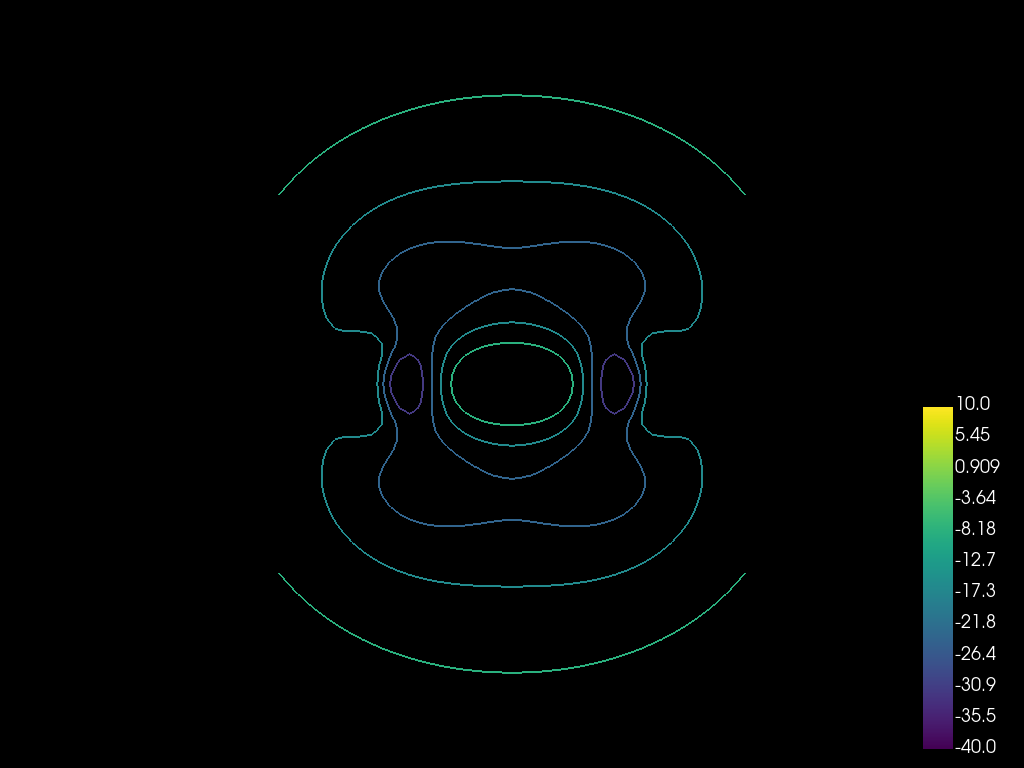

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


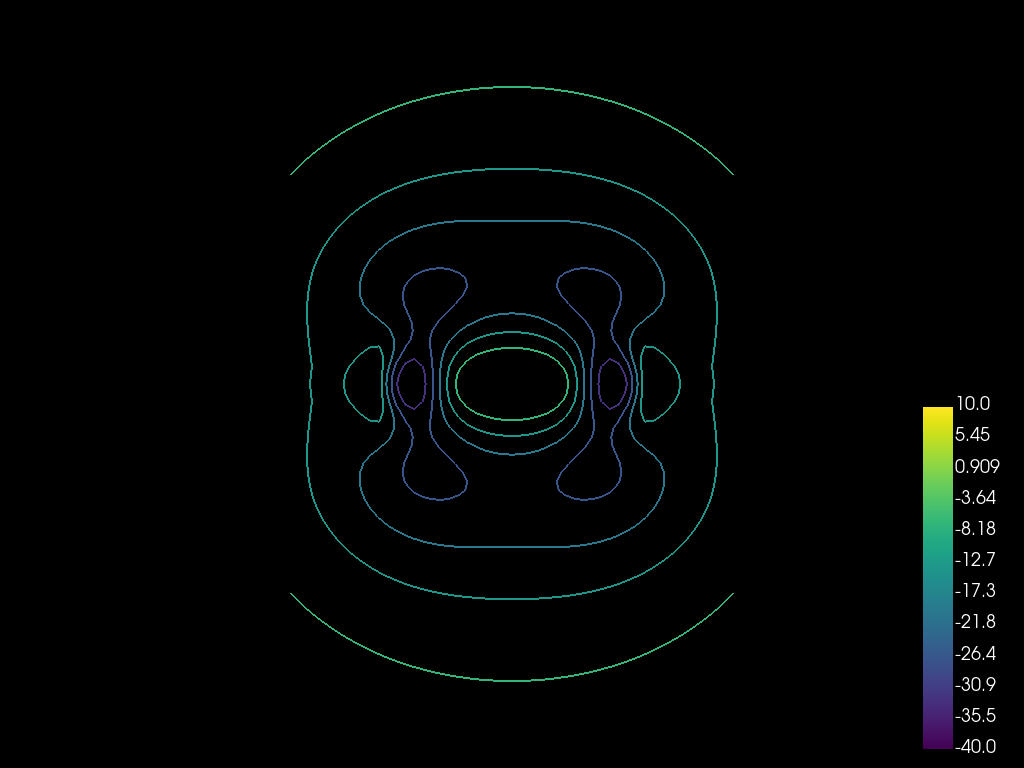

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


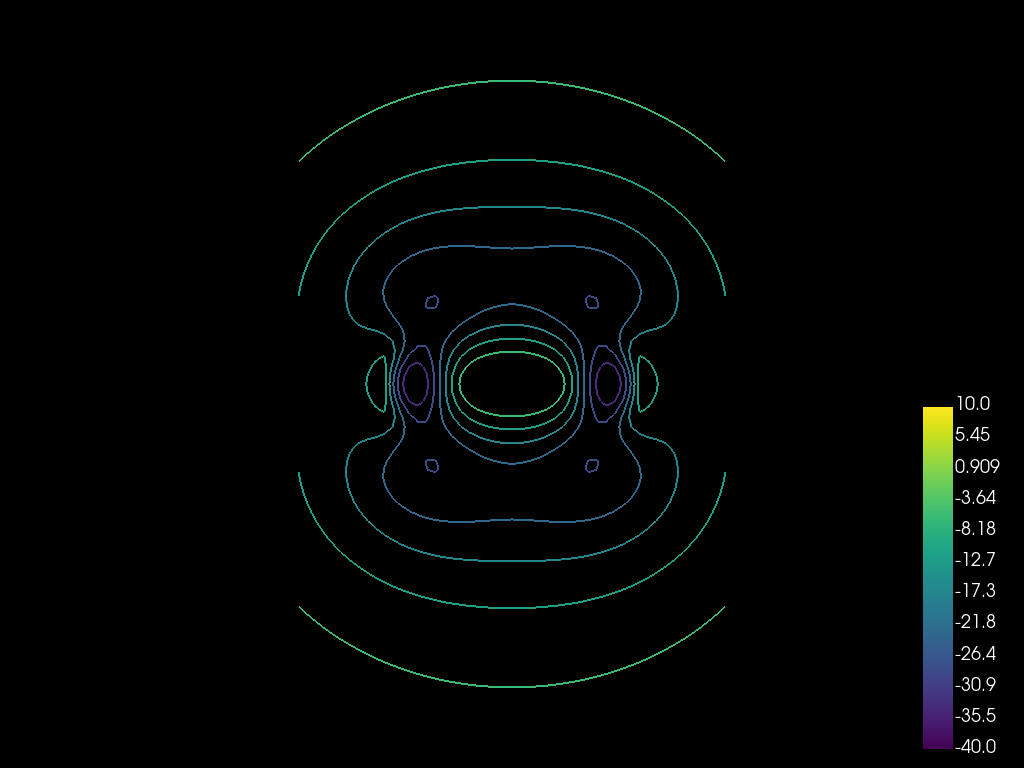

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


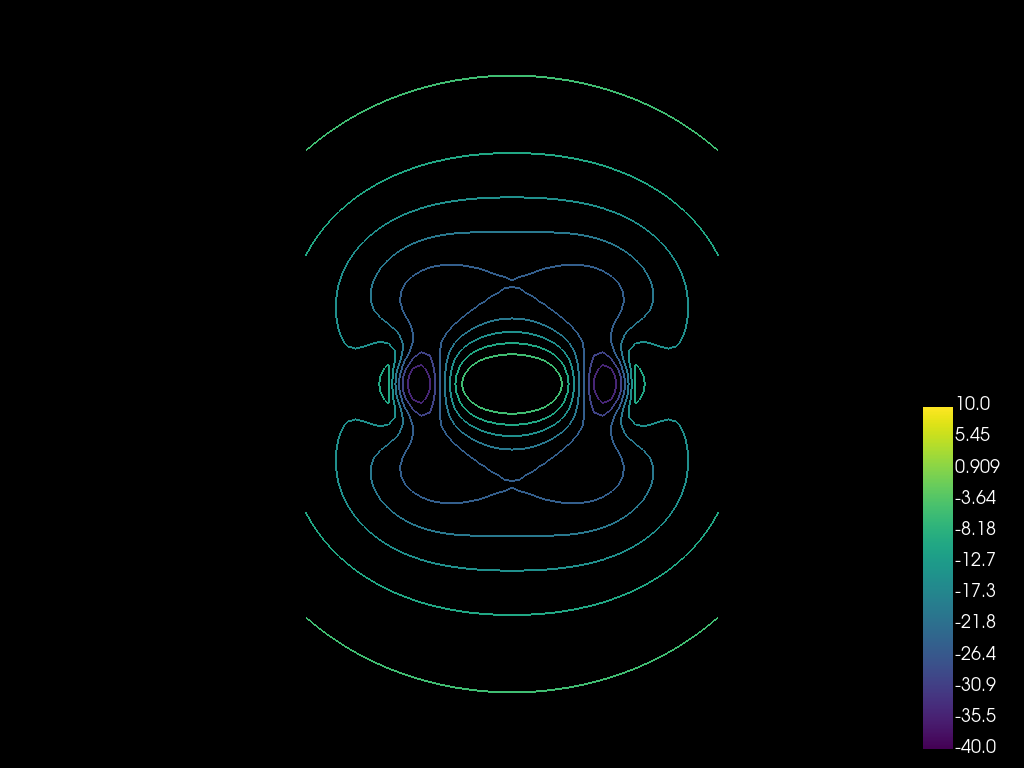

In [28]:
import pyvista as pv
import imageio

# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# Obtener los límites del dataset para posicionar la luz
bounds = leer.bounds
min_x = bounds[0]  # x-min

# Crear un Plotter
p = pv.Plotter(off_screen=True)

sargs = dict(
    n_labels=num_labels,
    vertical = not orientation_var.get() == 'H',
    color = 'w')

p.set_background('k')

# Definir la luz personalizada
light1 = pv.Light(position=(min_x, 0, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)

# Añadir la luz al plotter
p.add_light(light1)

# Definir el rango de isosuperficies
isosurface_range = range(2, 11)
images = []

for i in isosurface_range:
    # Generar las isosuperficies para el valor actual
    contorno = leer.slice(normal='y').contour(isosurfaces=i)
    
    # Limpiar el plotter y agregar la malla de contorno
    p.clear()
    p.add_mesh(contorno, show_scalar_bar=False, line_width=2,clim=(min_color_value, max_color_value))
    p.camera_position = (0,1,0)
    # Asegurarse de que la luz está en la escena después de limpiar
    p.add_light(light1)
    p.add_scalar_bar(**sargs)
    # Renderizar y guardar la imagen
    p.show(auto_close=False)
    img = p.screenshot()
    images.append(img)

# Cerrar el plotter
p.close()

# Crear el GIF
imageio.mimsave('isosurfaces_evolutionY.gif', images, fps=2)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


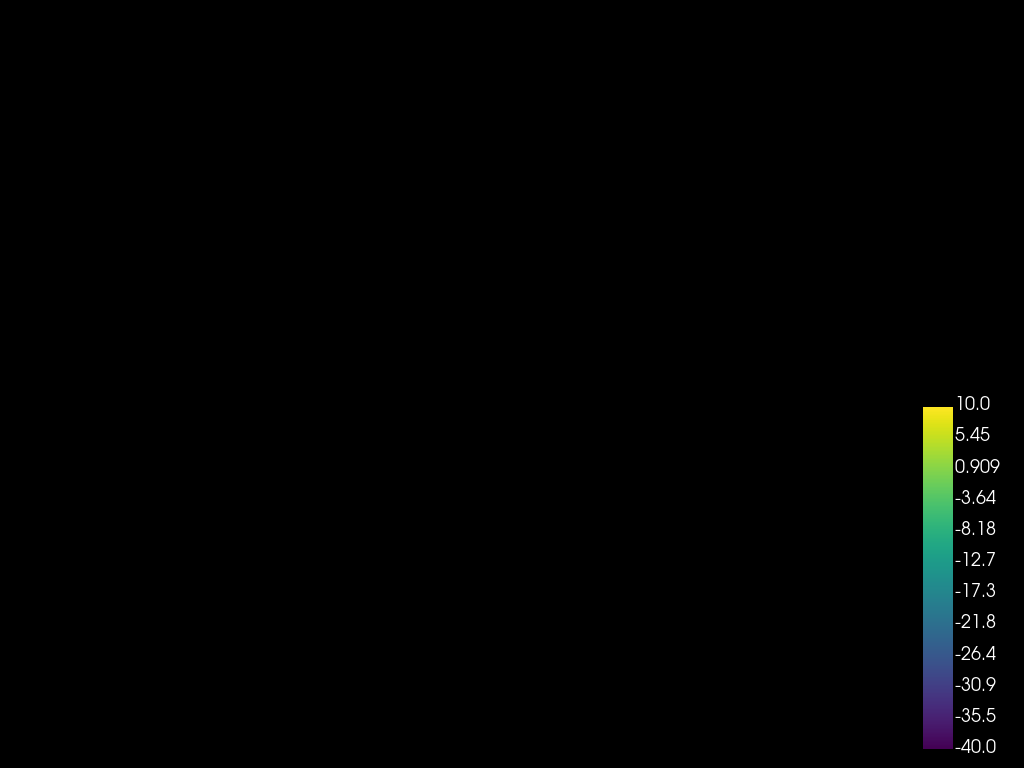

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


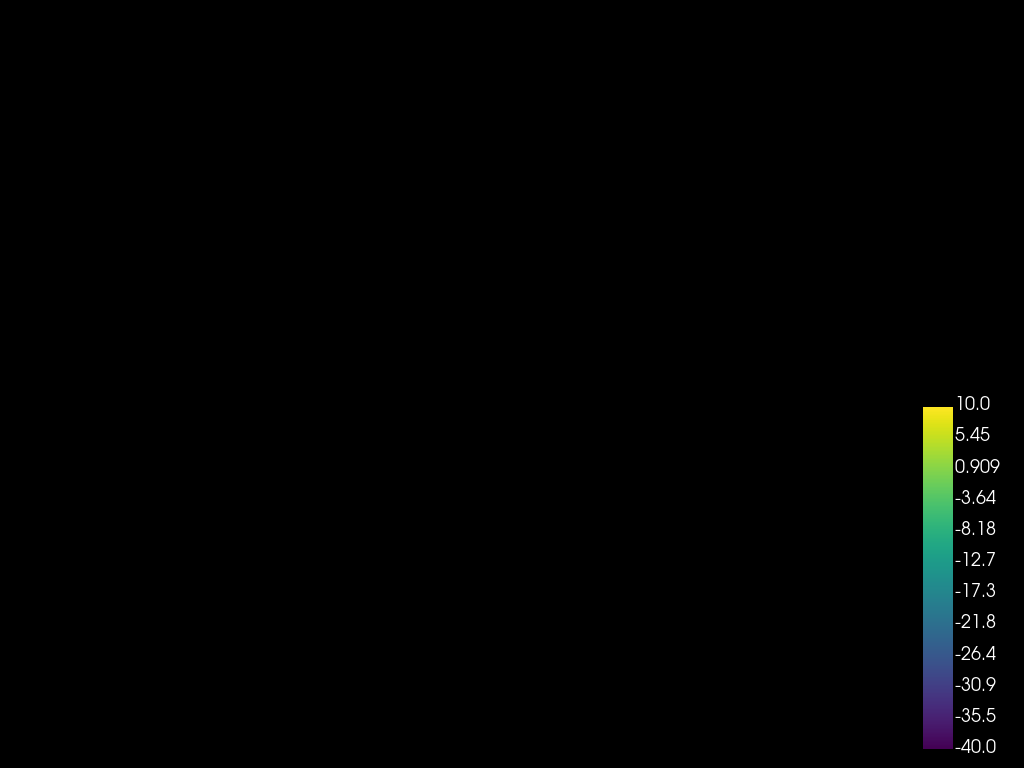

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


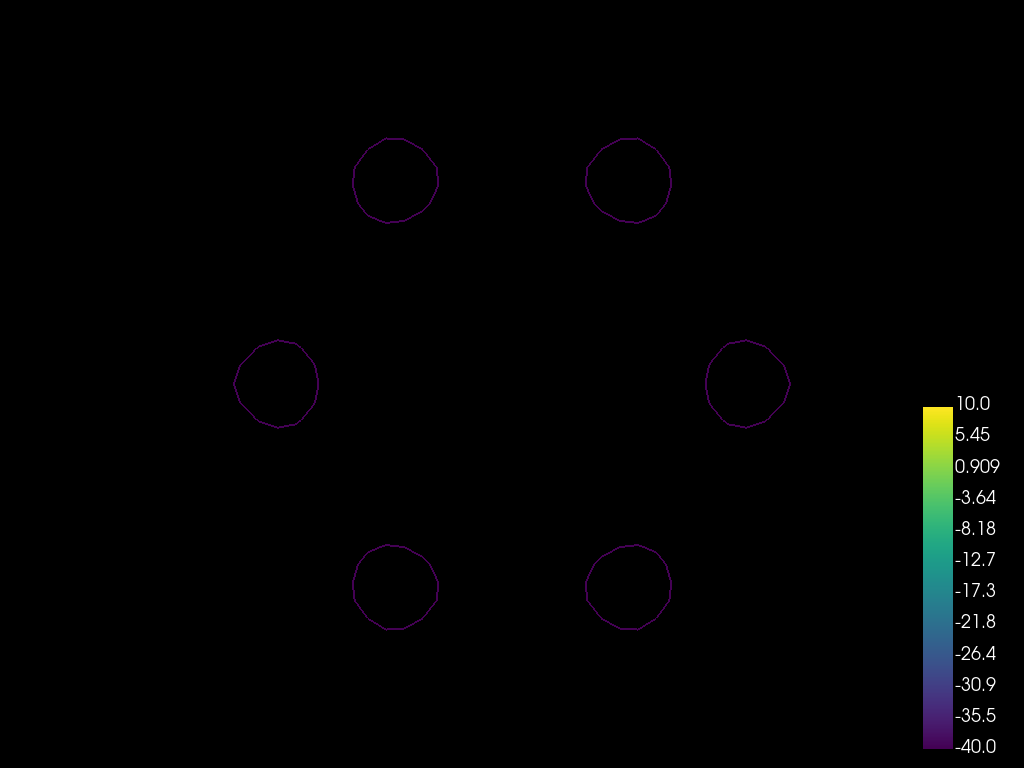

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


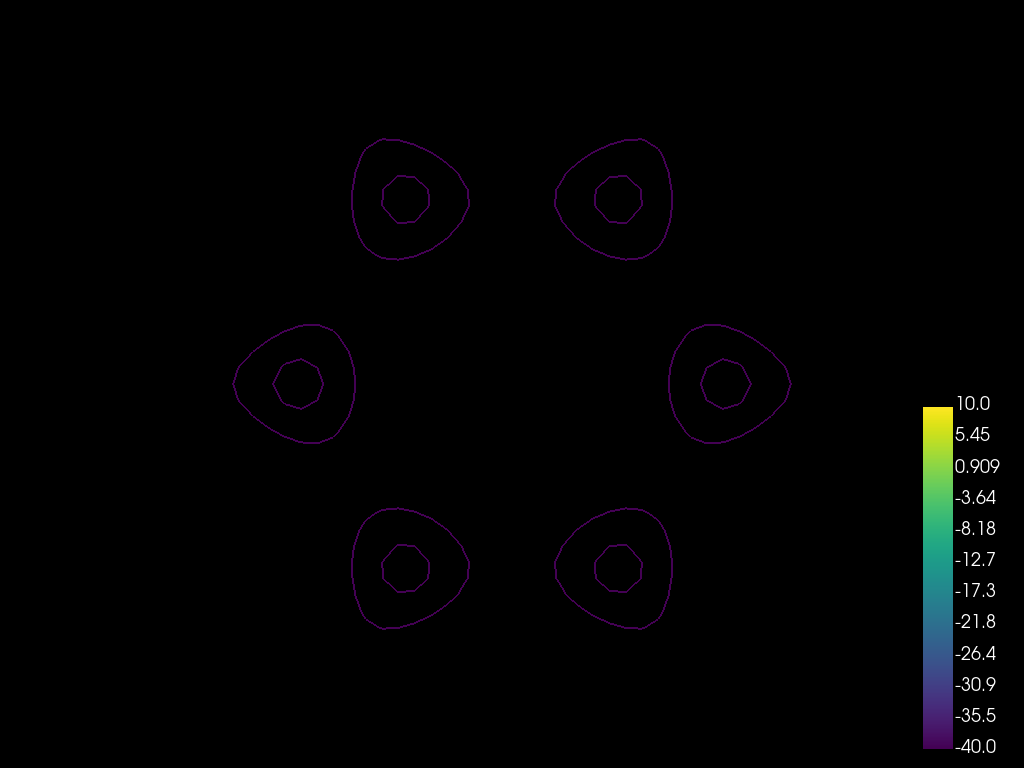

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


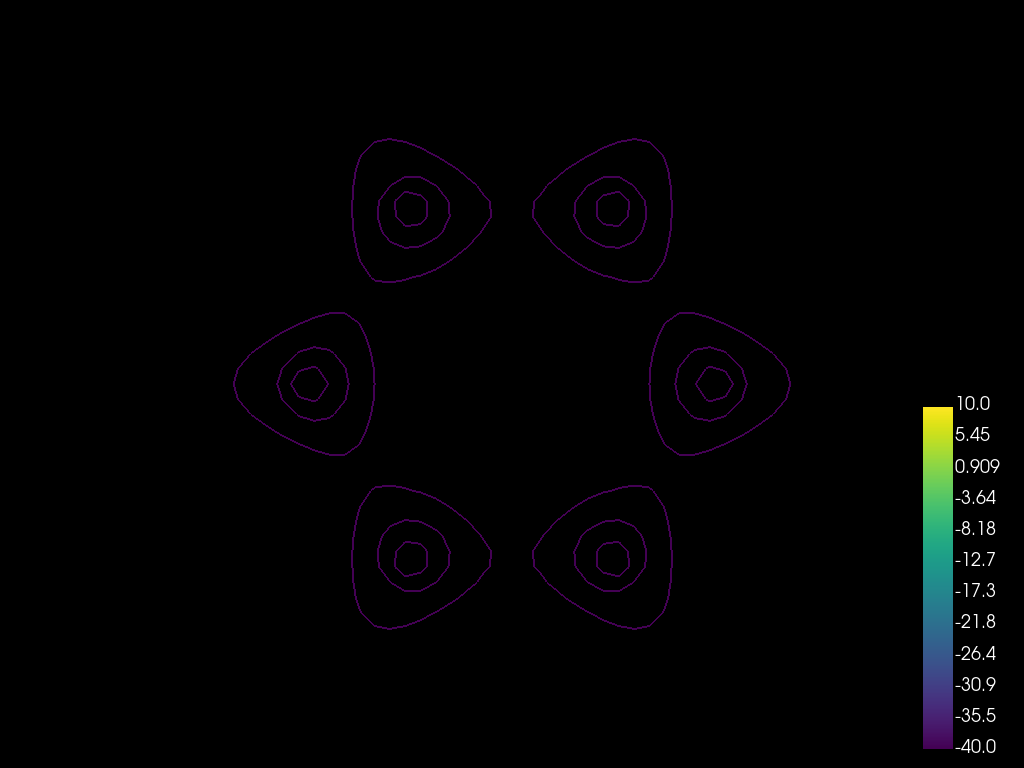

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


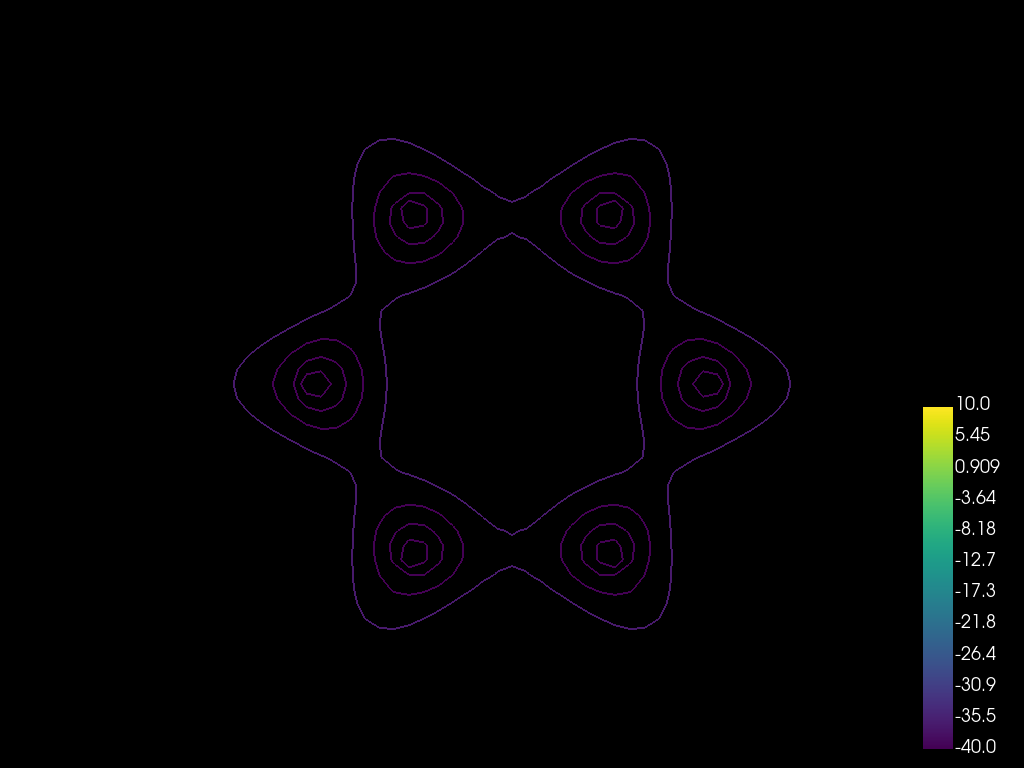

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


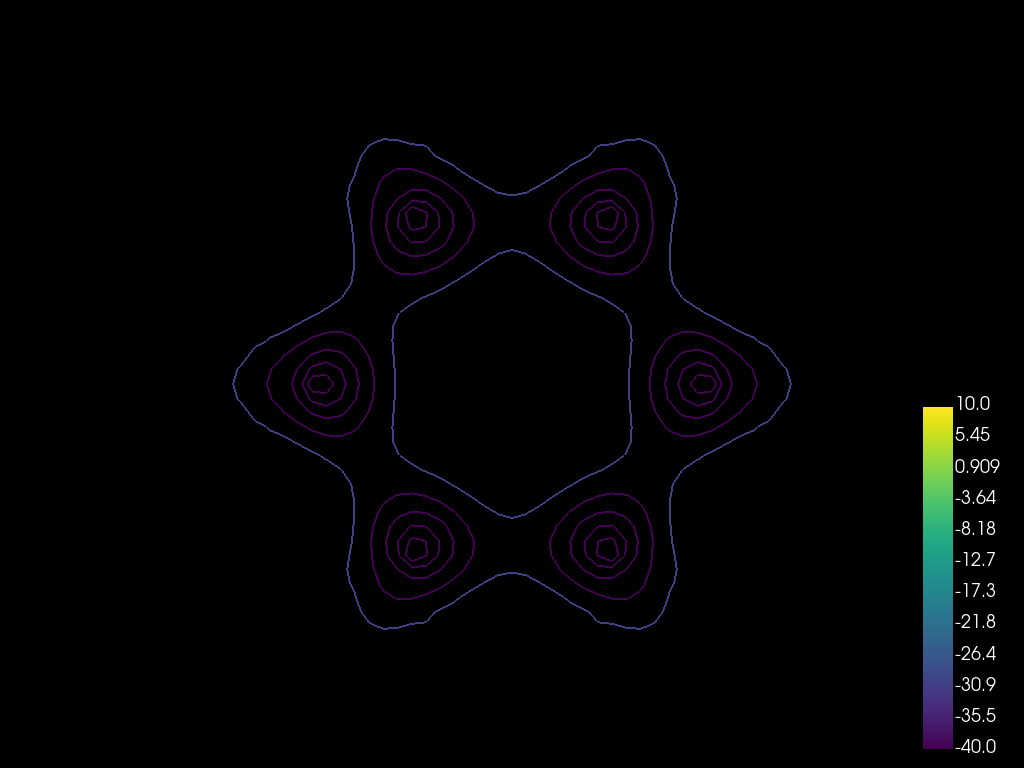

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


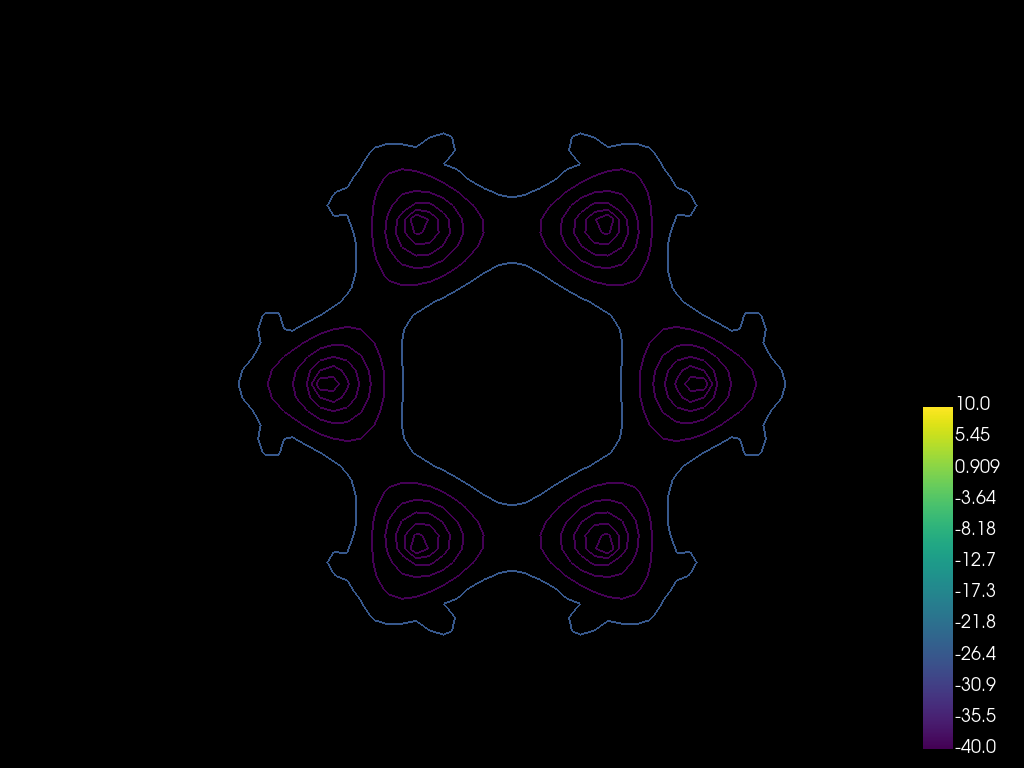

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


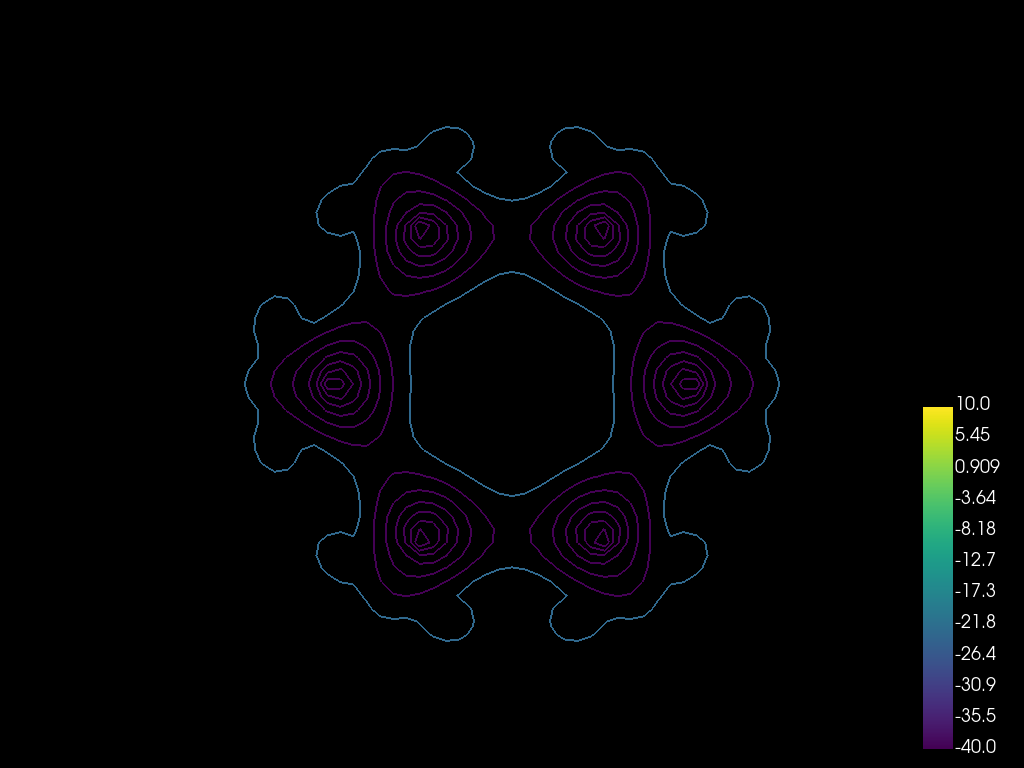

In [29]:
import pyvista as pv
import imageio

# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# Obtener los límites del dataset para posicionar la luz
bounds = leer.bounds
min_x = bounds[0]  # x-min

# Crear un Plotter
p = pv.Plotter(off_screen=True)

sargs = dict(
    n_labels=num_labels,
    vertical = not orientation_var.get() == 'H',
    color = 'w')

p.set_background('k')

# Definir la luz personalizada
light1 = pv.Light(position=(min_x, 0, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)

# Añadir la luz al plotter
p.add_light(light1)

# Definir el rango de isosuperficies
isosurface_range = range(2, 11)
images = []

for i in isosurface_range:
    # Generar las isosuperficies para el valor actual
    contorno = leer.slice(normal='z').contour(isosurfaces=i)
    
    # Limpiar el plotter y agregar la malla de contorno
    p.clear()
    p.add_mesh(contorno, show_scalar_bar=False, line_width=2,clim=(min_color_value, max_color_value))
    p.camera_position = (0,0,1)
    # Asegurarse de que la luz está en la escena después de limpiar
    p.add_light(light1)
    p.add_scalar_bar(**sargs)
    # Renderizar y guardar la imagen
    p.show(auto_close=False)
    img = p.screenshot()
    images.append(img)

# Cerrar el plotter
p.close()

# Crear el GIF
imageio.mimsave('isosurfaces_evolutionZ.gif', images, fps=2)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


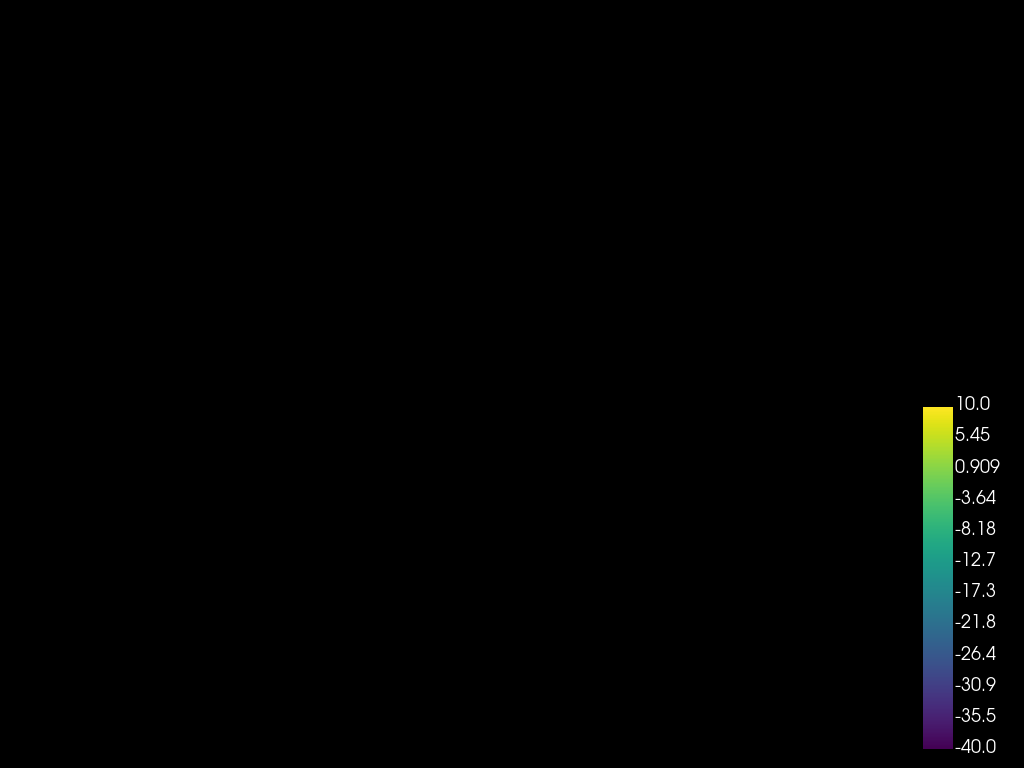

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


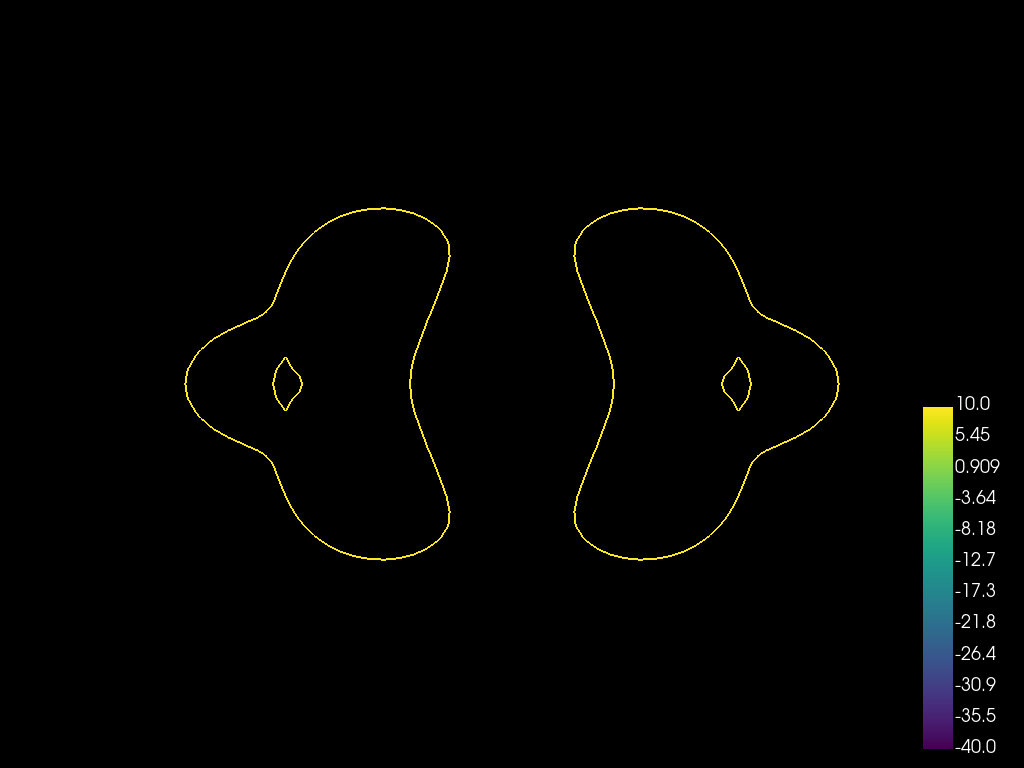

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


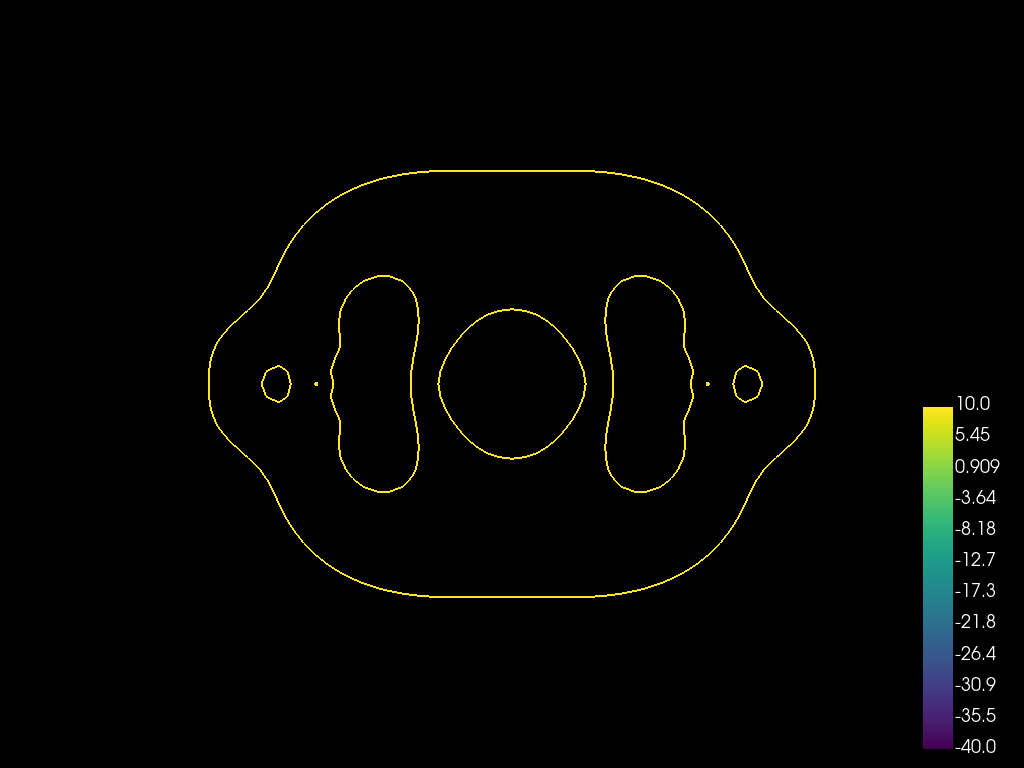

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


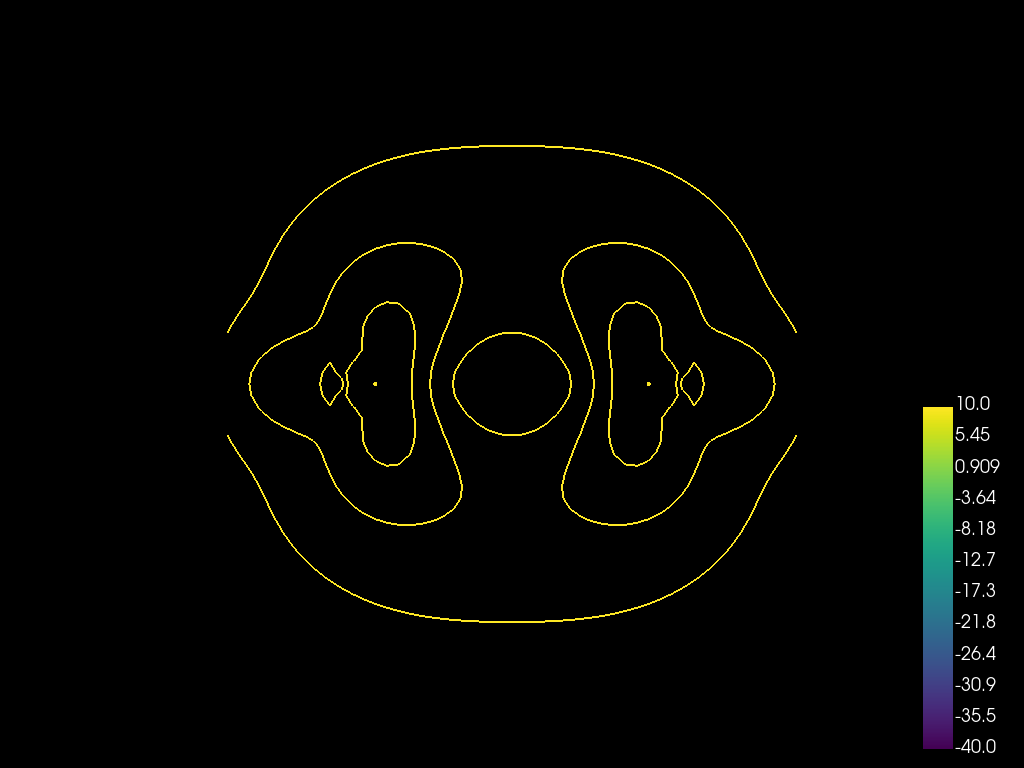

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


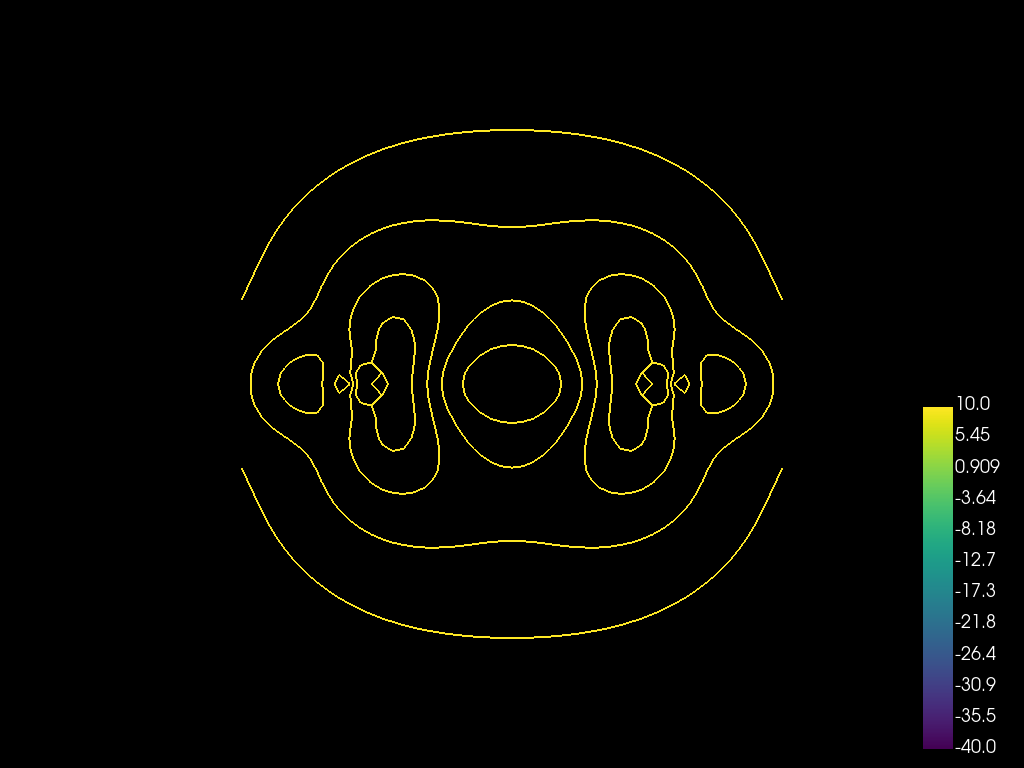

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


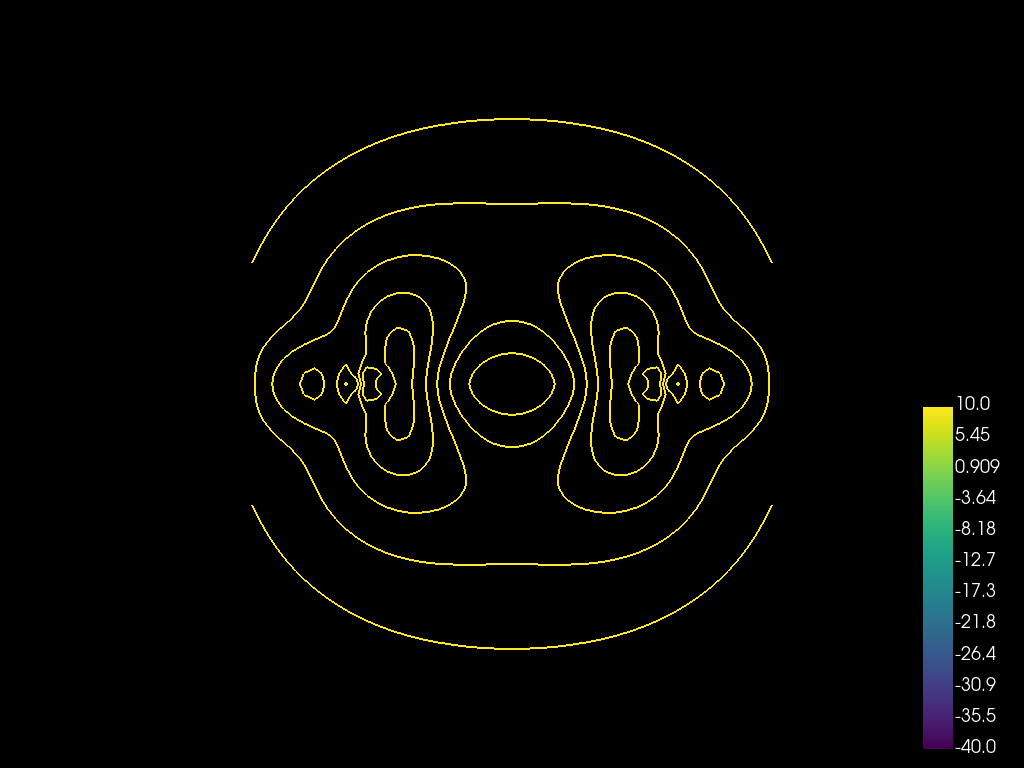

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


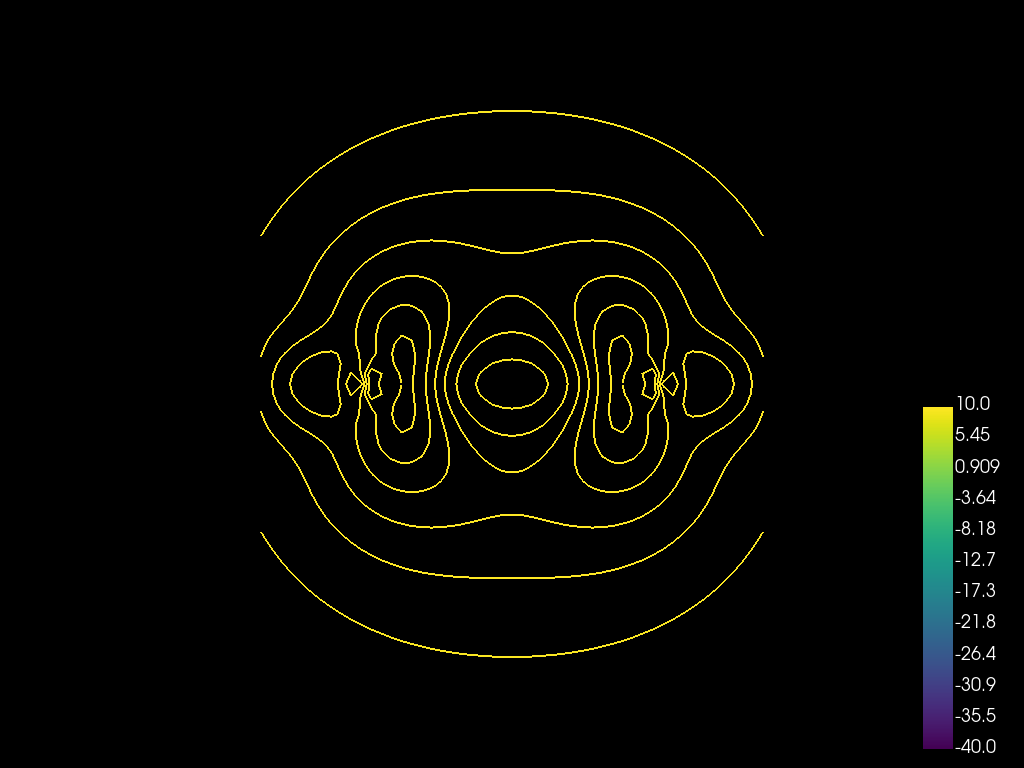

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


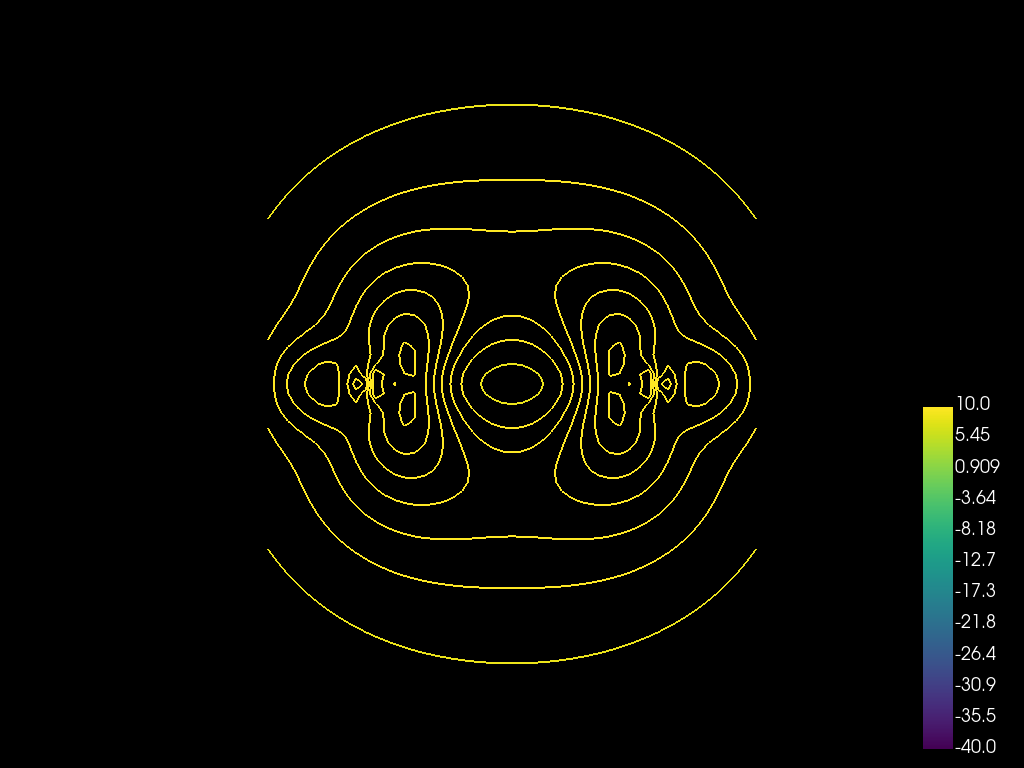

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


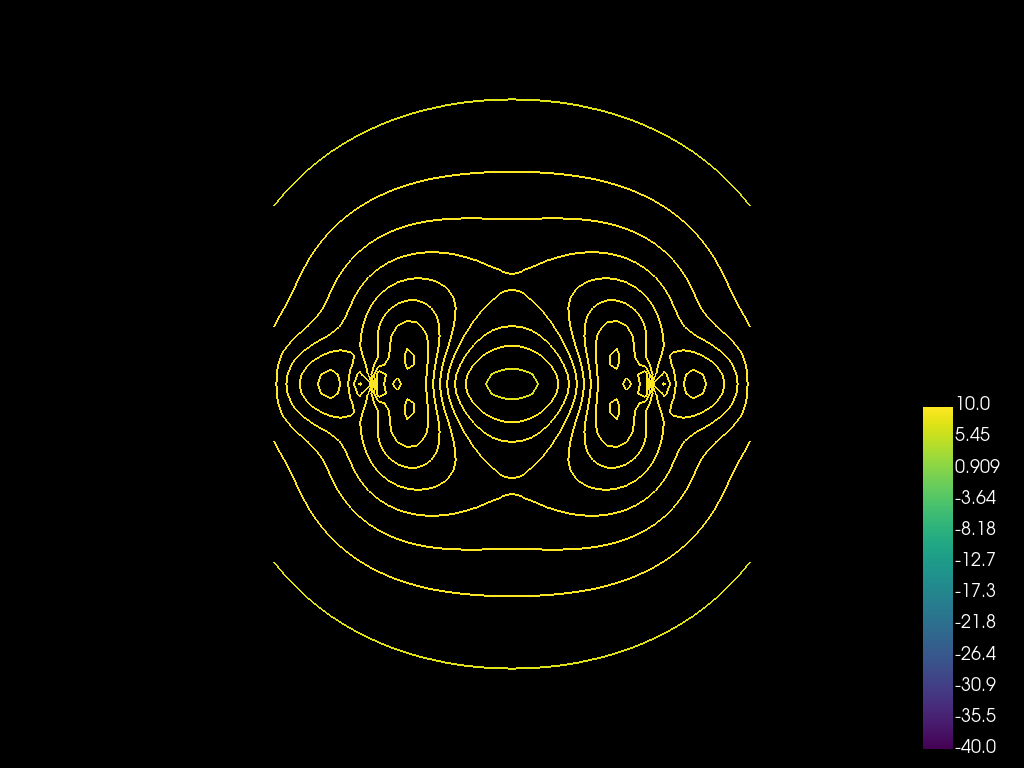

In [30]:
import pyvista as pv
import imageio
images = []

# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# Obtener los límites del dataset para posicionar la luz
bounds = grid.bounds
min_x = bounds[0]  # x-min
# Definir la luz personalizada
light1 = pv.Light(position=(min_x, 0, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)

valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Iterate through each isosurface value
for i, valor in enumerate(valores_isosurfaces):
    sliced = grid.slice(normal='x')
    # Obtain the vectors of the points on the cut mesh      
    vectors = sliced.point_data['vectors']
    # Calculate the magnitude of these vectors
    magnitudes = np.linalg.norm(vectors, axis=1)
    # We assign the magnitude data to the cut mesh
    sliced['magnitudes'] = magnitudes
    # We generate the isosurface representing the points of equal magnitude
    contornos = sliced.contour(isosurfaces=valor, scalars='magnitudes')
    p = pv.Plotter()
    
    sargs = dict(
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H',
        color = 'w')
    
    p.set_background('k')
    p.add_mesh(contornos, show_scalar_bar=False, line_width=2,clim=(min_color_value, max_color_value))
    p.add_light(light1)
    p.add_scalar_bar(**sargs)
    p.camera_position = (1,0,0)
    p.show(auto_close=False)
    img = p.screenshot()
    images.append(img)
    p.close()
# Crear el GIF
imageio.mimsave('isosurfaces_evolution_MagnitudesX.gif', images, fps=2)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


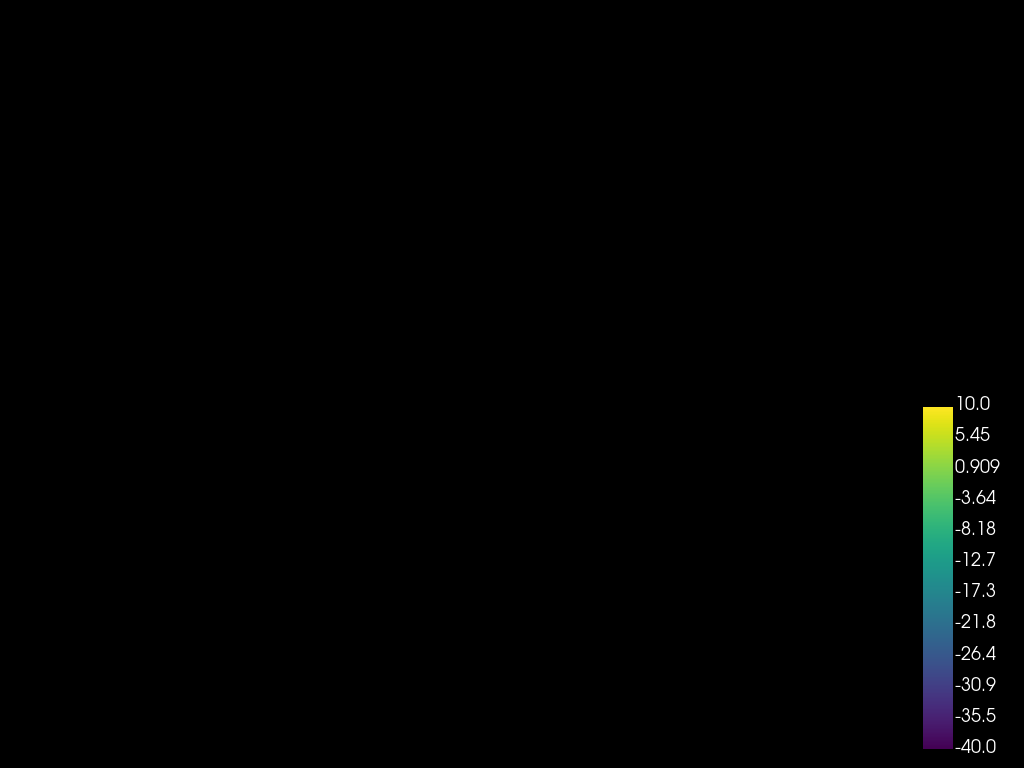

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


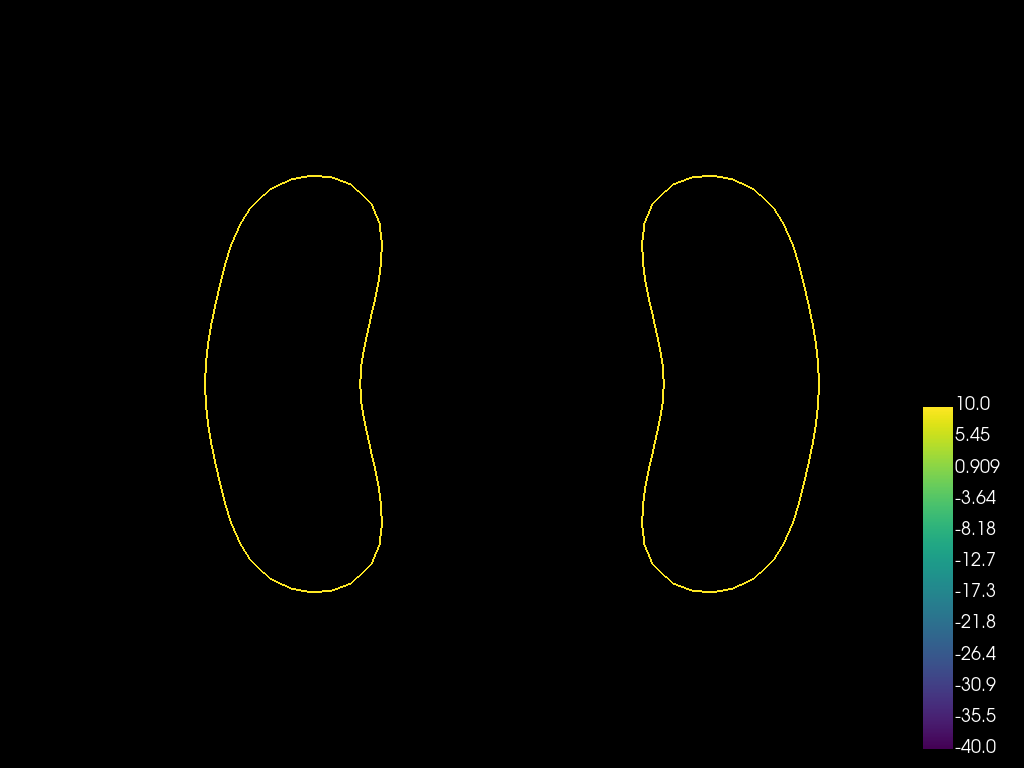

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


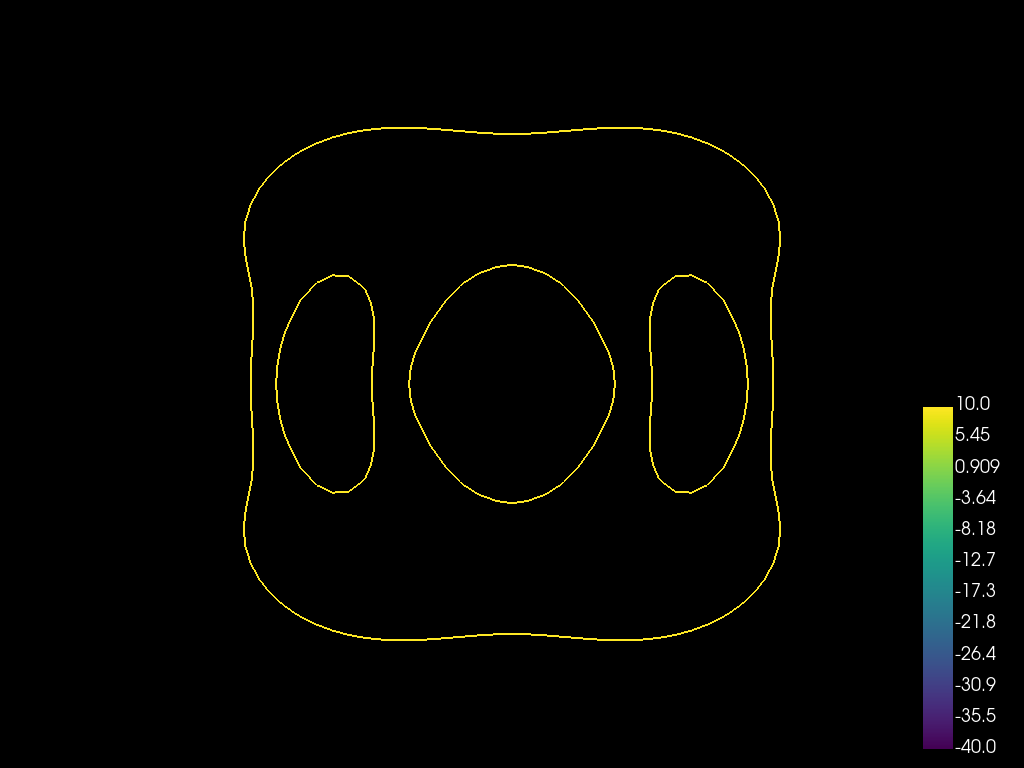

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


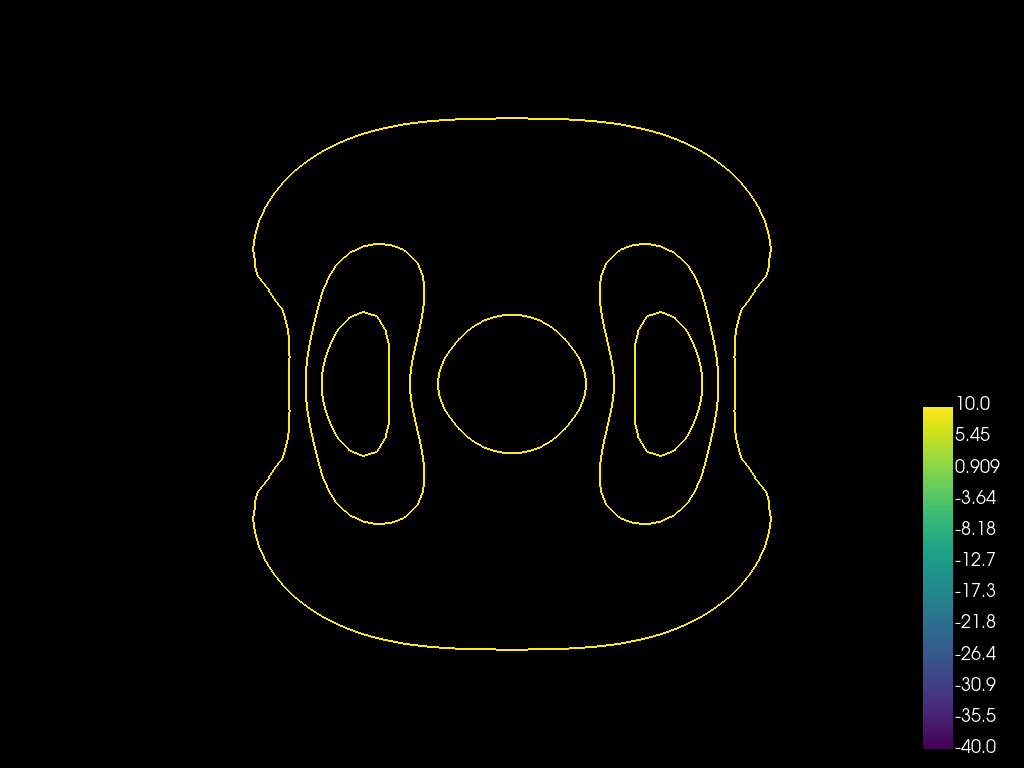

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


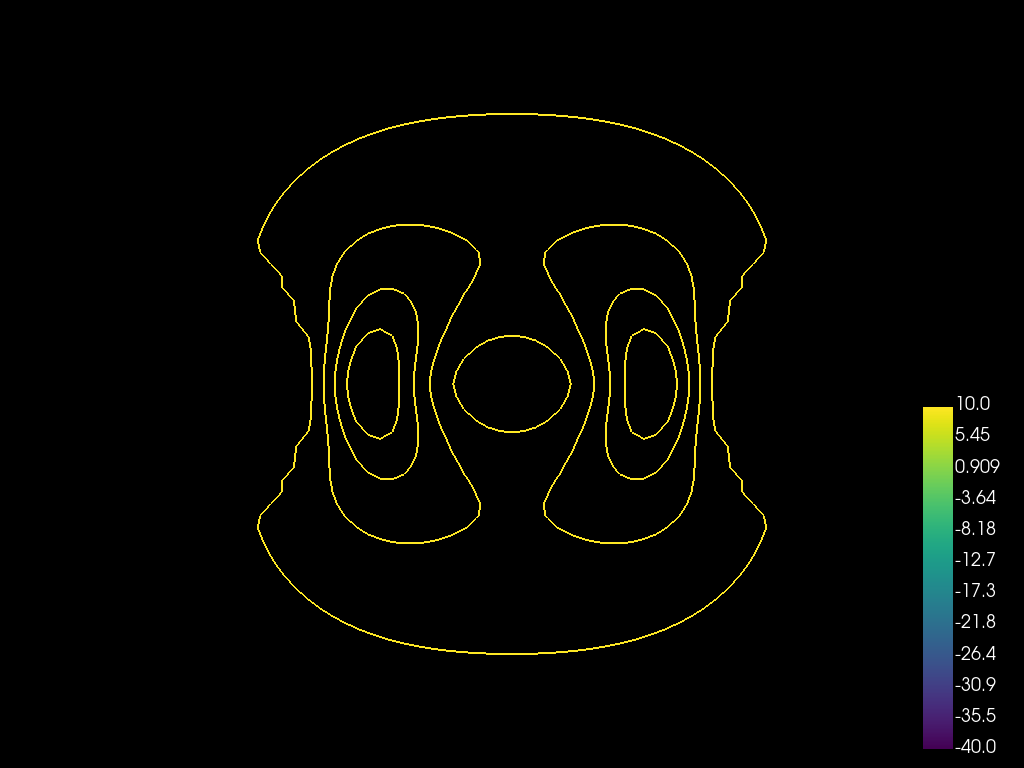

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


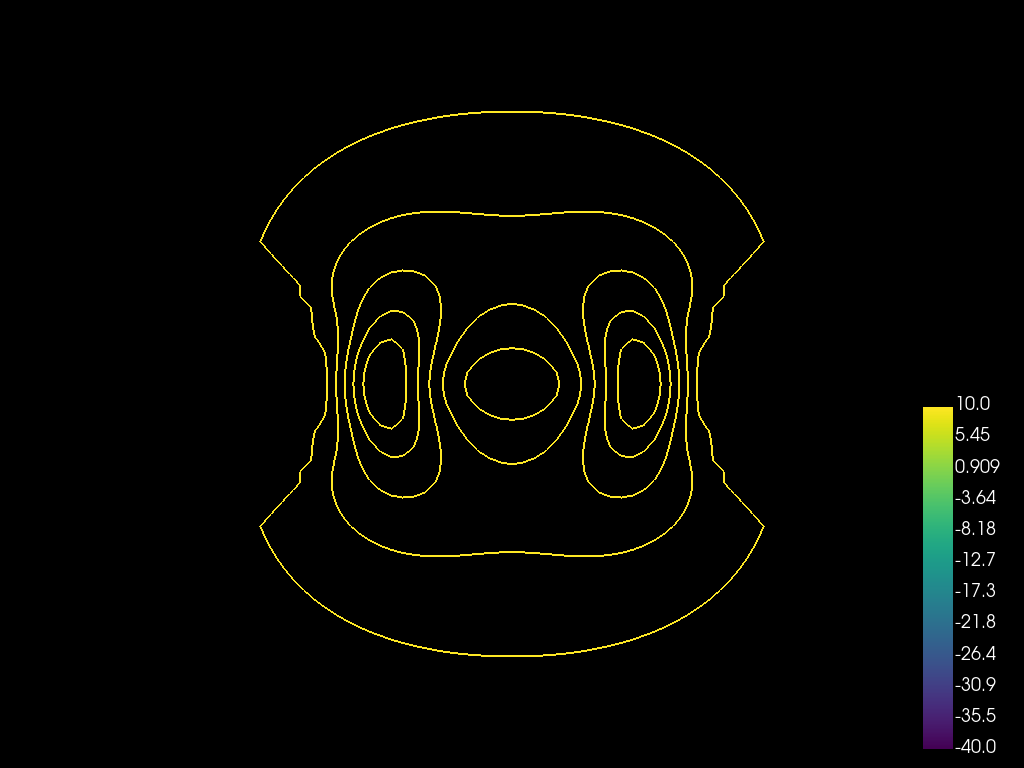

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


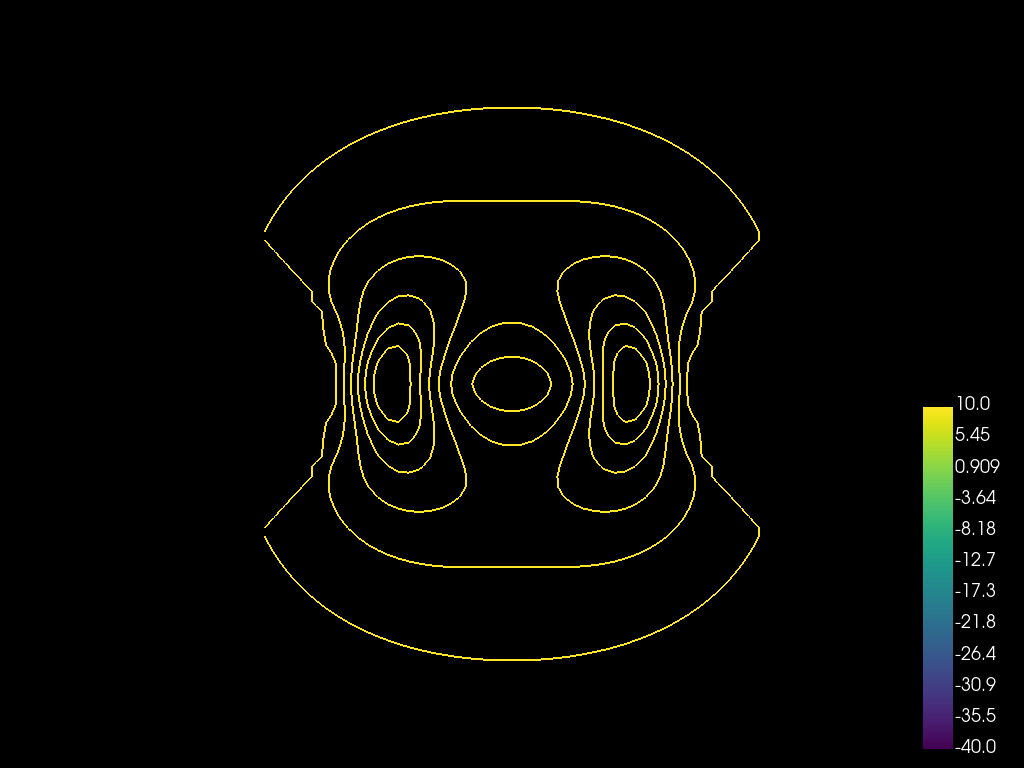

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


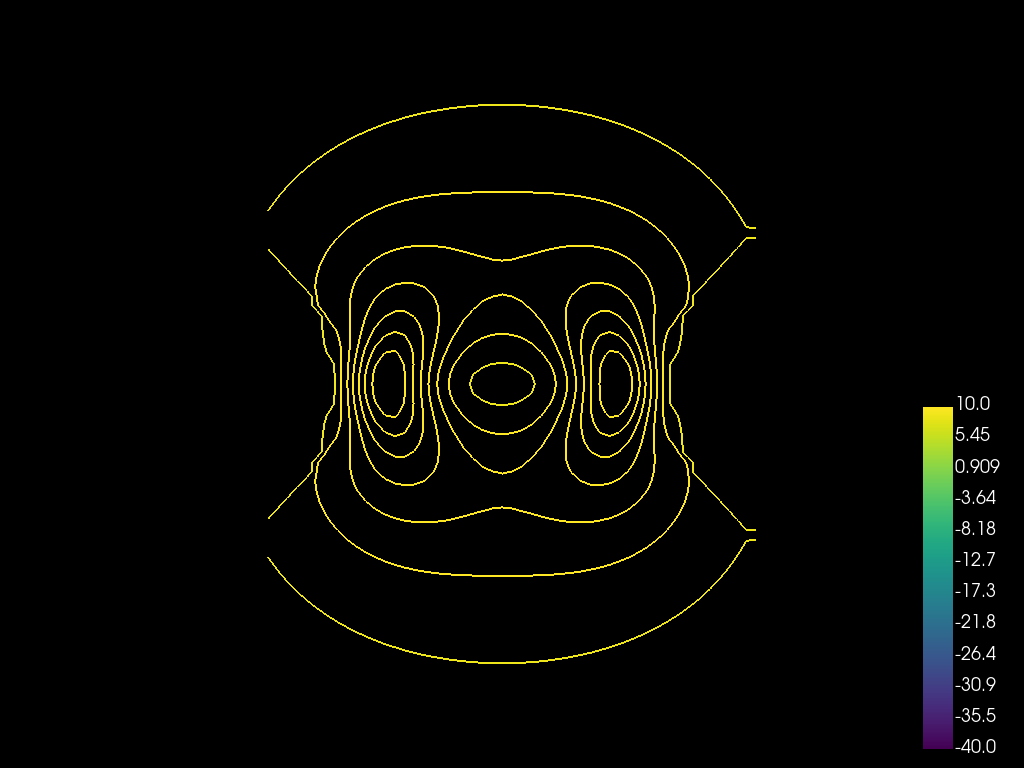

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


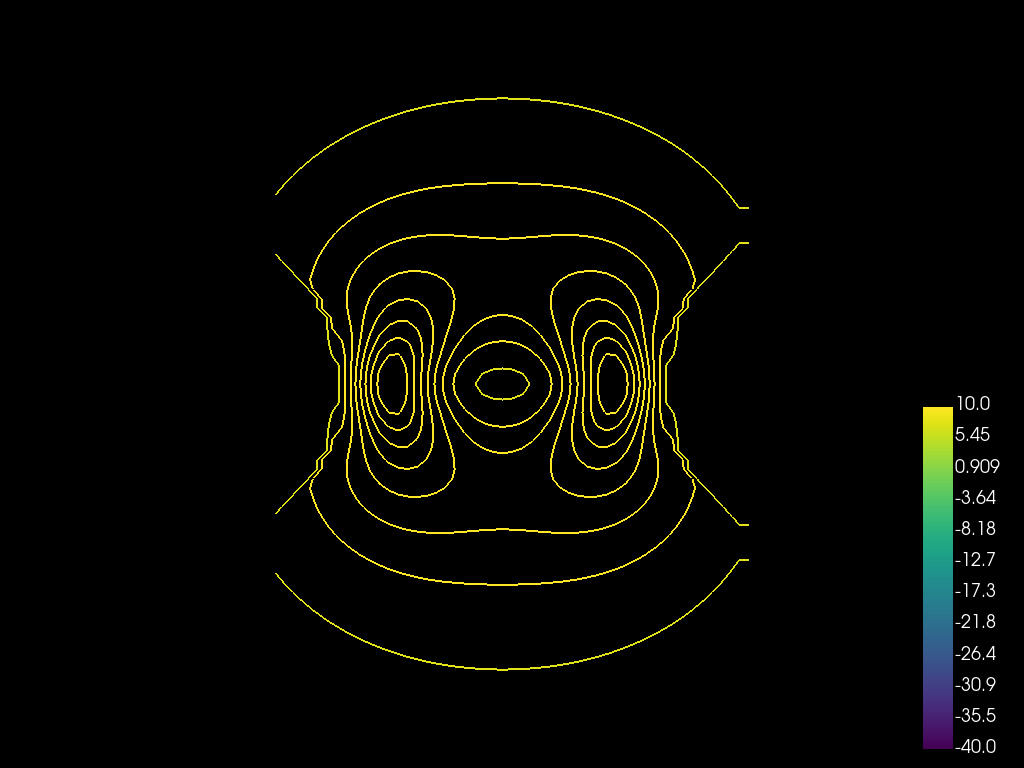

In [31]:
import pyvista as pv
import imageio
images = []

# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# Obtener los límites del dataset para posicionar la luz
bounds = grid.bounds
min_x = bounds[0]  # x-min
# Definir la luz personalizada
light1 = pv.Light(position=(min_x, 0, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)

valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Iterate through each isosurface value
for i, valor in enumerate(valores_isosurfaces):
    sliced = grid.slice(normal='y')
    # Obtain the vectors of the points on the cut mesh      
    vectors = sliced.point_data['vectors']
    # Calculate the magnitude of these vectors
    magnitudes = np.linalg.norm(vectors, axis=1)
    # We assign the magnitude data to the cut mesh
    sliced['magnitudes'] = magnitudes
    # We generate the isosurface representing the points of equal magnitude
    contornos = sliced.contour(isosurfaces=valor, scalars='magnitudes')
    p = pv.Plotter()
    
    sargs = dict(
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H',
        color = 'w')
    
    p.set_background('k')
    p.add_mesh(contornos, show_scalar_bar=False, line_width=2,clim=(min_color_value, max_color_value))
    p.add_light(light1)
    p.add_scalar_bar(**sargs)
    p.camera_position = (0,1,0)
    p.show(auto_close=False)
    img = p.screenshot()
    images.append(img)
    p.close()
# Crear el GIF
imageio.mimsave('isosurfaces_evolution_MagnitudesY.gif', images, fps=2)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


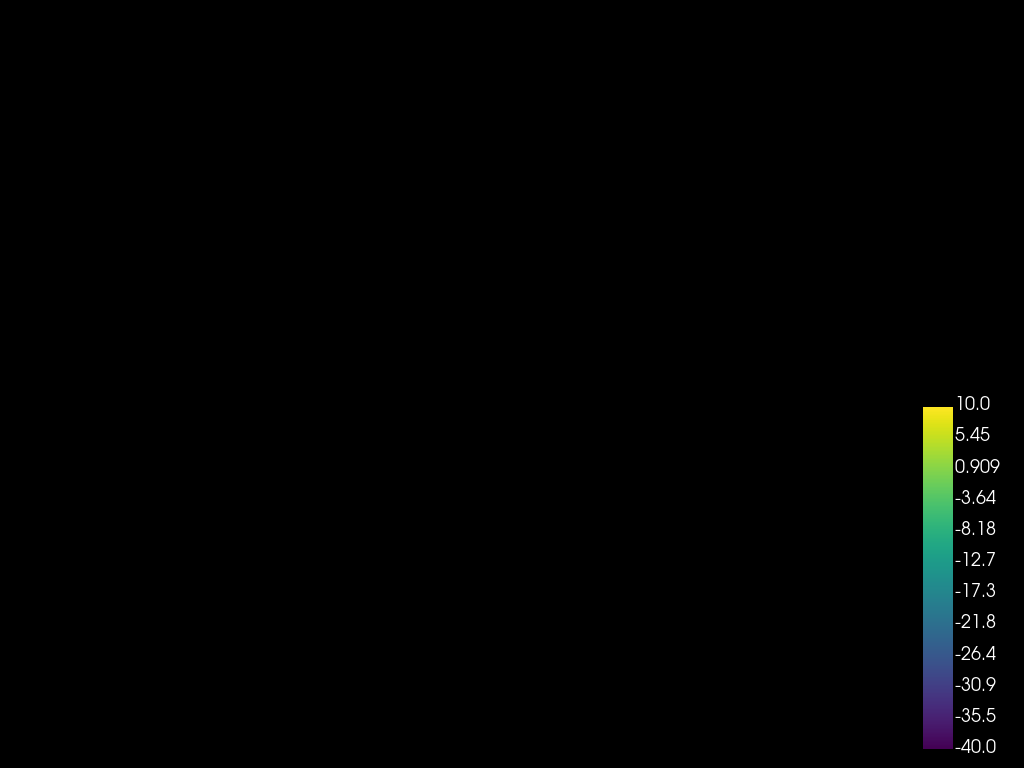

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


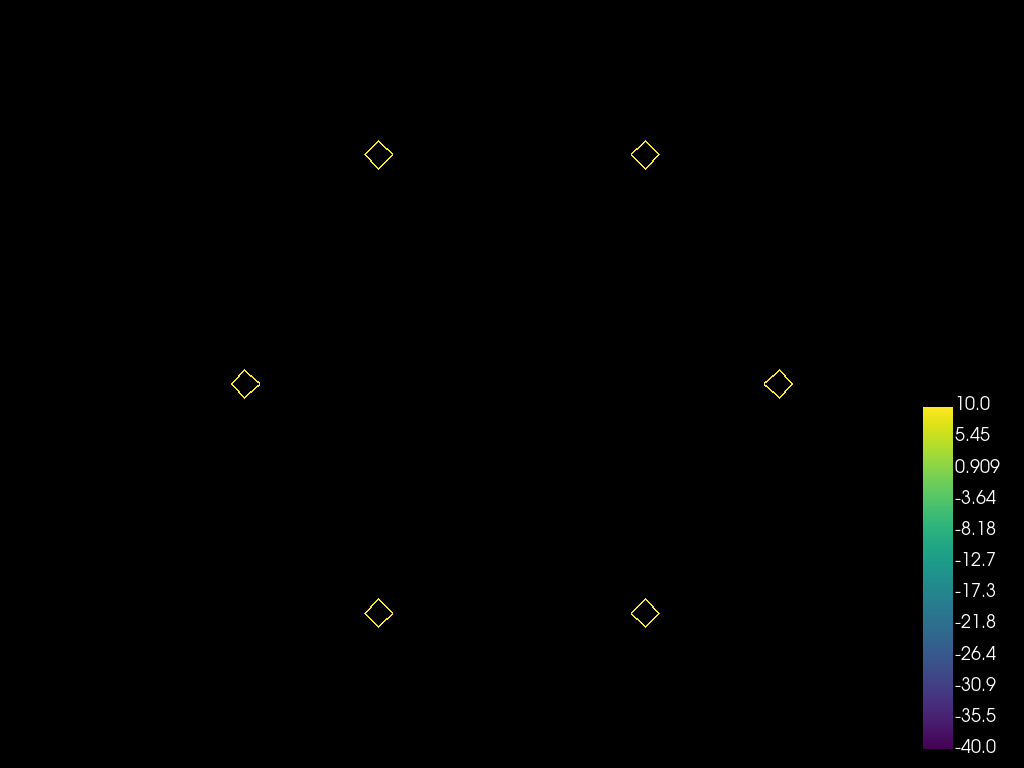

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


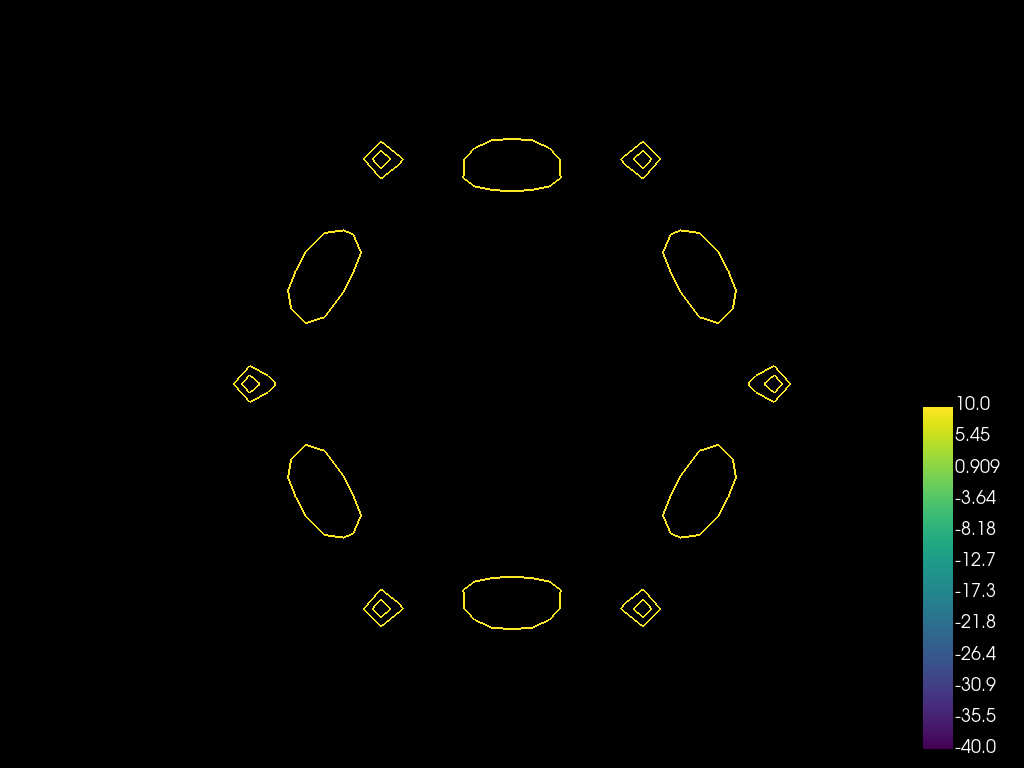

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


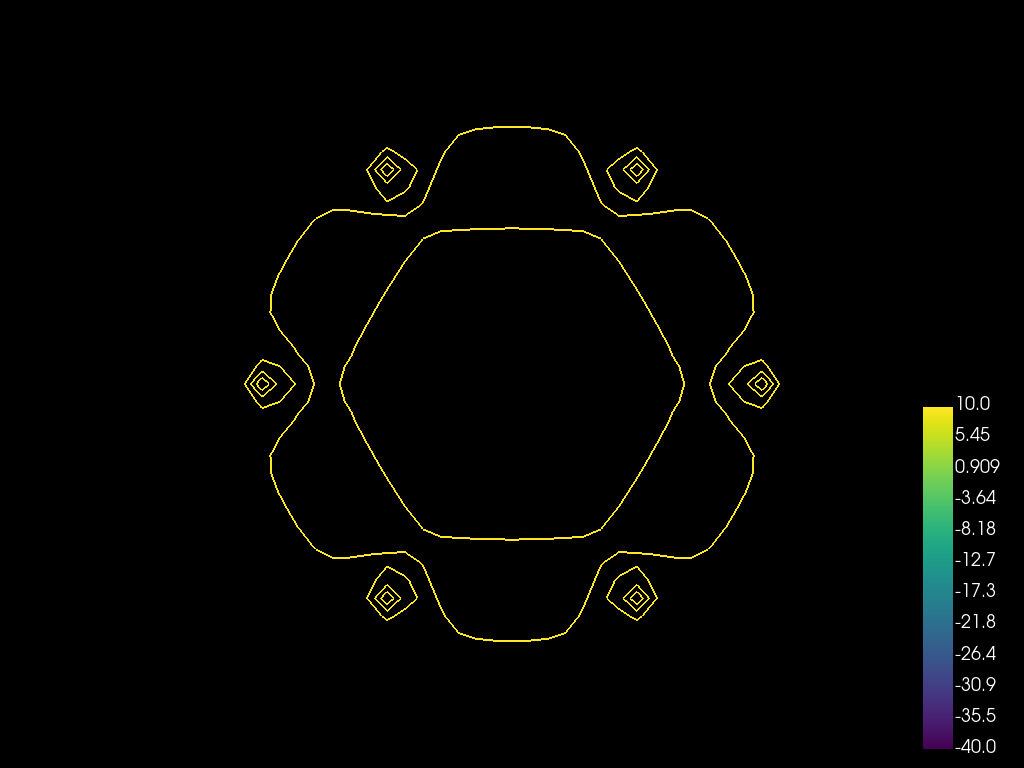

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


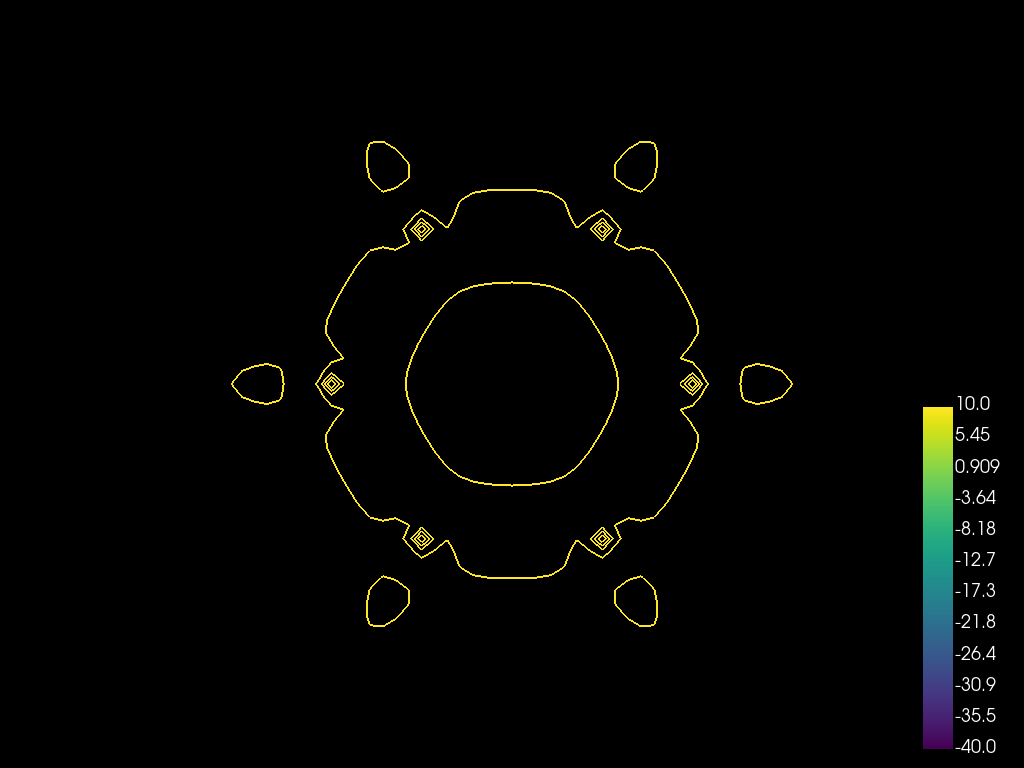

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


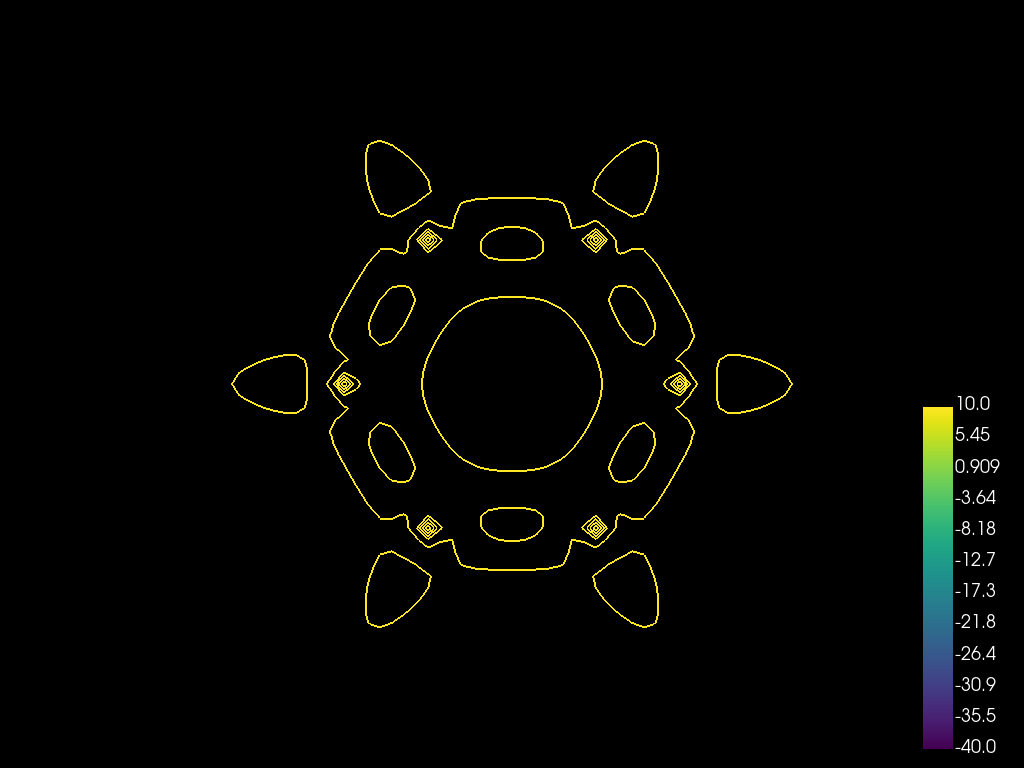

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


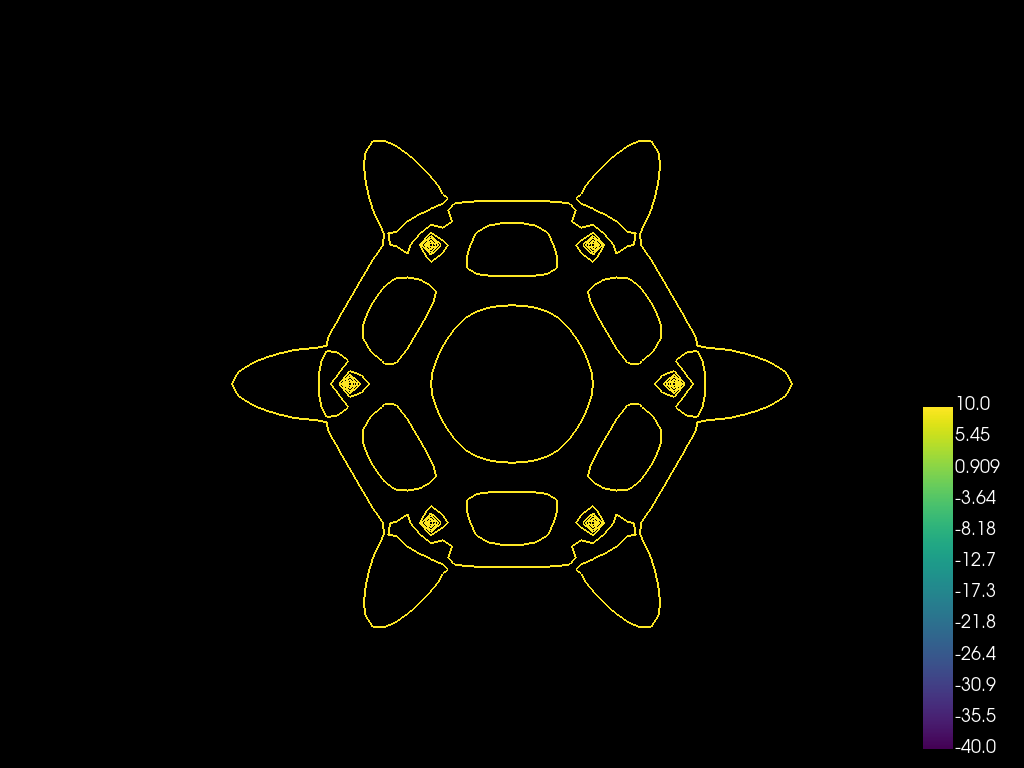

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


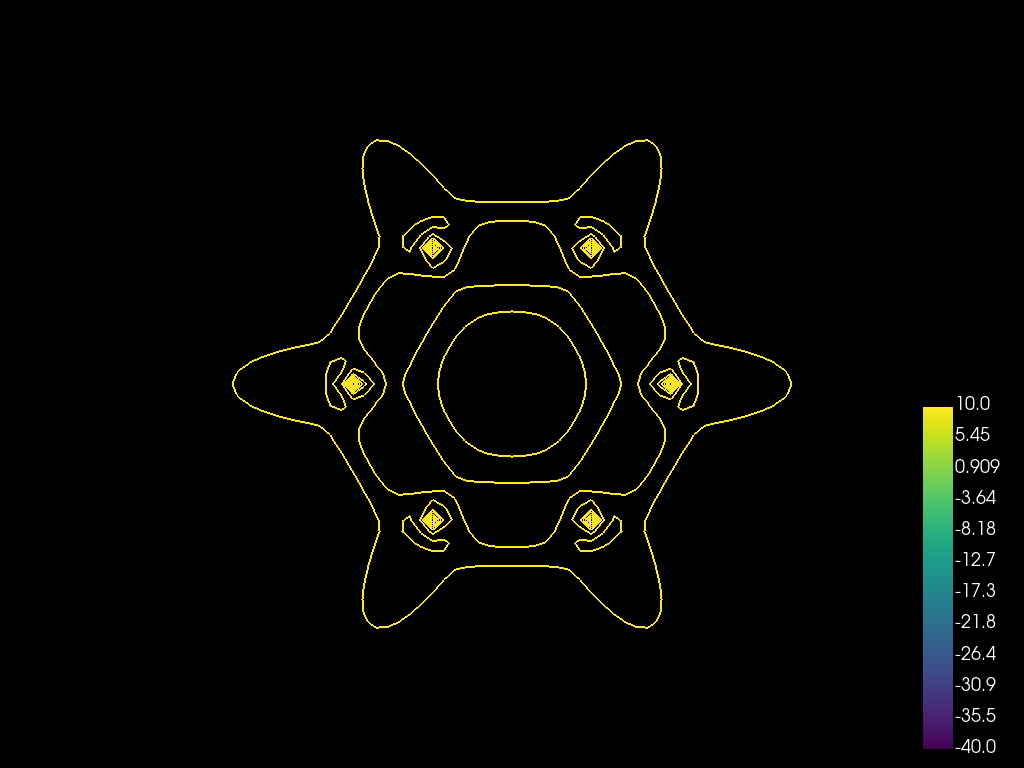

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


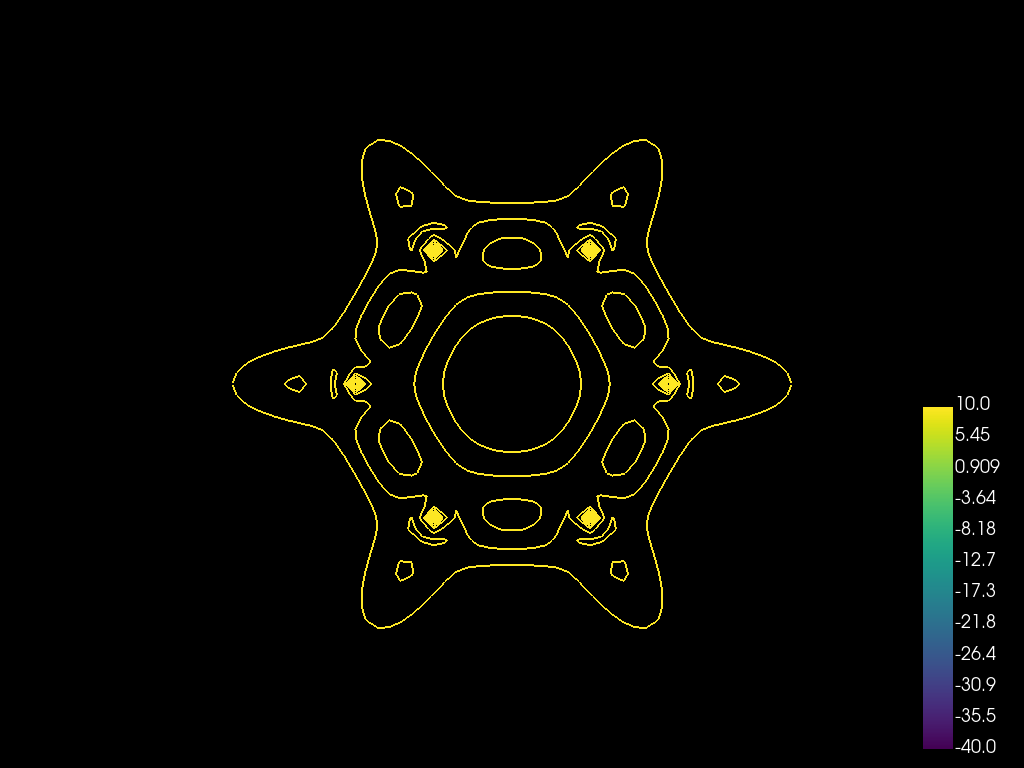

In [32]:
import pyvista as pv
import imageio
images = []

# Obtener los valores actuales de la interfaz
min_color_value = min_color_range_var.get()
max_color_value = max_color_range_var.get()
num_labels = labels_var.get()

# Obtener los límites del dataset para posicionar la luz
bounds = grid.bounds
min_x = bounds[0]  # x-min
# Definir la luz personalizada
light1 = pv.Light(position=(min_x, 0, 0), focal_point=(0, 0, 0), color='white', intensity=1.0)

valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# Iterate through each isosurface value
for i, valor in enumerate(valores_isosurfaces):
    sliced = grid.slice(normal='z')
    # Obtain the vectors of the points on the cut mesh      
    vectors = sliced.point_data['vectors']
    # Calculate the magnitude of these vectors
    magnitudes = np.linalg.norm(vectors, axis=1)
    # We assign the magnitude data to the cut mesh
    sliced['magnitudes'] = magnitudes
    # We generate the isosurface representing the points of equal magnitude
    contornos = sliced.contour(isosurfaces=valor, scalars='magnitudes')
    p = pv.Plotter()
    
    sargs = dict(
        n_labels=num_labels,
        vertical = not orientation_var.get() == 'H',
        color = 'w')
    
    p.set_background('k')
    p.add_mesh(contornos, show_scalar_bar=False, line_width=2,clim=(min_color_value, max_color_value))
    p.add_light(light1)
    p.add_scalar_bar(**sargs)
    p.camera_position = (0,0,1)
    p.show(auto_close=False)
    img = p.screenshot()
    images.append(img)
    p.close()
# Crear el GIF
imageio.mimsave('isosurfaces_evolution_MagnitudesZ.gif', images, fps=2)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


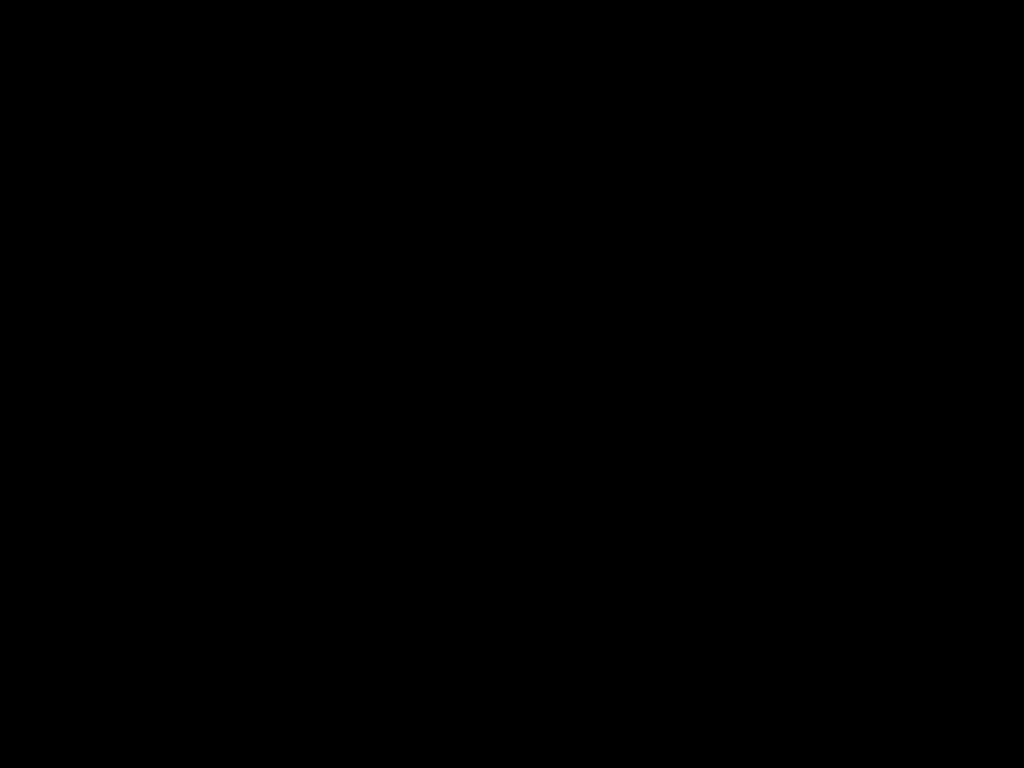

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


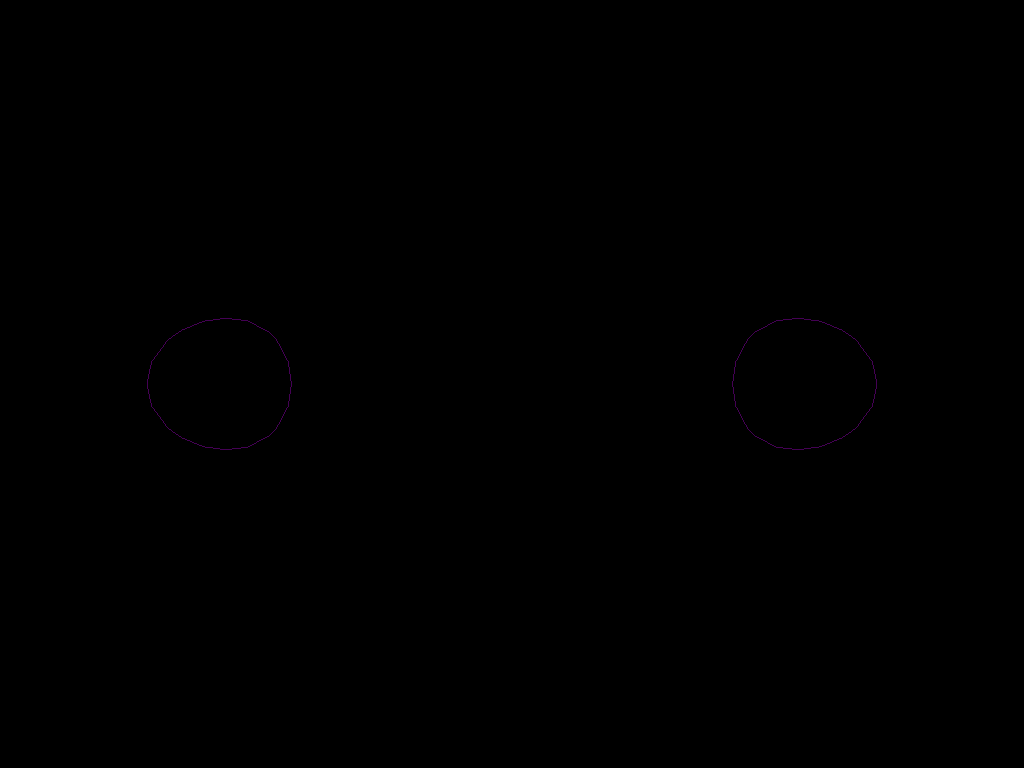

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


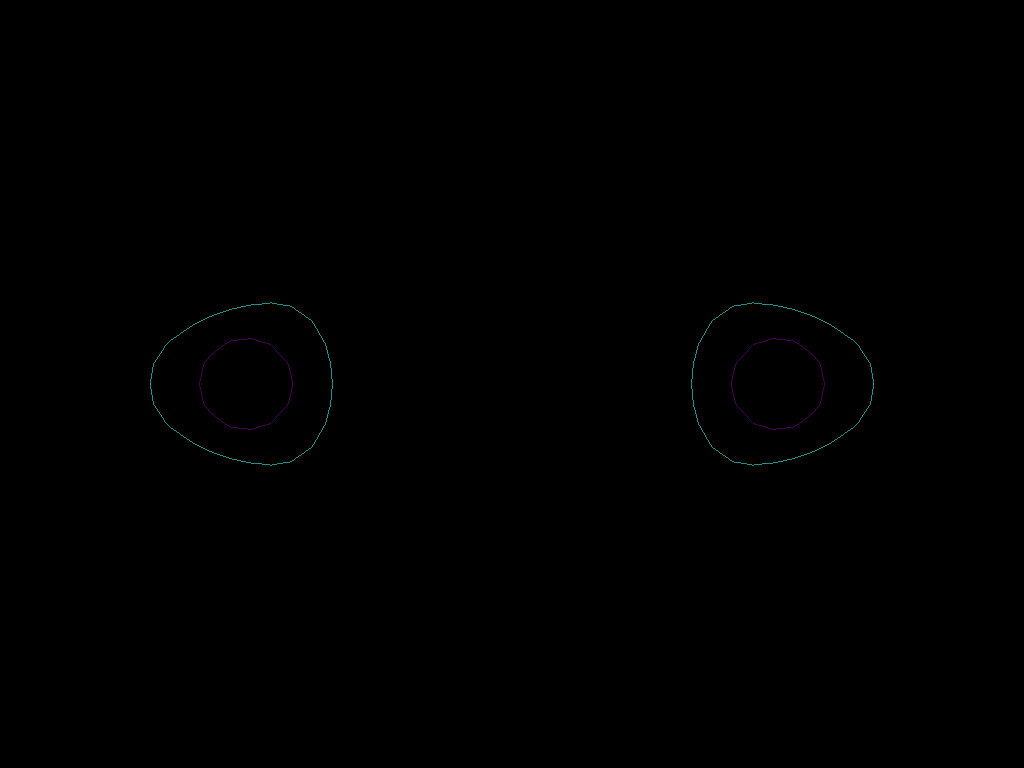

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


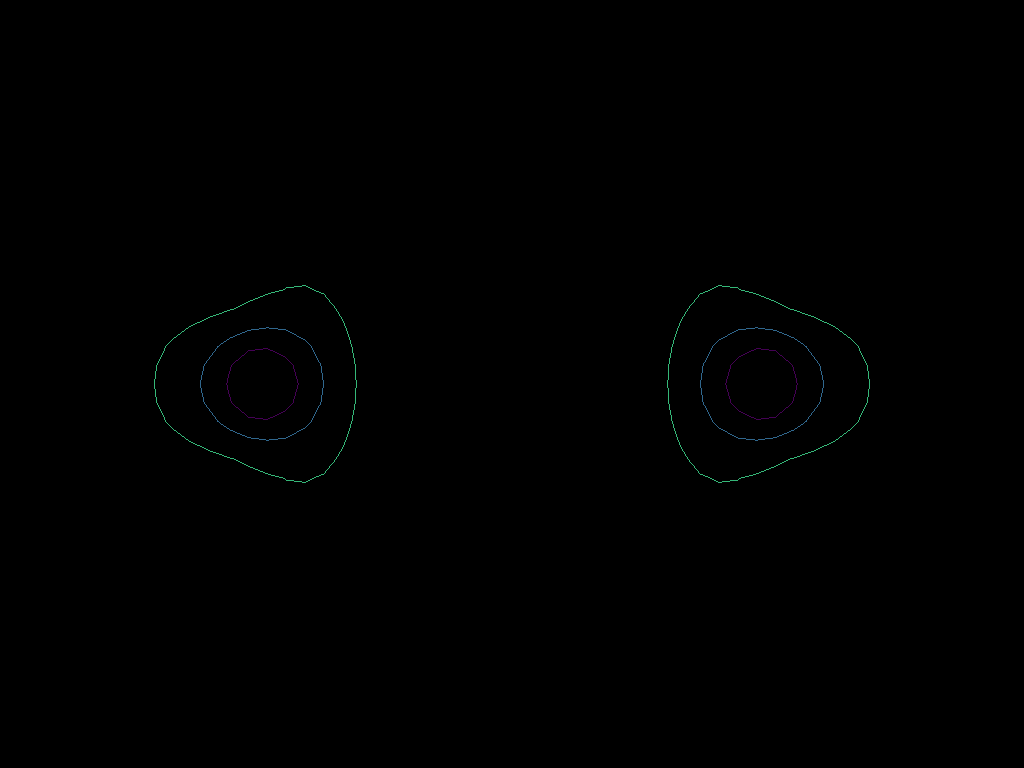

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


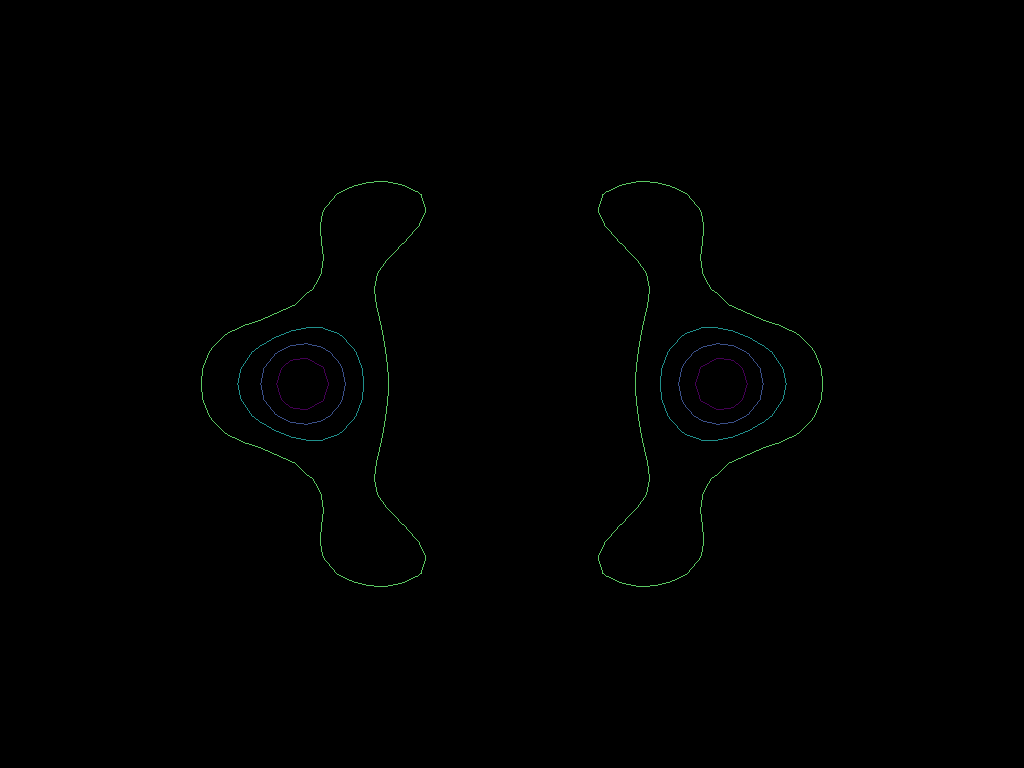

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


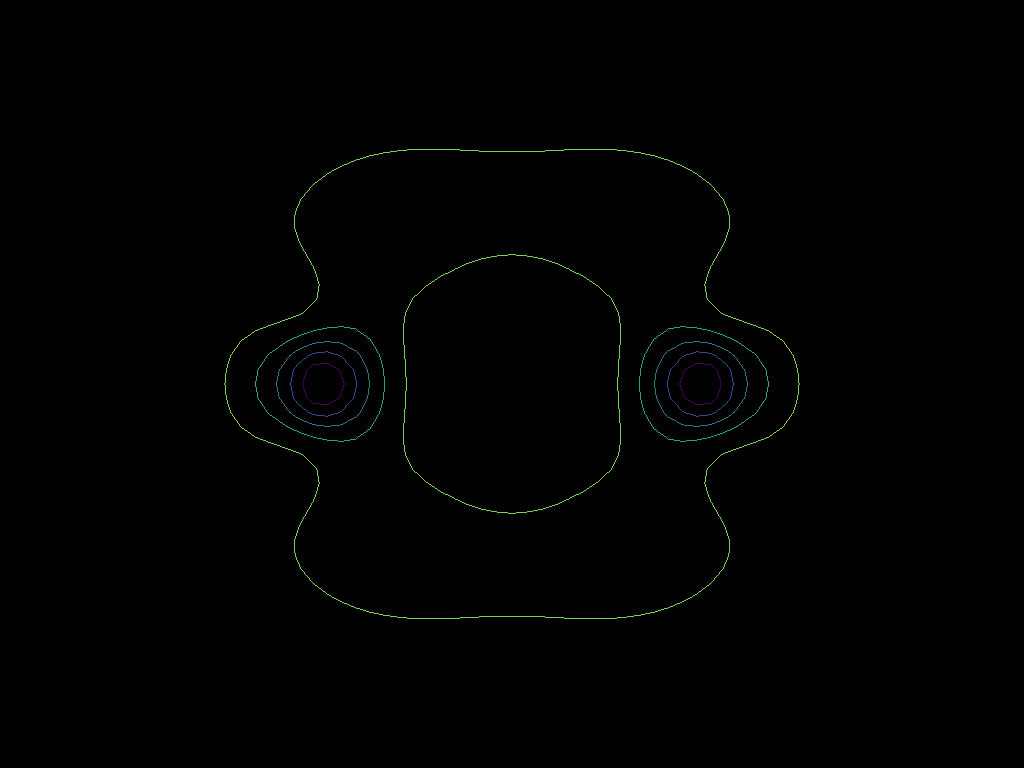

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


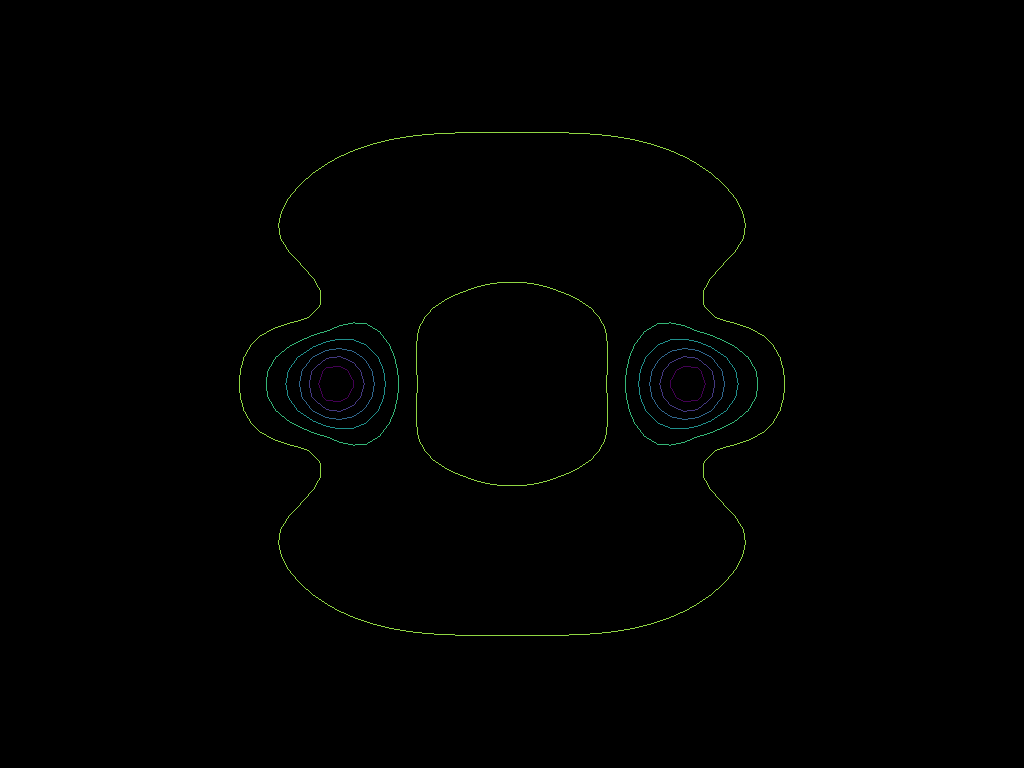

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


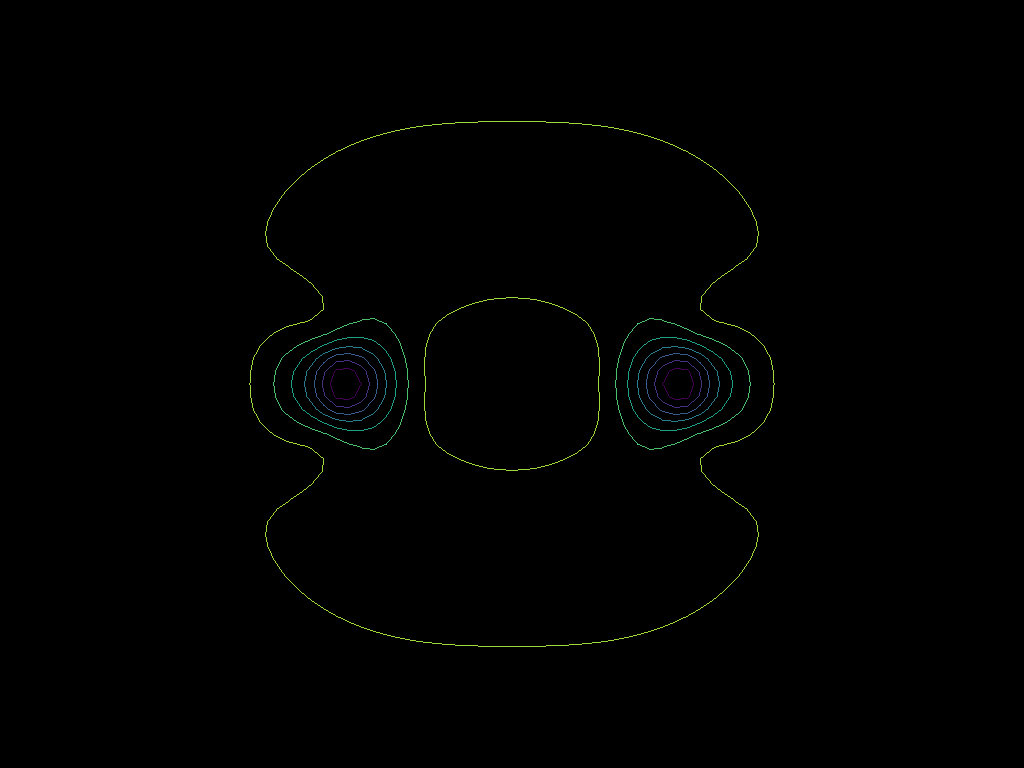

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


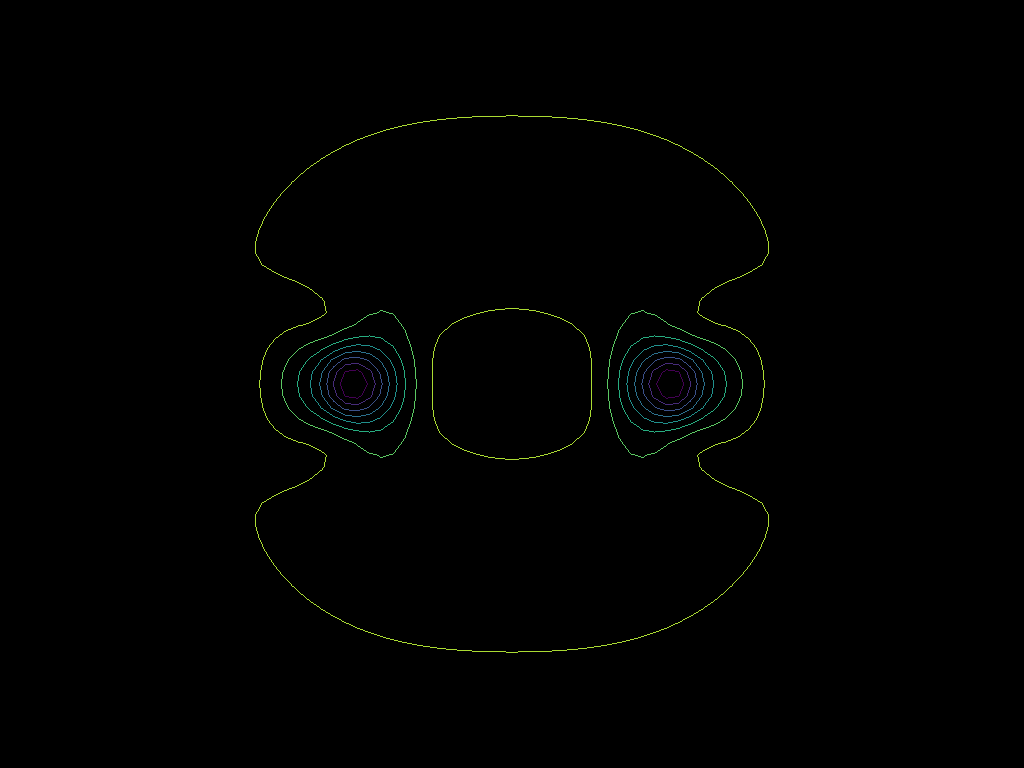

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


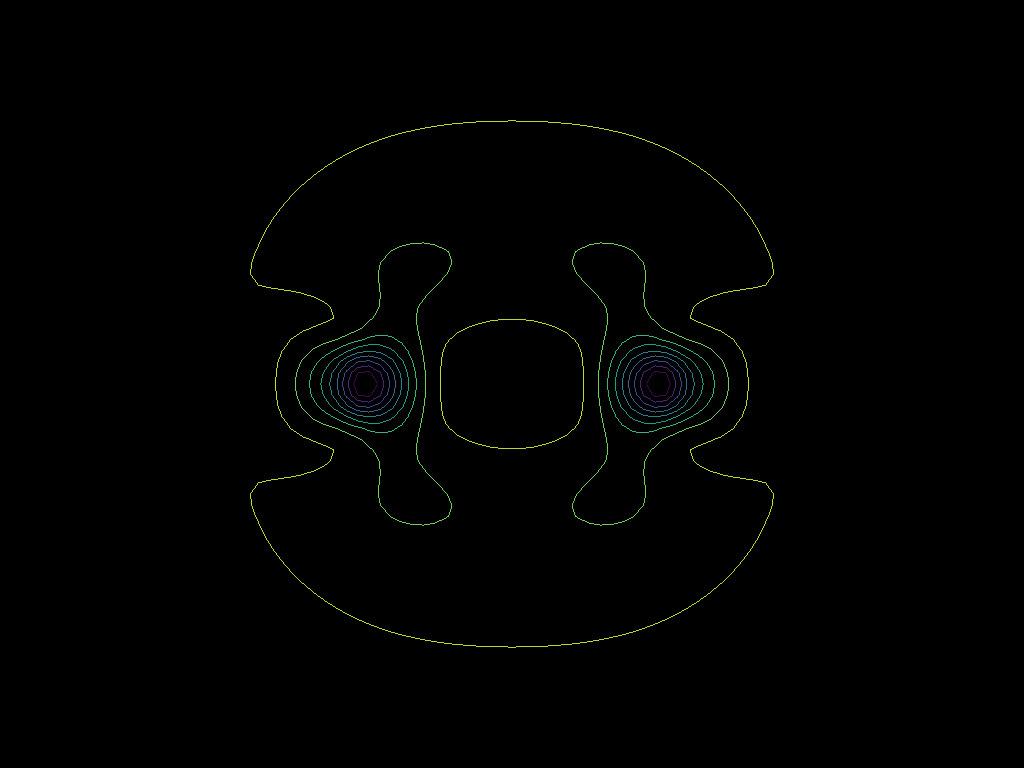

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


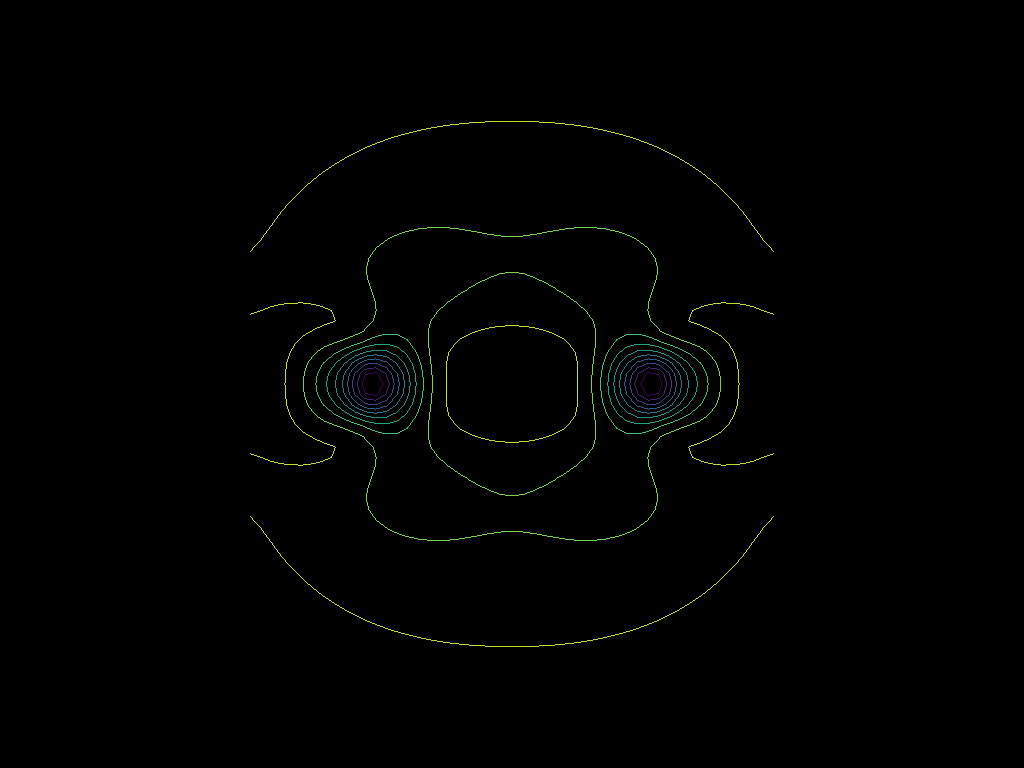

In [33]:
images = []
# Aplicar filtro gaussiano a los datos escalares
suavizado = leer.gaussian_smooth(std_dev=1.0, radius_factor=2.0)

# Definir valores para isosurfaces
valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for valor in valores_isosurfaces:
    # Crear una rebanada y contornos en los datos suavizados
    rebanada_y = suavizado.slice(normal='x')
    contornos = rebanada_y.contour(isosurfaces=valor)
    
    # Inicializar y configurar el Plotter
    p = pv.Plotter()
    p.add_mesh(contornos, show_scalar_bar=False)
    p.camera_position = (1, 0, 0)
    p.set_background('k')
    p.show(auto_close=False)
    img = p.screenshot()
    images.append(img)
    p.close()
    
imageio.mimsave('isosurfaces_evolution_FiltroGaussianX.gif', images, fps=2)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


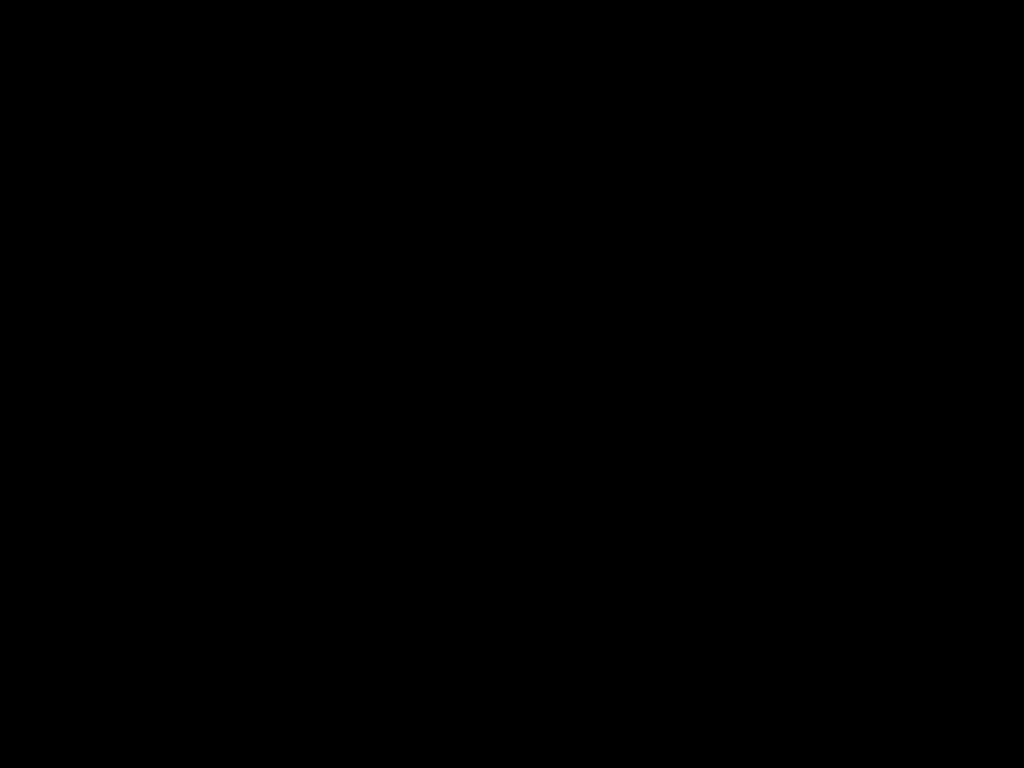

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


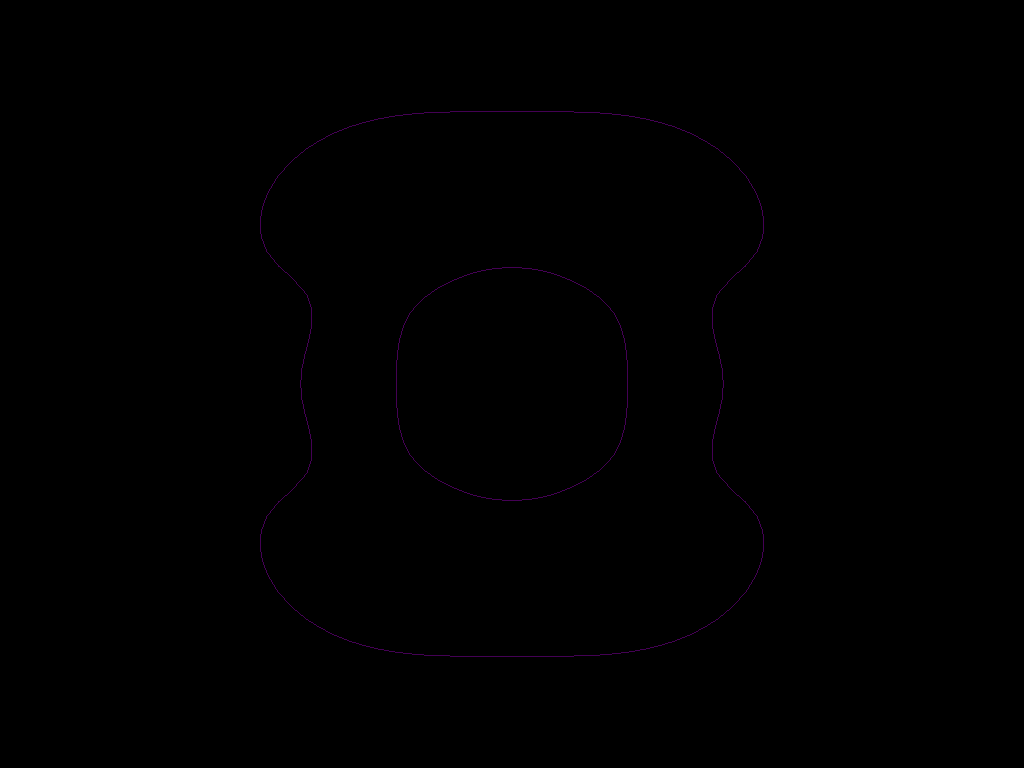

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


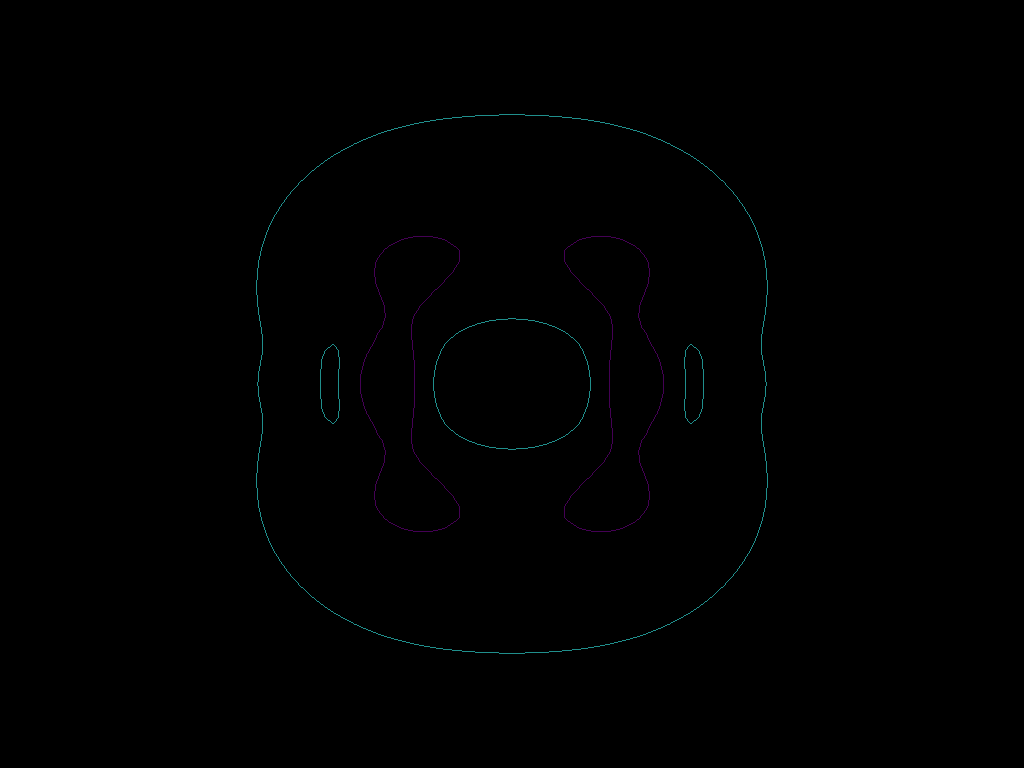

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


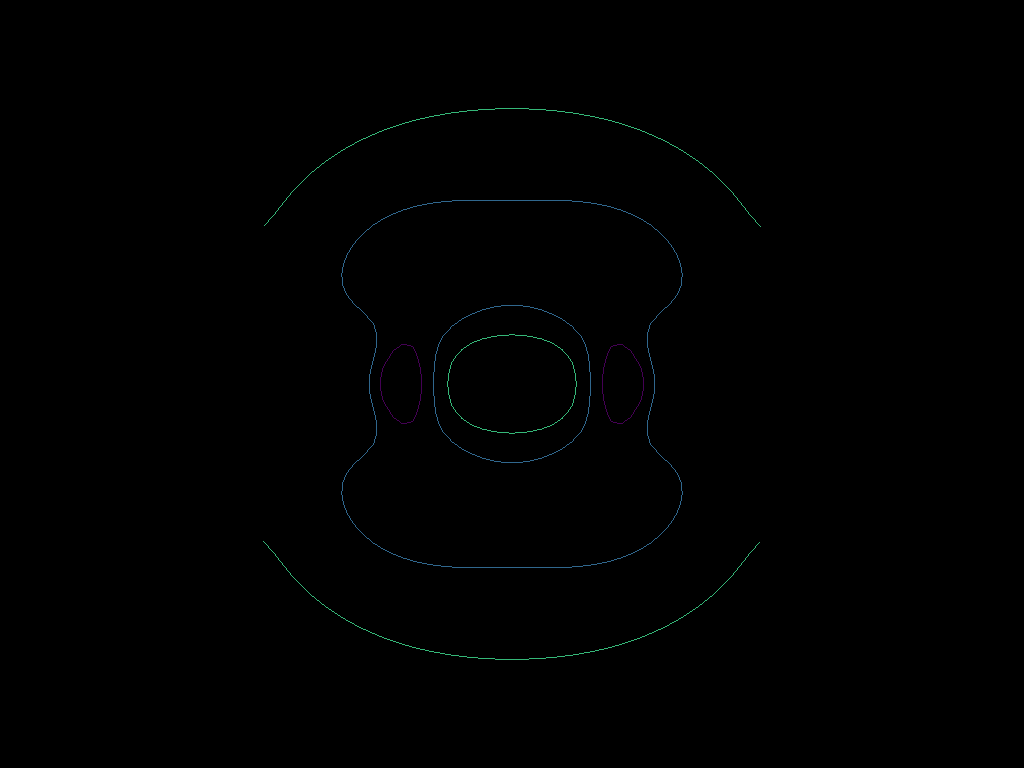

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


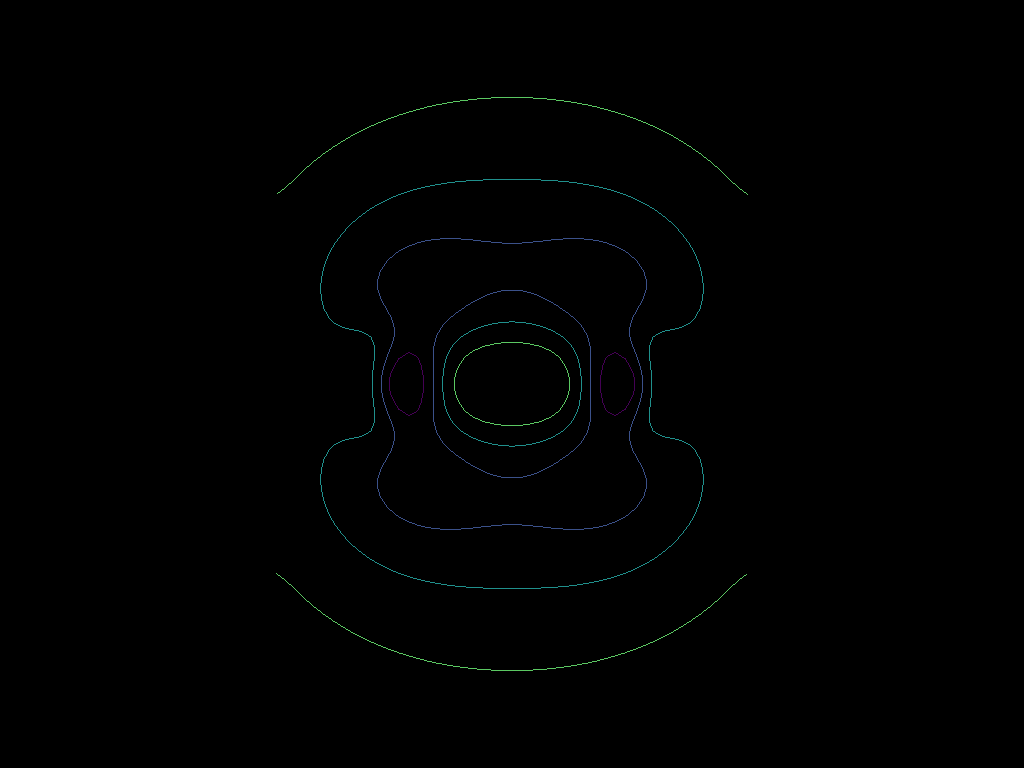

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


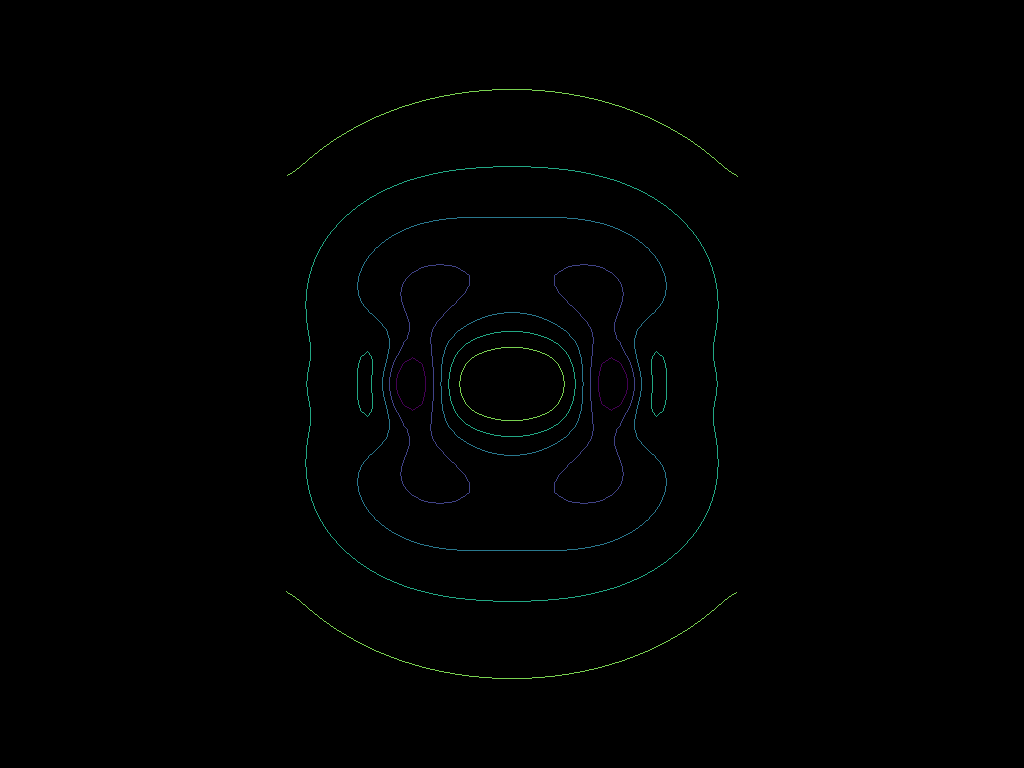

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


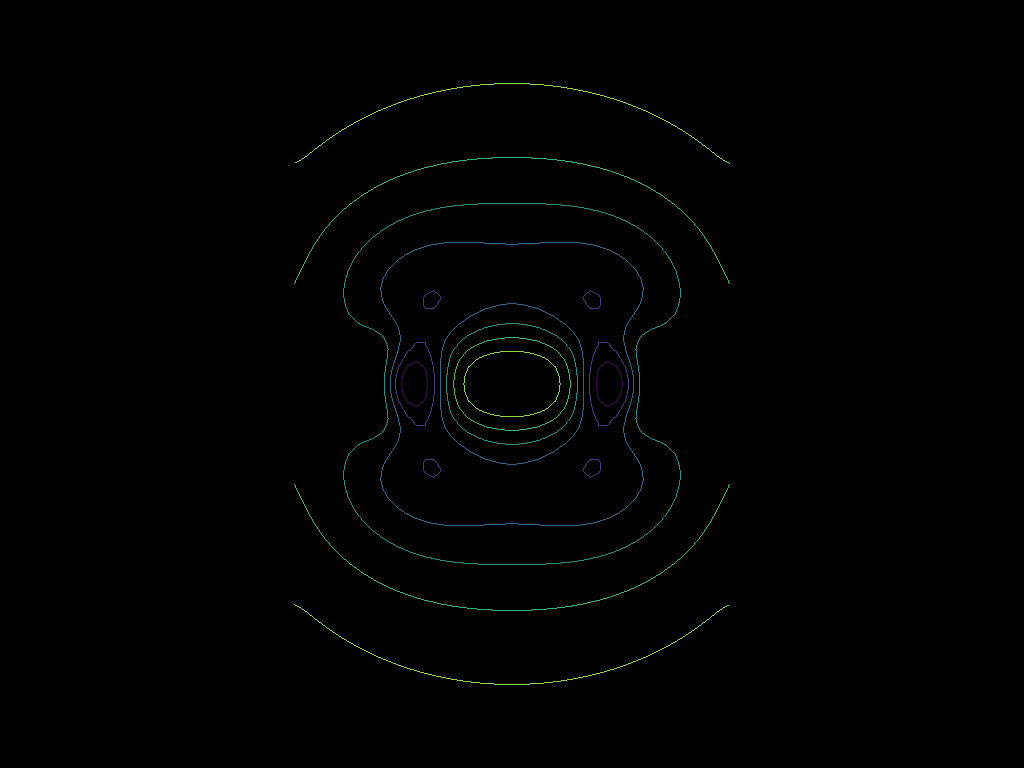

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


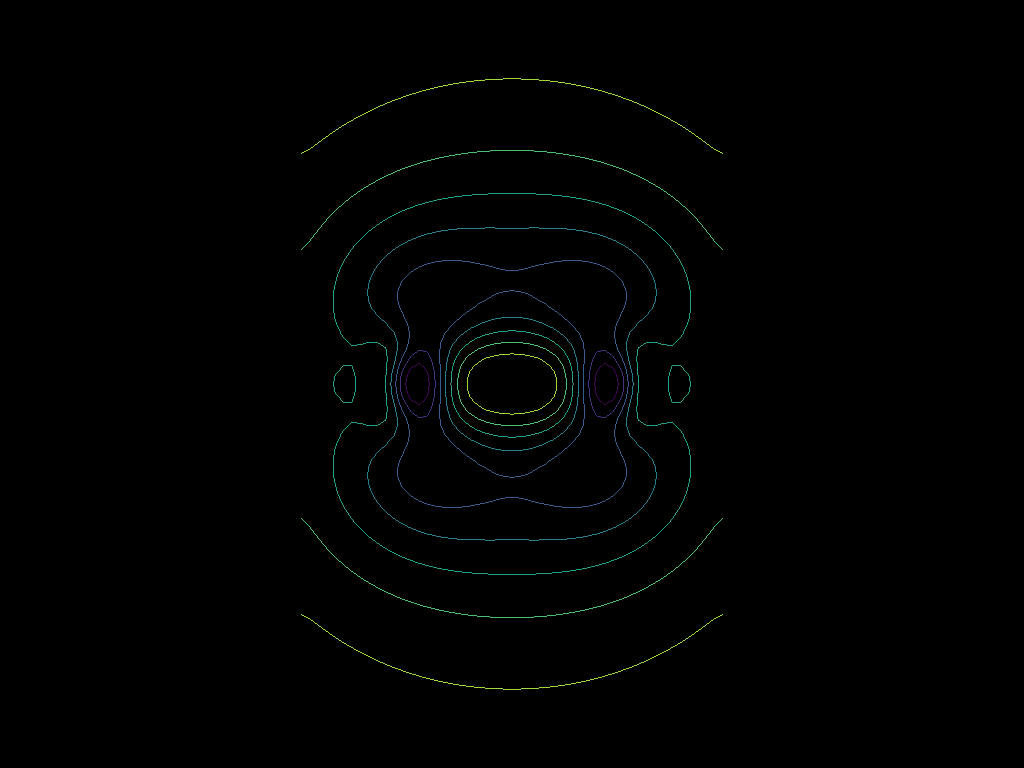

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


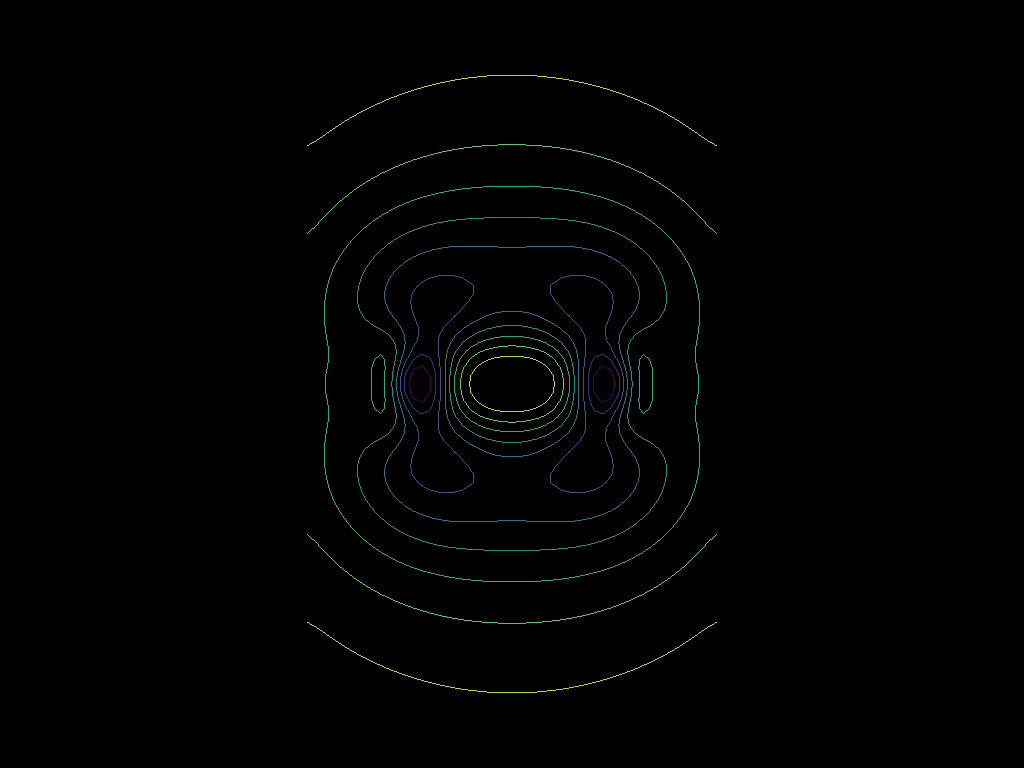

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


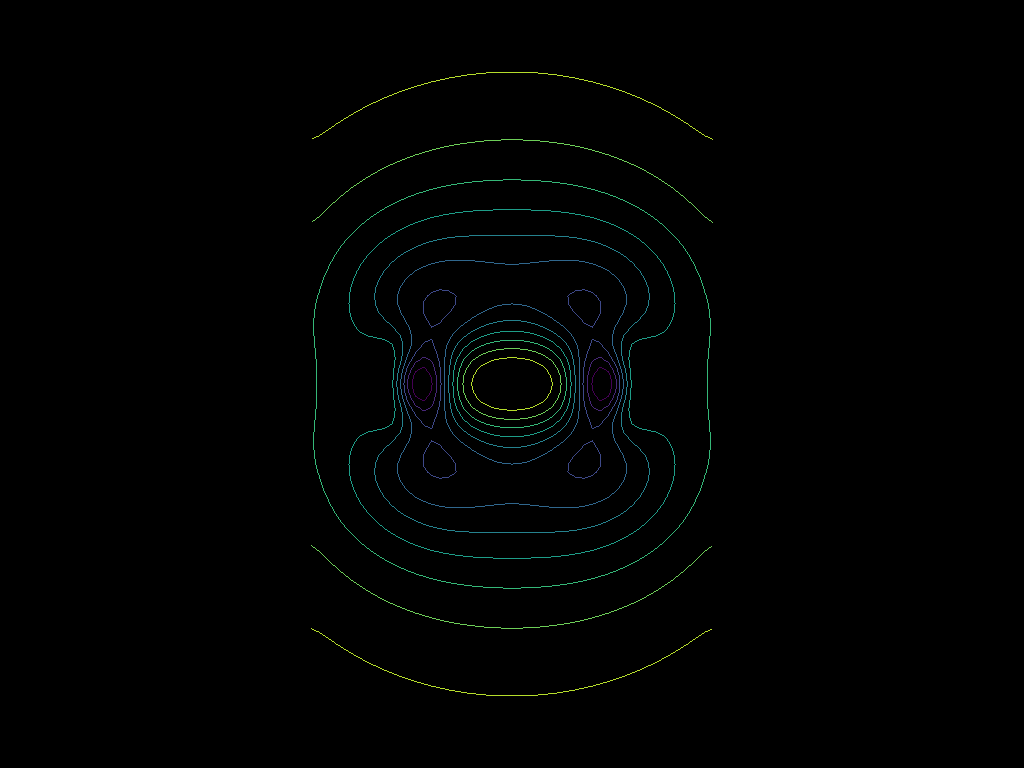

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


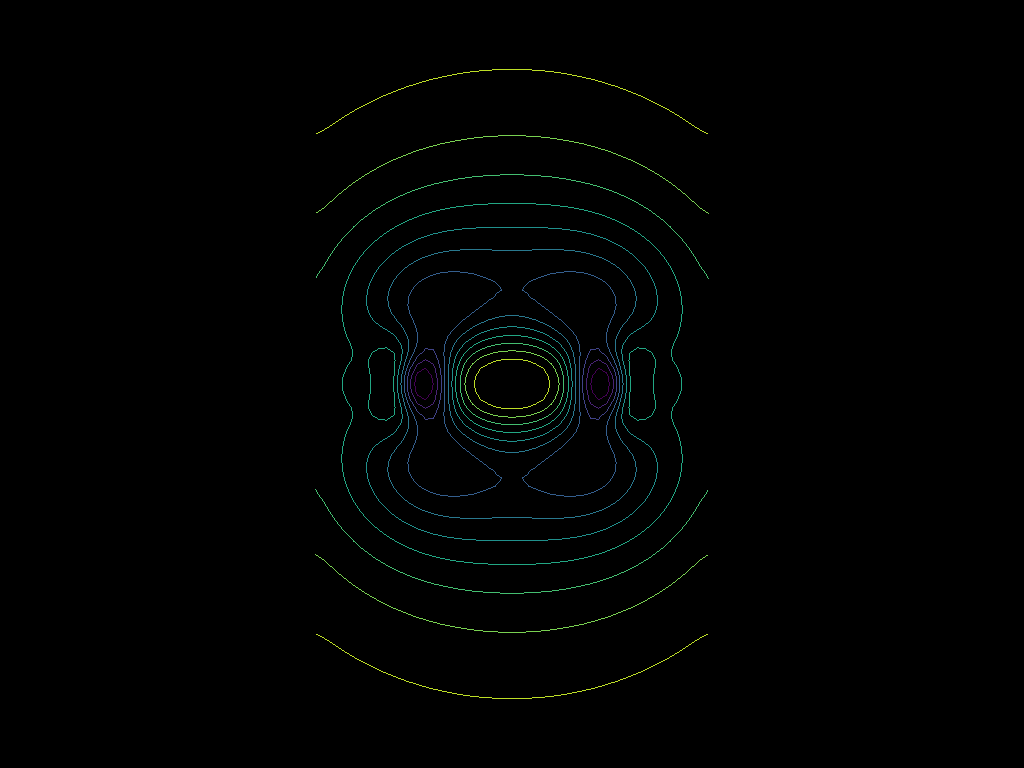

In [34]:
images = []
# Aplicar filtro gaussiano a los datos escalares
suavizado = leer.gaussian_smooth(std_dev=1.0, radius_factor=2.0)

# Definir valores para isosurfaces
valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for valor in valores_isosurfaces:
    # Crear una rebanada y contornos en los datos suavizados
    rebanada_y = suavizado.slice(normal='y')
    contornos = rebanada_y.contour(isosurfaces=valor)
    
    # Inicializar y configurar el Plotter
    p = pv.Plotter()
    p.add_mesh(contornos, show_scalar_bar=False)
    p.camera_position = (0, 1, 0)
    p.set_background('k')
    p.show(auto_close=False)
    img = p.screenshot()
    images.append(img)
    p.close()
    
imageio.mimsave('isosurfaces_evolution_FiltroGaussianY.gif', images, fps=2)

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


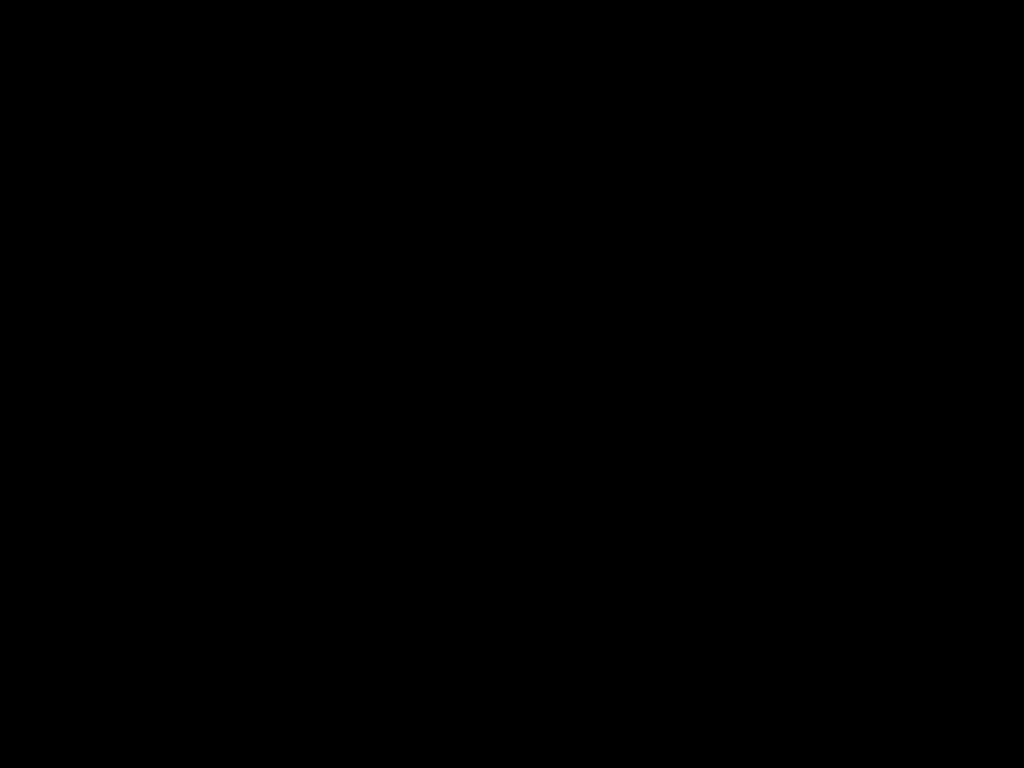

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


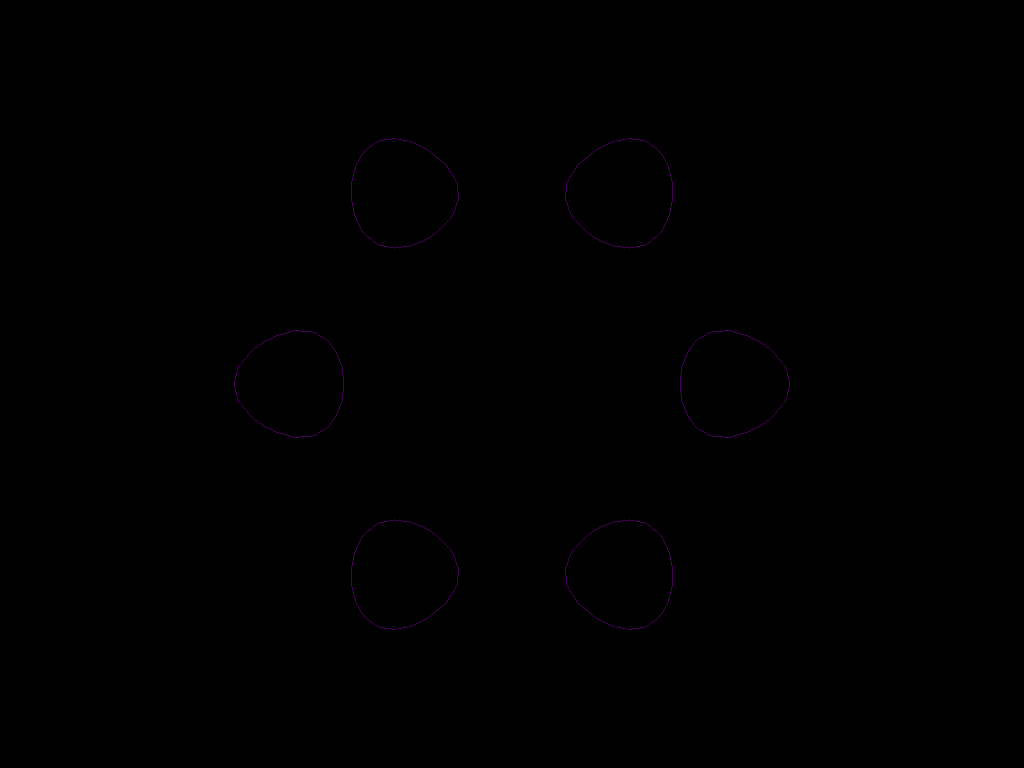

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


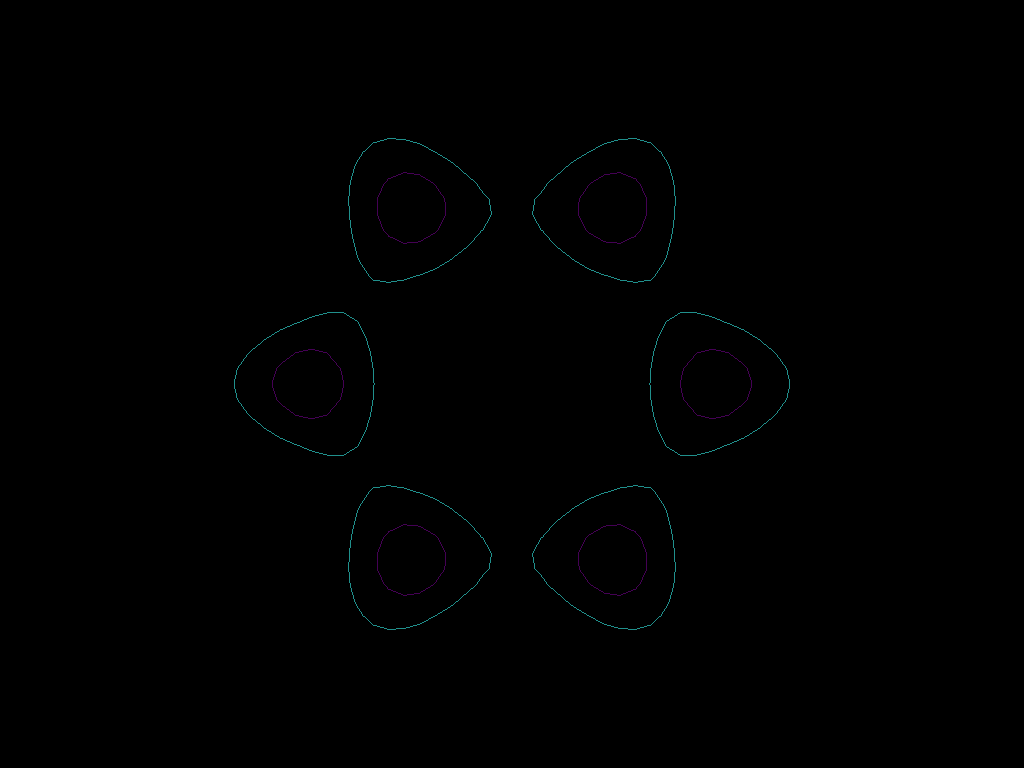

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


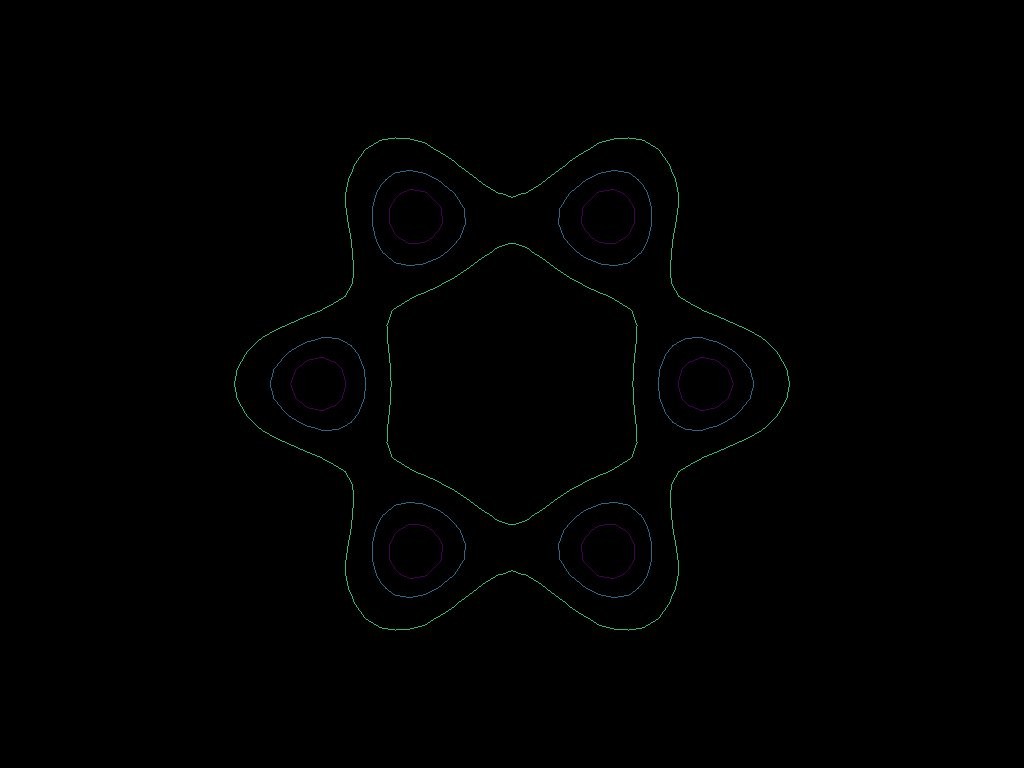

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


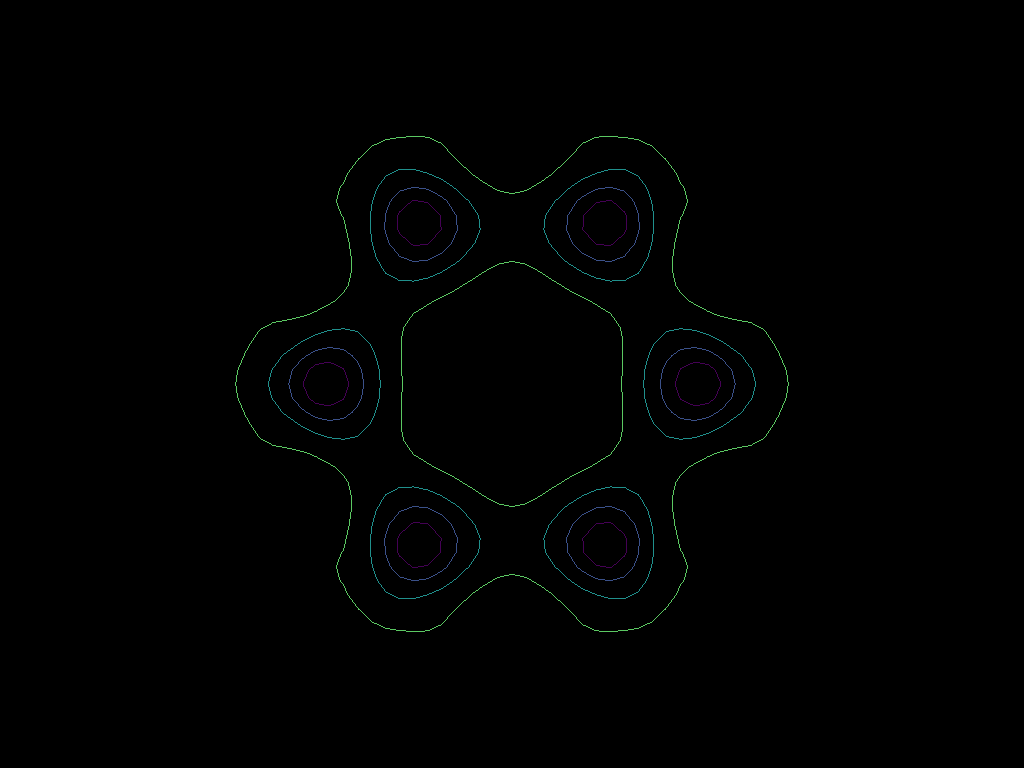

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


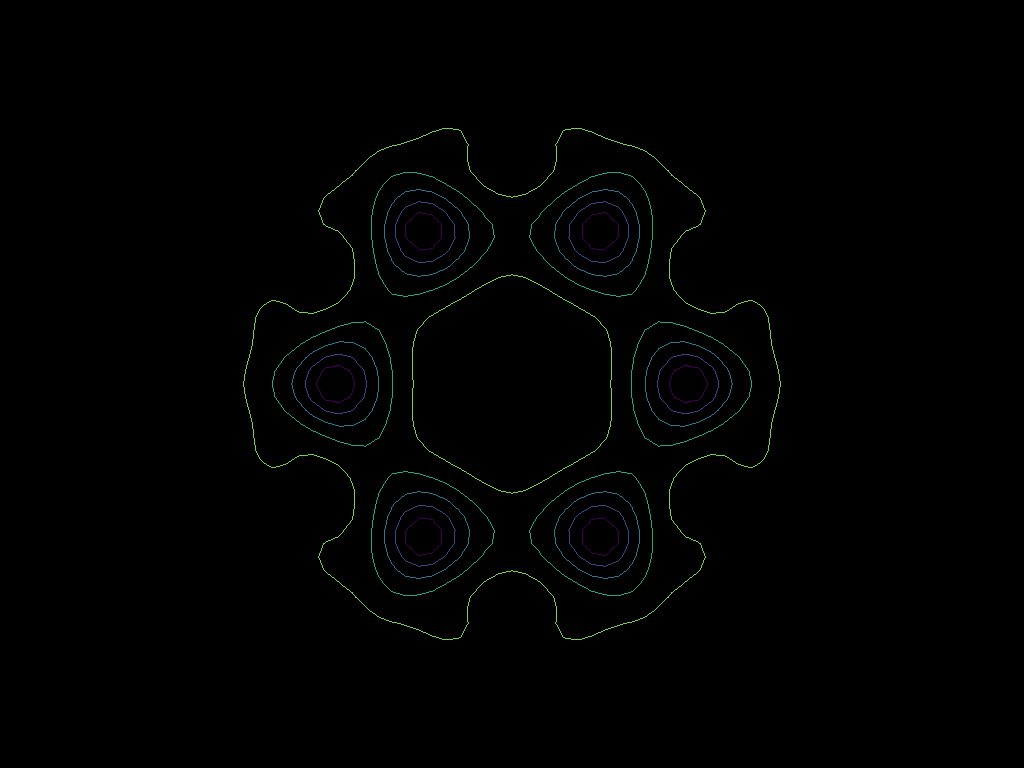

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


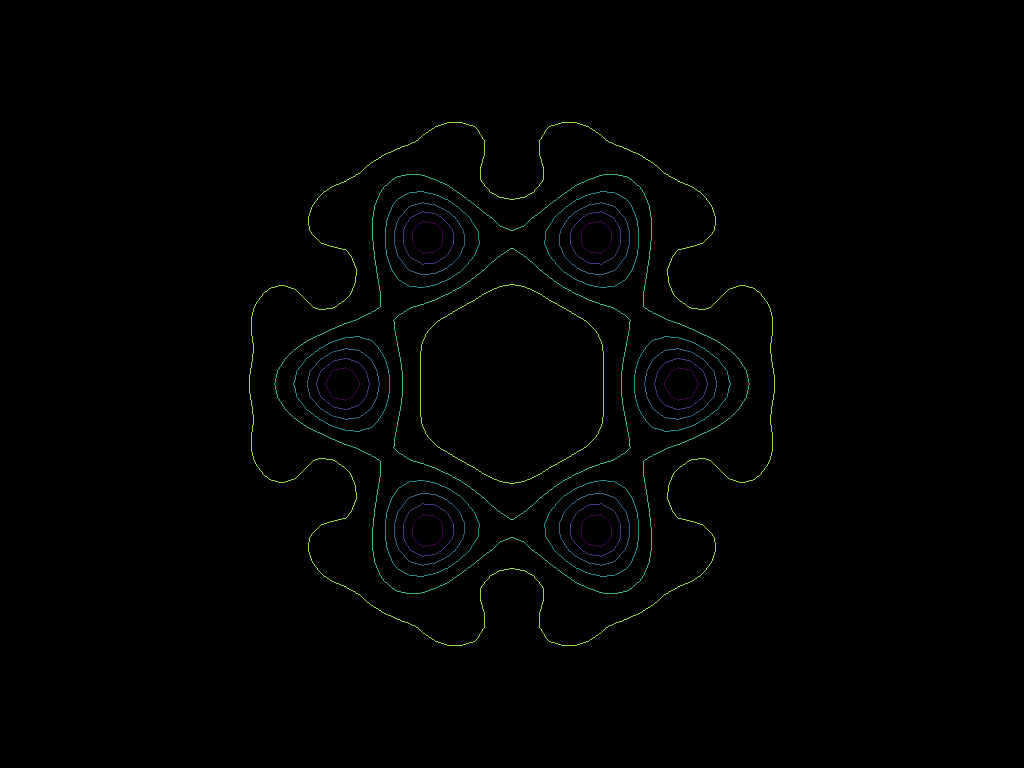

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


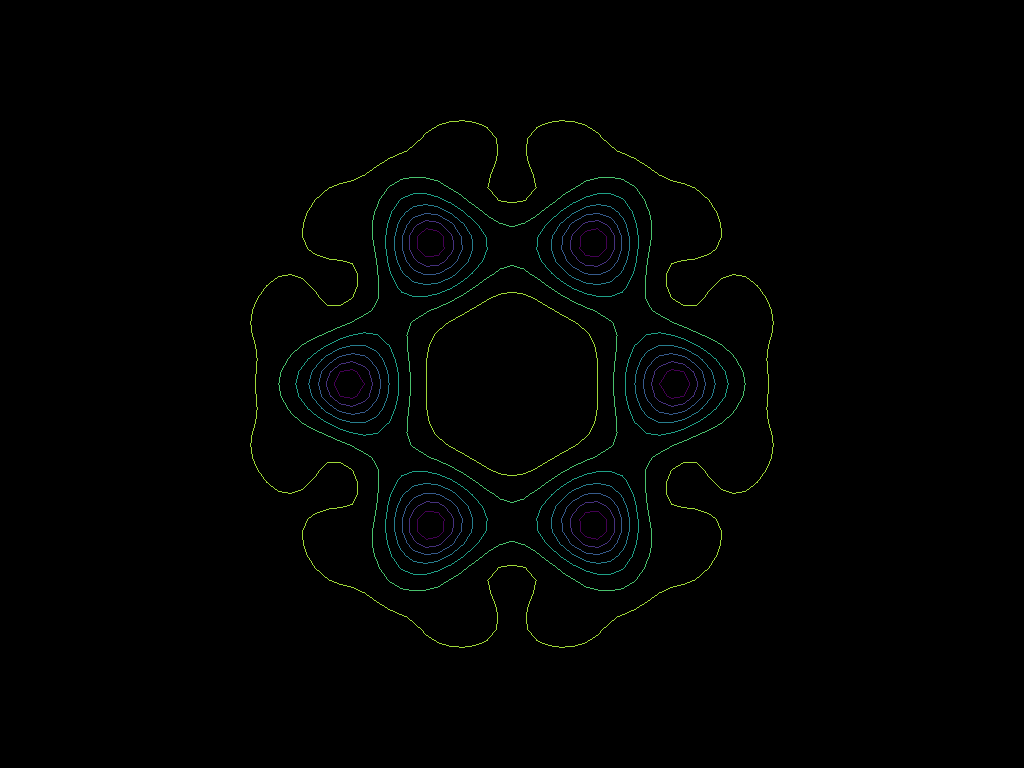

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


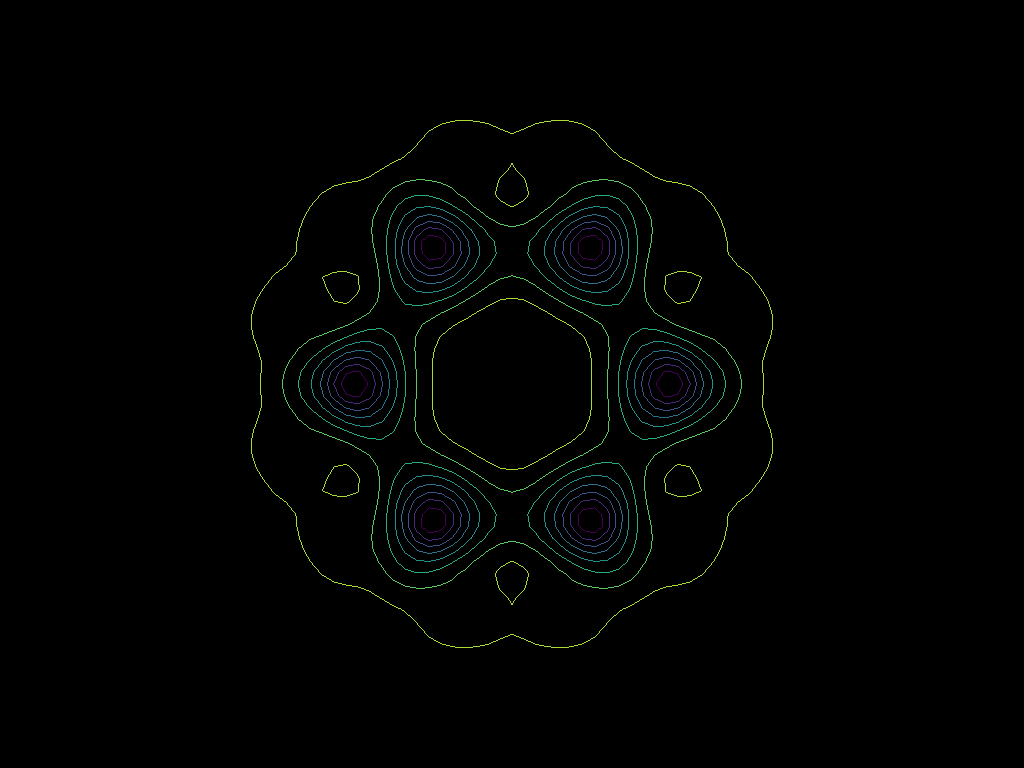

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


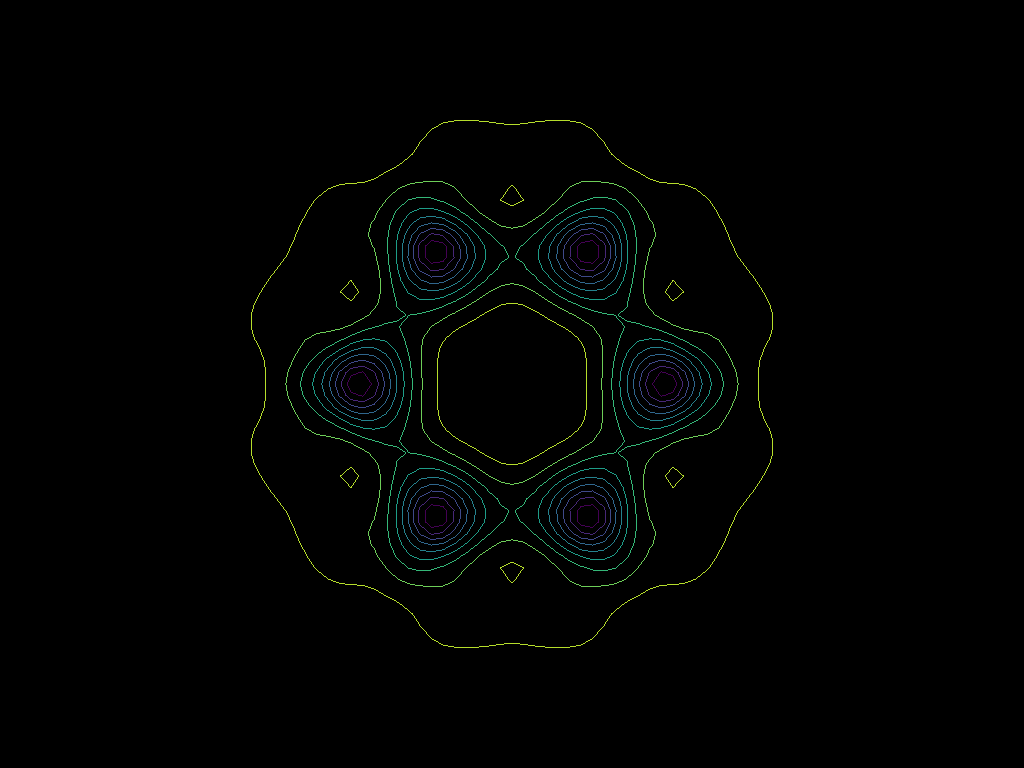

C:\Users\Elias\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


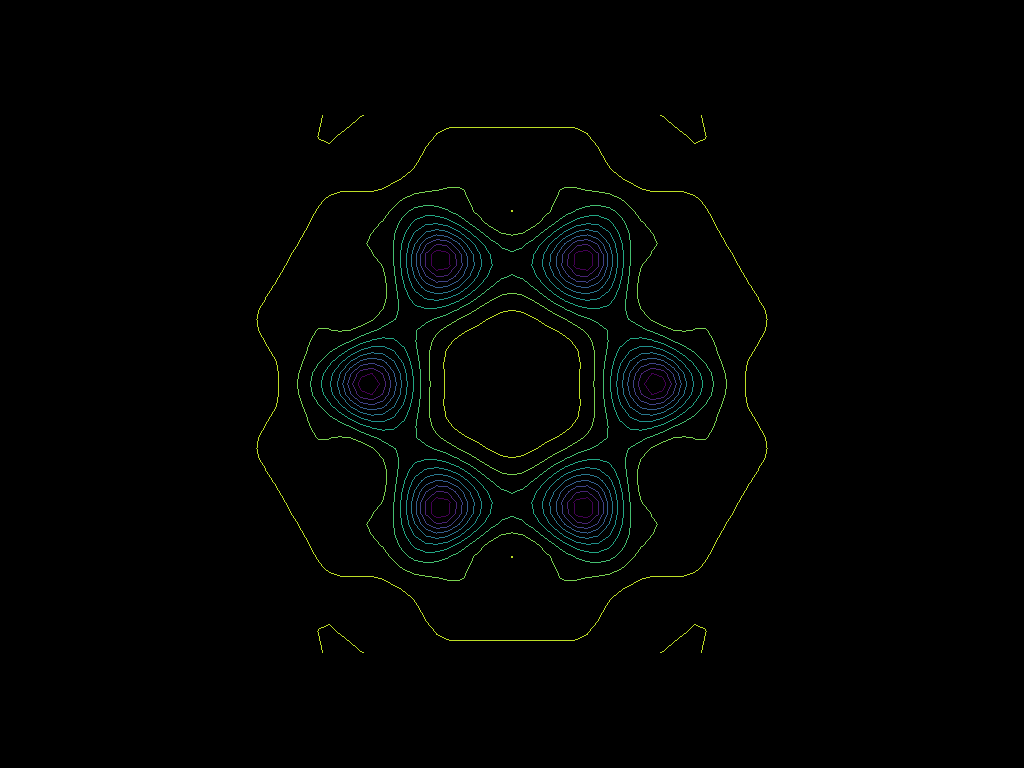

In [35]:
images = []
# Aplicar filtro gaussiano a los datos escalares
suavizado = leer.gaussian_smooth(std_dev=1.0, radius_factor=2.0)

# Definir valores para isosurfaces
valores_isosurfaces = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for valor in valores_isosurfaces:
    # Crear una rebanada y contornos en los datos suavizados
    rebanada_y = suavizado.slice(normal='z')
    contornos = rebanada_y.contour(isosurfaces=valor)
    
    # Inicializar y configurar el Plotter
    p = pv.Plotter()
    p.add_mesh(contornos, show_scalar_bar=False)
    p.camera_position = (0, 0, 1)
    p.set_background('k')
    p.show(auto_close=False)
    img = p.screenshot()
    images.append(img)
    p.close()
    
imageio.mimsave('isosurfaces_evolution_FiltroGaussianZ.gif', images, fps=2)

In [36]:
all_images_exist = all(os.path.exists(imagen) for imagen in imagenes_generadas)

if all_images_exist:
    # Here we are using tkMessageBox to display an information dialogue box.
    tk.messagebox.showinfo("Éxito", "Todas las imágenes se han generado y guardado correctamente.")
else:
    tk.messagebox.showerror("Error", "No se han generado o guardado correctamente todas las imágenes.")

In [37]:
def load_and_visualize_vtk(filename, plot_type):
    leer = pv.read(filename)
    contour = leer.contour()
    selected_axis = axis_var.get()
    
    dargs = dict(cmap=cmap_var.get())
    
    p = BackgroundPlotter()
    
    

################ Gráfico Slice interactivo
    if plot_type == "slice":
        
        min_x = leer.bounds[3]
        min_y = leer.bounds[3]
        min_z = leer.bounds[-1]
        
        corte = leer.slice_orthogonal(x=0, y=0, z=0)
        
        y_slice = corte[1]
        y_points = np.array(y_slice.points)
        y_points[:, 1] -= min_y
        y_slice.points = y_points

        z_slice = corte[2]
        z_points = np.array(z_slice.points)
        z_points[:, 2] -= min_z
        z_slice.points = z_points

        x_slice = corte[0]
        x_points = np.array(x_slice.points)
        x_points[:, 0] -= min_x
        x_slice.points = x_points
        
        sargs = dict(
            
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'k')
        
        
        p.add_mesh(corte, show_scalar_bar=False, **dargs)
        p.add_mesh_slice(contour, assign_to_axis=selected_axis, show_scalar_bar=False, **dargs)
        p.add_scalar_bar(**sargs)    
            
            
            
    ################### Segundo gráfico interactivo ################    
    elif plot_type == "clip":
        
        sargs = dict(
            
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'k')
        
        p.add_mesh_clip_box(contour, opacity=0.9, show_scalar_bar=False, **dargs)
        p.add_scalar_bar(**sargs)
            
    ################### Tercer gráfico###########
    elif plot_type == "contorno(isolineas)":
        
        sargs = dict(
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'k')
        
        p.add_mesh_slice(contour, assign_to_axis=selected_axis, show_scalar_bar=False, **dargs)
        p.add_scalar_bar(**sargs)
############################################################################################################
    elif plot_type == "combined_mesh":
        slic = leer.slice(normal=selected_axis)
        contornos = slic.contour(isosurfaces=12)
        combined_mesh = contornos + contour
        
        sargs = dict(
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'k')
        
        p.add_mesh_clip_box(combined_mesh, **dargs, show_scalar_bar=False, line_width=5)
        p.add_scalar_bar(**sargs)
                
        
###############################################################################################################
    elif plot_type == "mitad con contorno":
        qual = contour.compute_cell_quality()
        oclipped = qual.clip(normal=selected_axis, invert=False)
        
        single_slic = leer.slice(normal=selected_axis)
        contours = single_slic.contour()
        
        combined_mesh = oclipped + contours
        
        sargs = dict(
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'k')
        
        
        p.add_mesh_clip_box(combined_mesh, show_edges=True, show_scalar_bar=False, **dargs, line_width=5)
        p.add_scalar_bar(**sargs)    
 #####################################################################################################   
    elif plot_type == "Current VTK":
        contorno = leer.contour()
        vectors = np.vstack(
            (
                np.cos(contorno.points[:, 0]),
                np.sin(contorno.points[:, 1]),
                np.cos(contorno.points[:, 2]),
            )
        ).T

        # add and scale
        contorno["vectors"] = vectors * 0.25
        contorno.set_active_vectors("vectors")
        
        sargs = dict(
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'k')
        
        
        p.add_mesh(contorno.glyph(scale="vectors"), show_scalar_bar=False, **dargs)
        p.add_scalar_bar(**sargs)
        
    ###############################################################################################    
    elif plot_type == "Current VTI":
        sliced = leer.slice(normal=selected_axis)
        # Extracts vector data from the sliced grid
        vectors = sliced.point_data['vectors']

        # Calculate the magnitude of the vectors
        magnitudes = np.linalg.norm(vectors, axis=1)

        # Assigns the magnitude data to the sliced grid
        sliced['magnitudes'] = magnitudes

        # Creates glyphs (arrows) representing the vectors
        glyphs = sliced.glyph(orient="vectors", scale=True, factor=0.009)
        
        sargs = dict(
            n_labels=num_labels,
            vertical = not orientation_var.get() == 'H',
            color = 'k')

        p.add_mesh(glyphs, show_scalar_bar=False, **dargs)
        p.add_scalar_bar(**sargs)
        p.camera_position = 'iso'
        
    ##################################################################################################
    p.camera_position = 'iso'
    p.set_background('k')
    p.show_axes()
    p.show_grid()
    p.view_isometric()

def open_vtk_file():
    global file_path
    plot_type = plot_var.get()
    
    if plot_type in ["Current VTI", "Current Orthogonal"]:
        file_path = filedialog.askopenfilename(filetypes=[("VTI files", "*.vti")])
    else:
        file_path = filedialog.askopenfilename(filetypes=[("VTK files", "*.vtk"), ("VTI files", "*.vti")])
    
    if file_path:
        load_and_visualize_vtk(file_path, plot_type)
    
window = tk.Tk()
window.title("Molecular structures viewer")

# Crear un menú desplegable para seleccionar el tipo de gráfico
info_label2 = tk.Label(window, text="Choose chart type")
info_label2.pack(pady=2)

plot_var = tk.StringVar(window)
plot_var.set("slice")
plot_dropdown = ttk.Combobox(window, textvariable=plot_var, values=("slice", "clip","contorno(isolines)","combined_mesh","mitad con contorno","Current VTK","Current VTI"), state="readonly")
plot_dropdown.pack(pady=10)

######################################
# Crear un menú desplegable para seleccionar el colormapl
info_label2.pack(pady=2)

cmap_var = tk.StringVar(window)
cmap_var.set("viridis")
cmap_dropdown = ttk.Combobox(window, textvariable=cmap_var, values=("viridis", "gist_ncar_r", "plasma", "inferno", "magma", "cividis","ocean","rainbow","Greys", "Purples", "Blues"), state="readonly")
cmap_dropdown.pack(pady=10)


# Crear un menú desplegable para seleccionar el eje de corte (solo para el gráfico de corte)
info_labels = tk.Label(window, text="Choose axis to plot (only for slice graph)")
info_labels.pack(pady=2)

axis_var = tk.StringVar(window)
axis_var.set("x")
axis_dropdown = ttk.Combobox(window, textvariable=axis_var, values=("x", "y", "z"), state="readonly")
axis_dropdown.pack(pady=10)

info_label = tk.Label(window, text="Upload a VTK or VTI file to visualize and slice the molecular structure.")
info_label.pack(pady=20)

open_file_button = tk.Button(window, text="Open VTK/VTI file", command=open_vtk_file)
open_file_button.pack(pady=10)

window.mainloop()